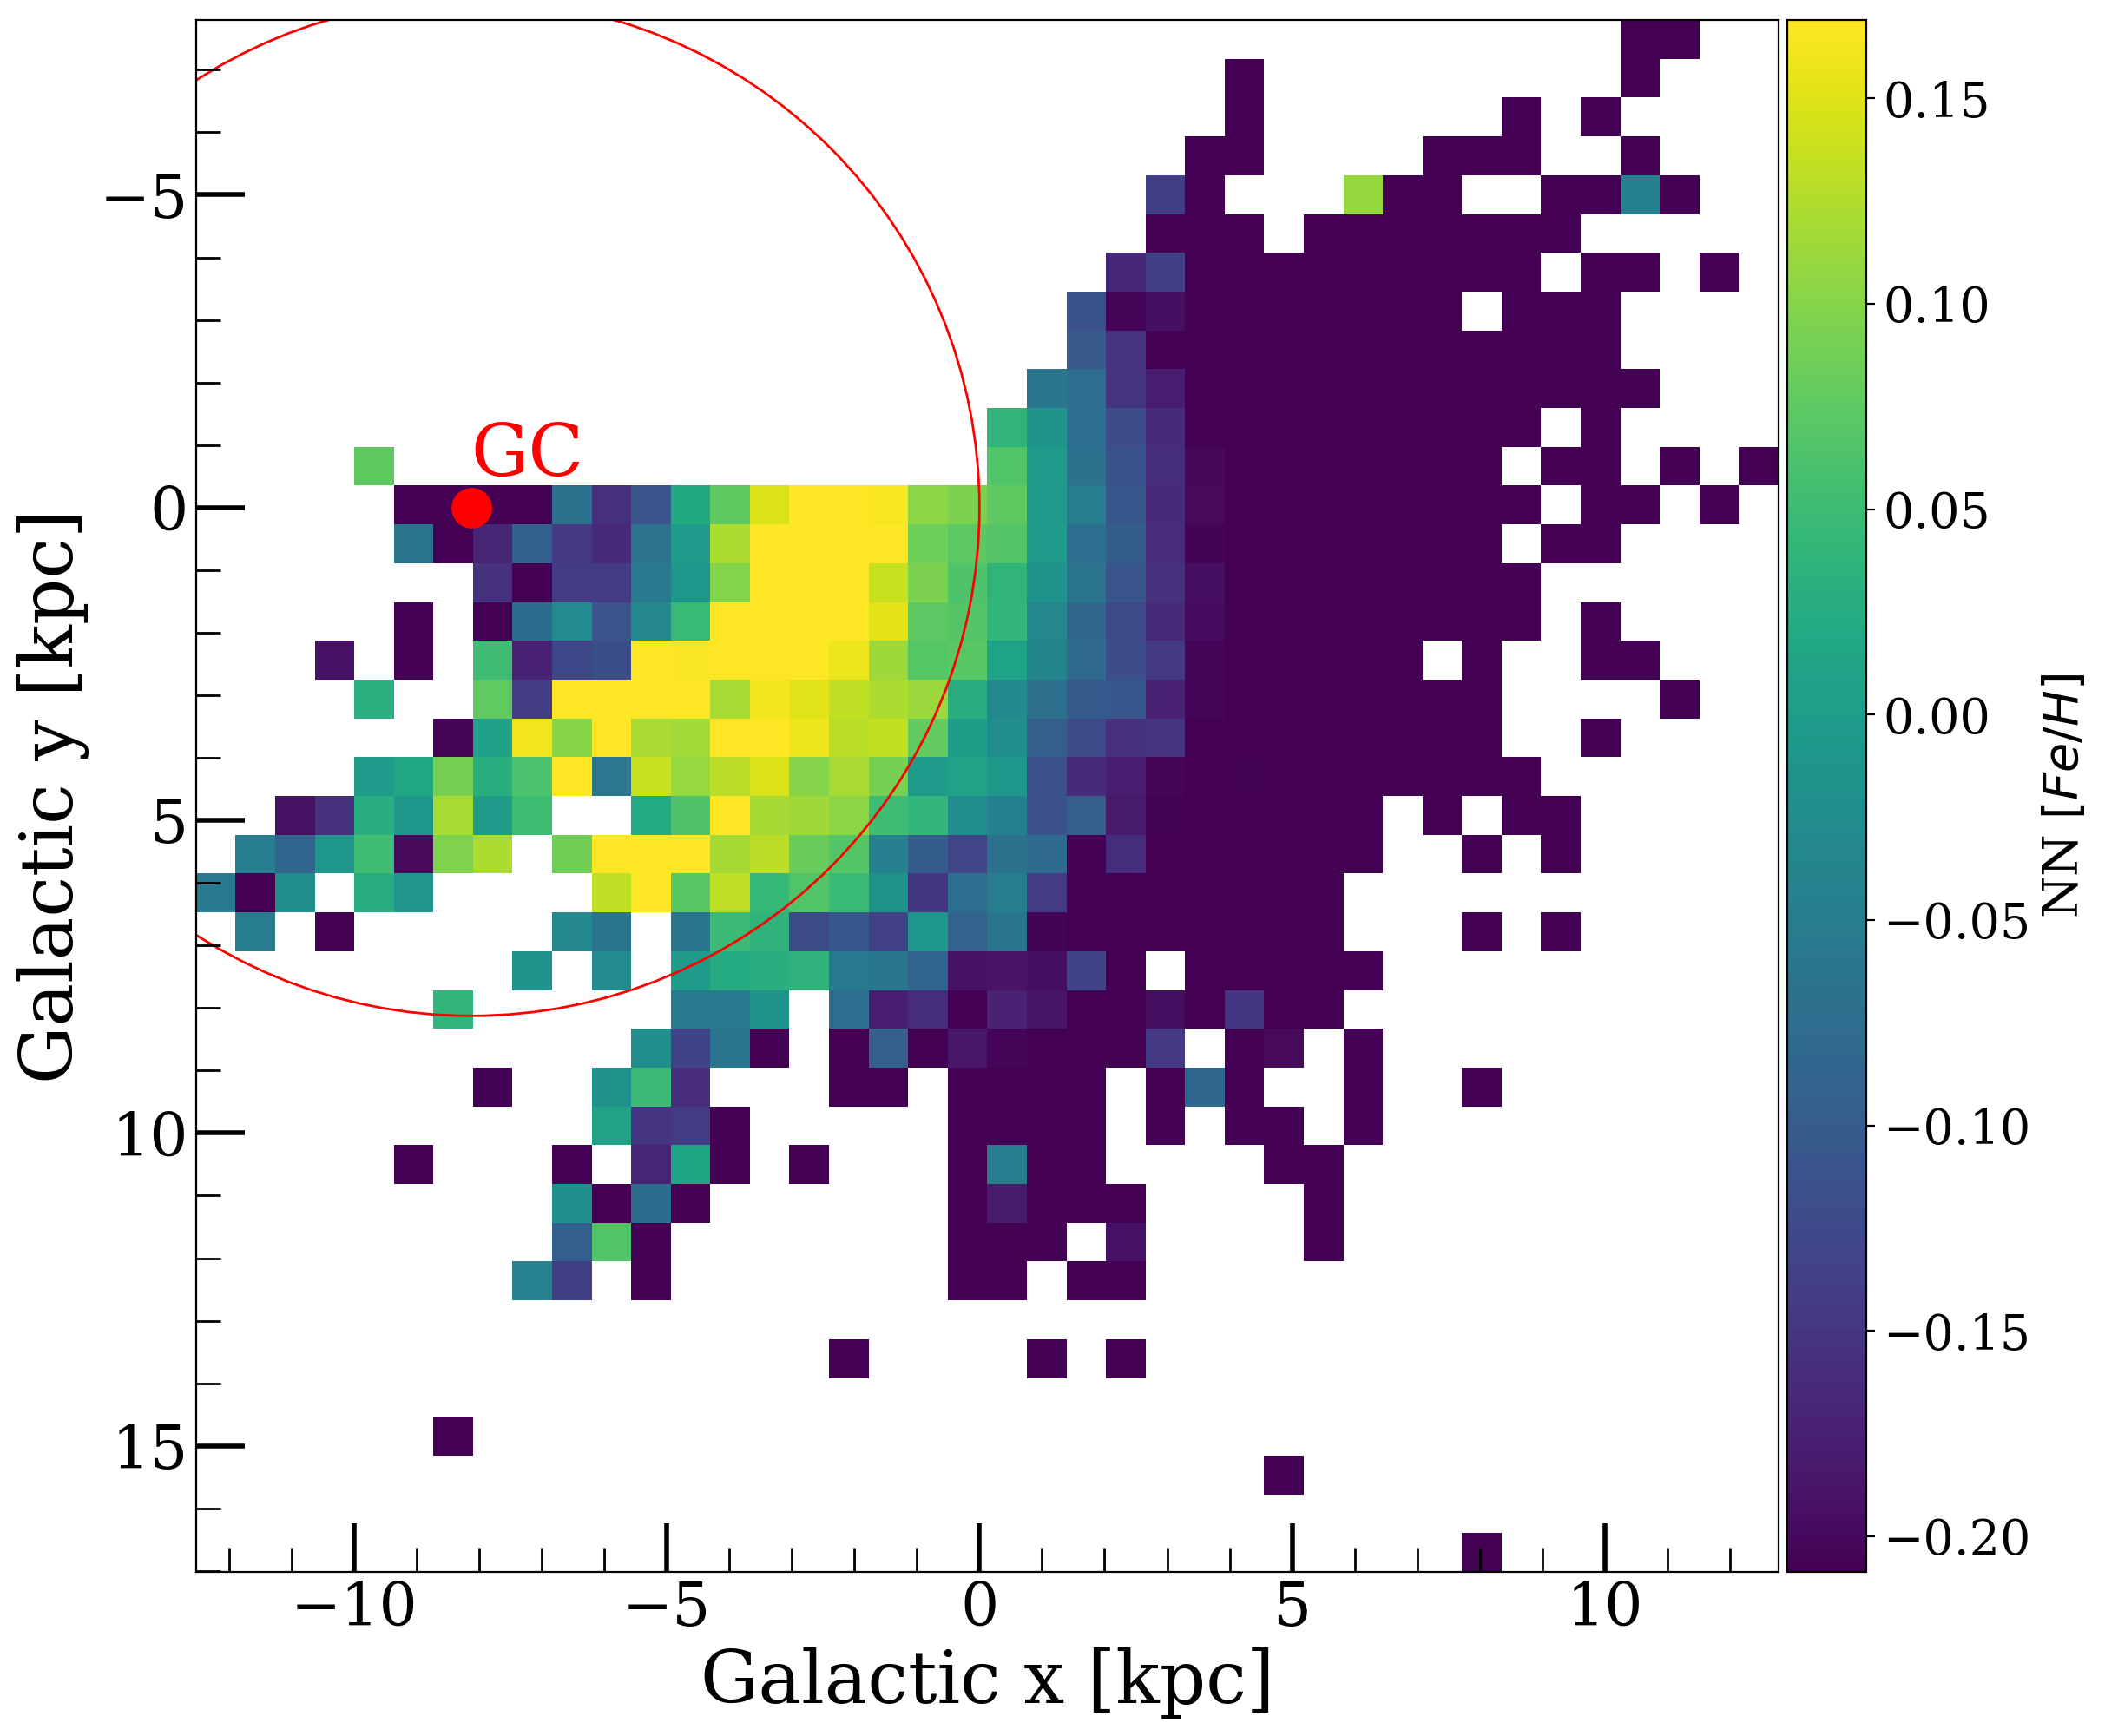

In [19]:
%matplotlib inline
from astropy.io import fits
from astropy import units as  u
import astropy.coordinates as coords
from astropy.coordinates import CartesianDifferential
import numpy as np
import pylab as plt
from scipy.stats import binned_statistic_2d

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

plt.rc('font', **{'family': 'serif', 'weight': 'medium', 'size': 20})

f = fits.getdata("apogee_dr14_nn_dist.fits")
nn_distance = f['pc']
nn_distance_error = f['pc_model_error']
ra_j2015_5 = f['RA_J2015.5']  # RA J2015.5
dec_j2015_5 = f['DEC_J2015.5']  # DEC J2015.5

f = fits.getdata("astroNN_apogee_dr14_catalog.fits")
FeH = f["astroNN"][:, 19]
FeH_uncertainty = f["astroNN_error"][:, 19]

non_n9999_idx = ((nn_distance !=-9999.) & 
                 (ra_j2015_5 !=-9999.) &
                 (dec_j2015_5 !=-9999.))

c = coords.SkyCoord(ra=ra_j2015_5[non_n9999_idx]*u.degree,
                    dec=dec_j2015_5[non_n9999_idx]*u.degree,
                    distance=nn_distance[non_n9999_idx]*u.pc,
                    galcen_distance=8.125*u.kpc, # https://arxiv.org/abs/1807.09409 (GRAVITY Collaboration 2018)
                    z_sun=20.8*u.pc, # https://arxiv.org/abs/1809.03507 (Bennett & Bovy 2018)
                    galcen_v_sun=CartesianDifferential([11.1, 245.7, 7.25]*u.km/u.s))

good_idx = ((nn_distance[non_n9999_idx] / nn_distance_error[non_n9999_idx] > 5) & 
            (FeH[non_n9999_idx] != -9999.) & 
            (FeH_uncertainty[non_n9999_idx] < 0.05) & 
            (np.abs(c.galactic.cartesian.z.value) < 300))

c2 = c[good_idx]

hist, xedges, yedges, binid = binned_statistic_2d(-c2.galactic.cartesian.x/1000, c2.galactic.cartesian.y/1000, FeH[non_n9999_idx][good_idx], np.median, bins=40)

vmin, vmax = np.percentile(FeH[non_n9999_idx][good_idx], 20), np.percentile(FeH[non_n9999_idx][good_idx], 80)
fig, ax = plt.subplots(figsize=(13, 10.4), dpi=200)
img = ax.imshow(np.rot90(hist),
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                vmin=vmin, vmax=vmax)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, mappable=img)
cbar.set_label(r"NN $[Fe/H]$", fontsize=20)
ax.set_xlabel('Galactic x [kpc]', fontsize=30)
ax.set_ylabel('Galactic y [kpc]', fontsize=30)
ax.scatter(-8.125, 0, s=250, c="red")
ax.annotate("GC", (-8.125, -0.5), color='r', fontsize=30)
circle2 = plt.Circle((-8.125, 0), 8.125, color='r', fill=False)
# circle3 = matplotlib.patches.Ellipse((0, 0), 10, 5, 25, fc='none', ls='solid', ec='g', lw='3.')
ax.add_artist(circle2)
ax.invert_yaxis()
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2, length=20, which='major')
ax.tick_params(width=1, length=10, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
fig.tight_layout()

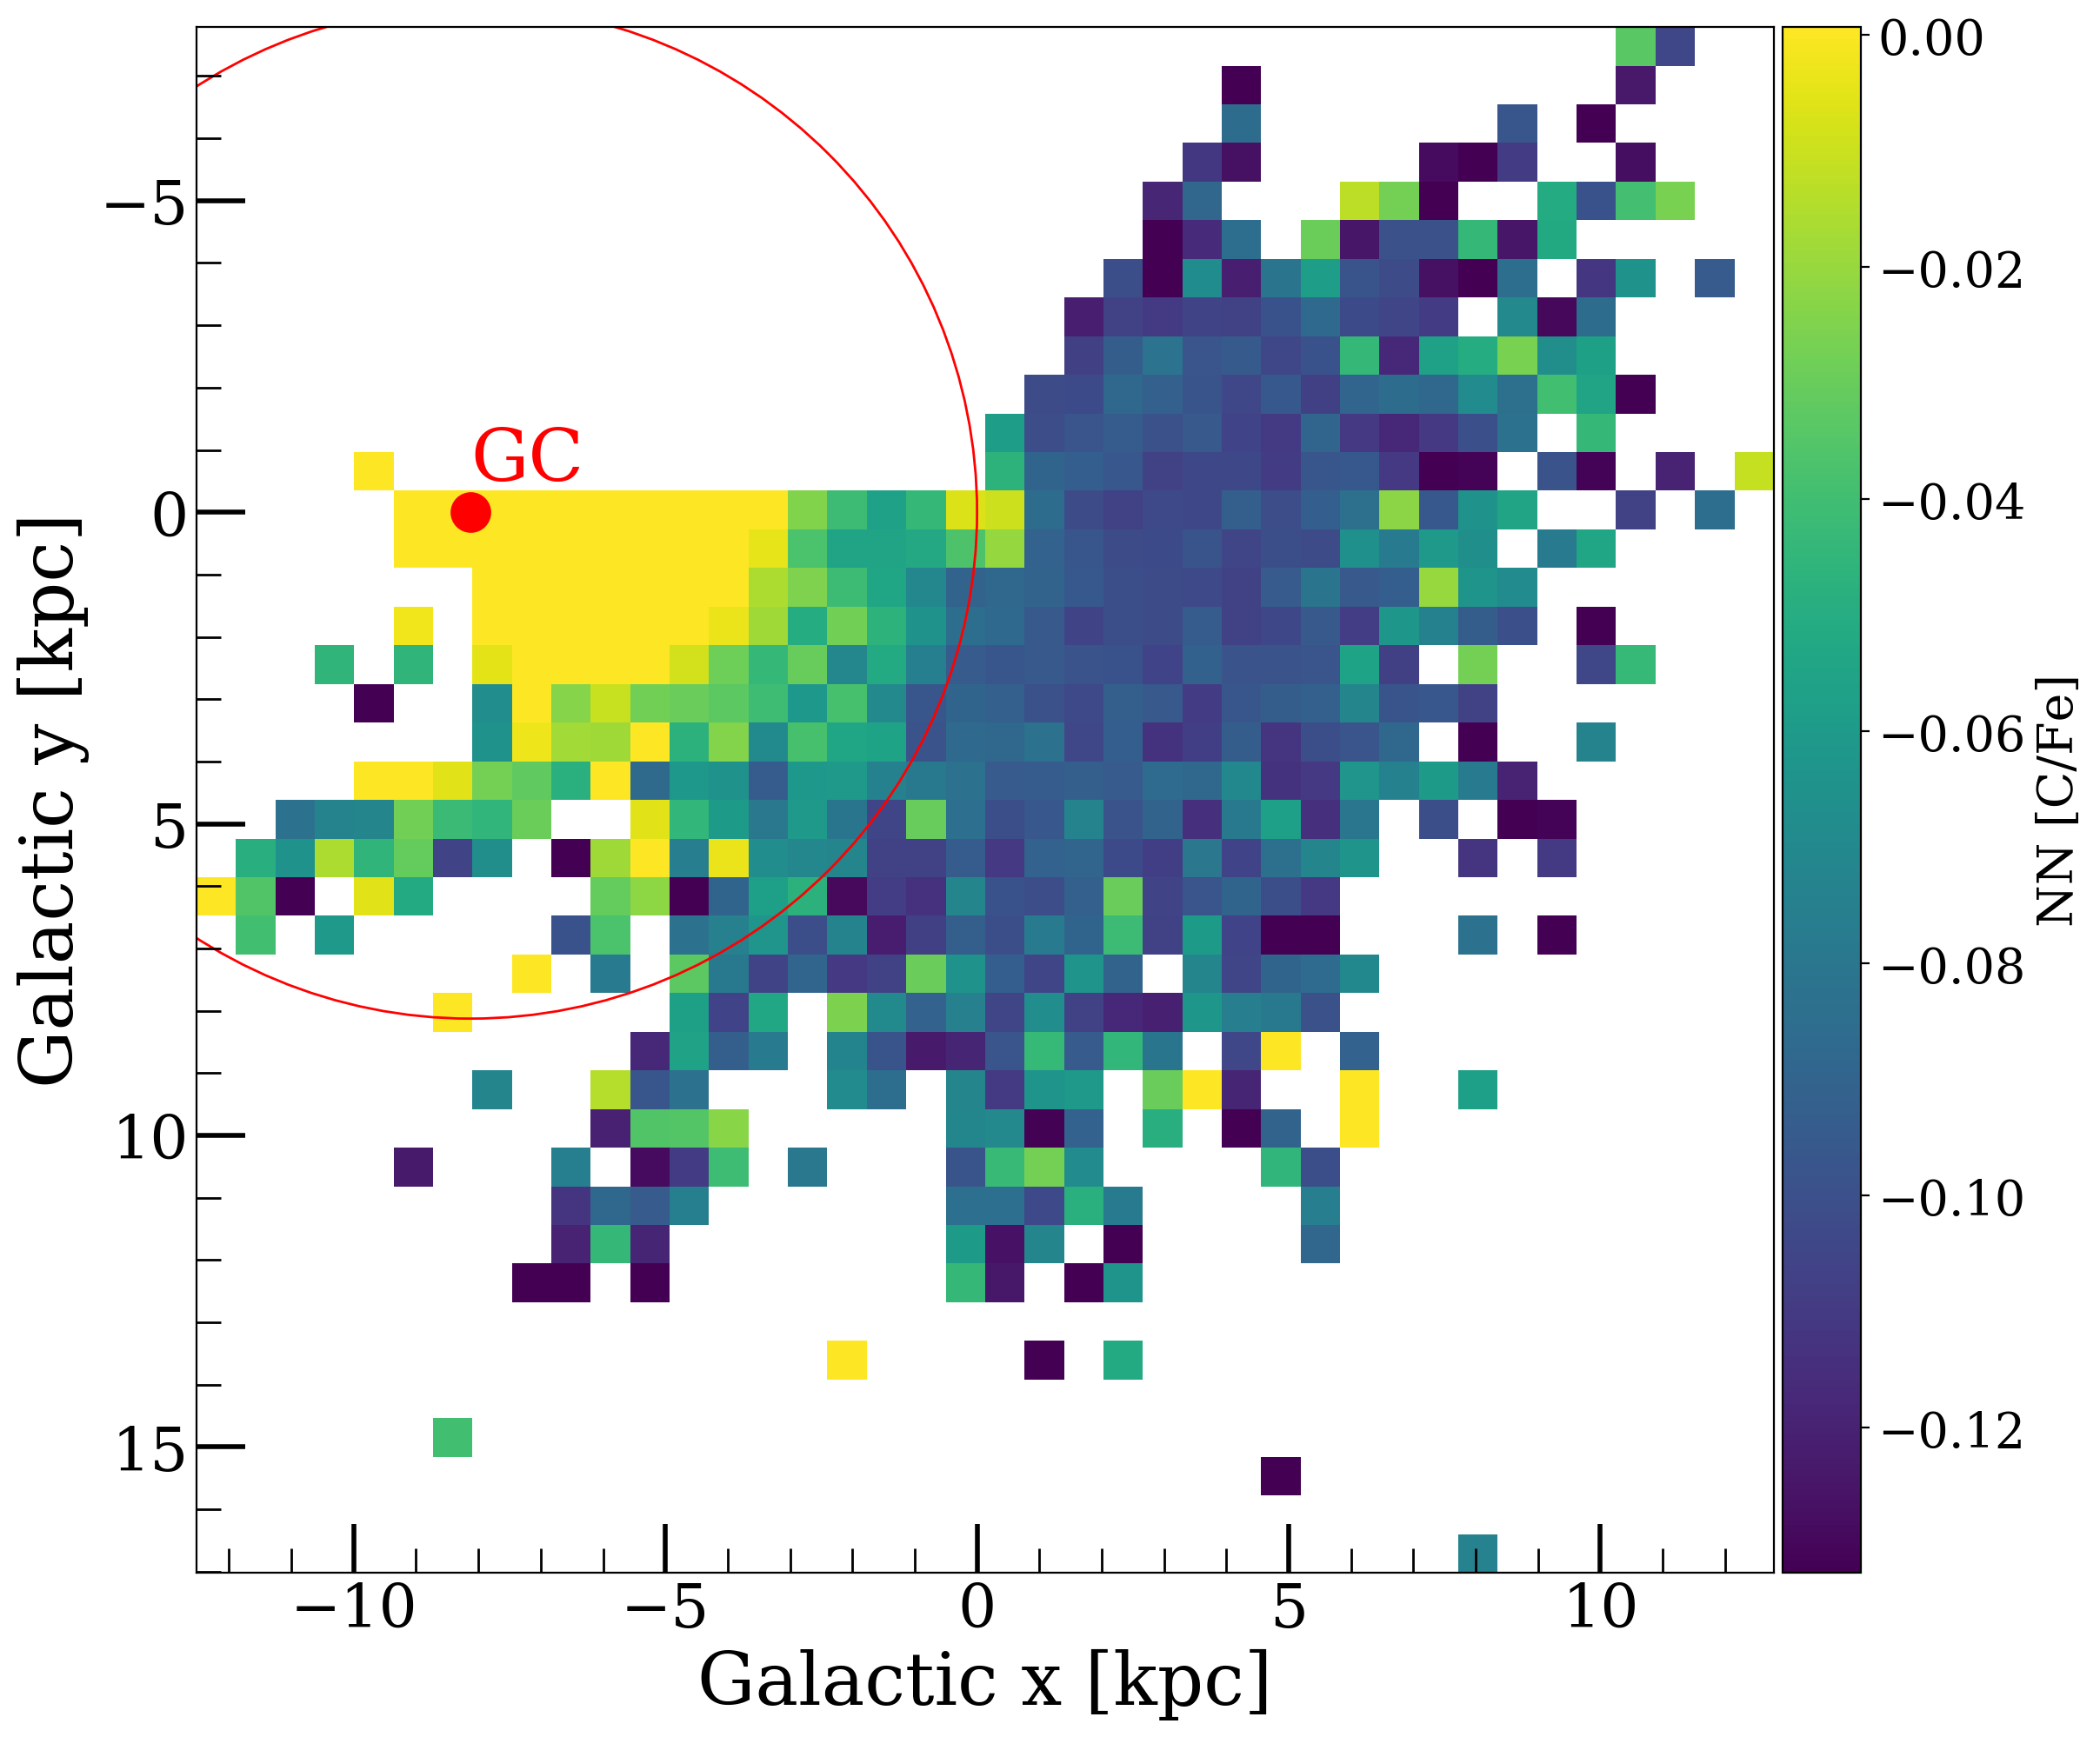

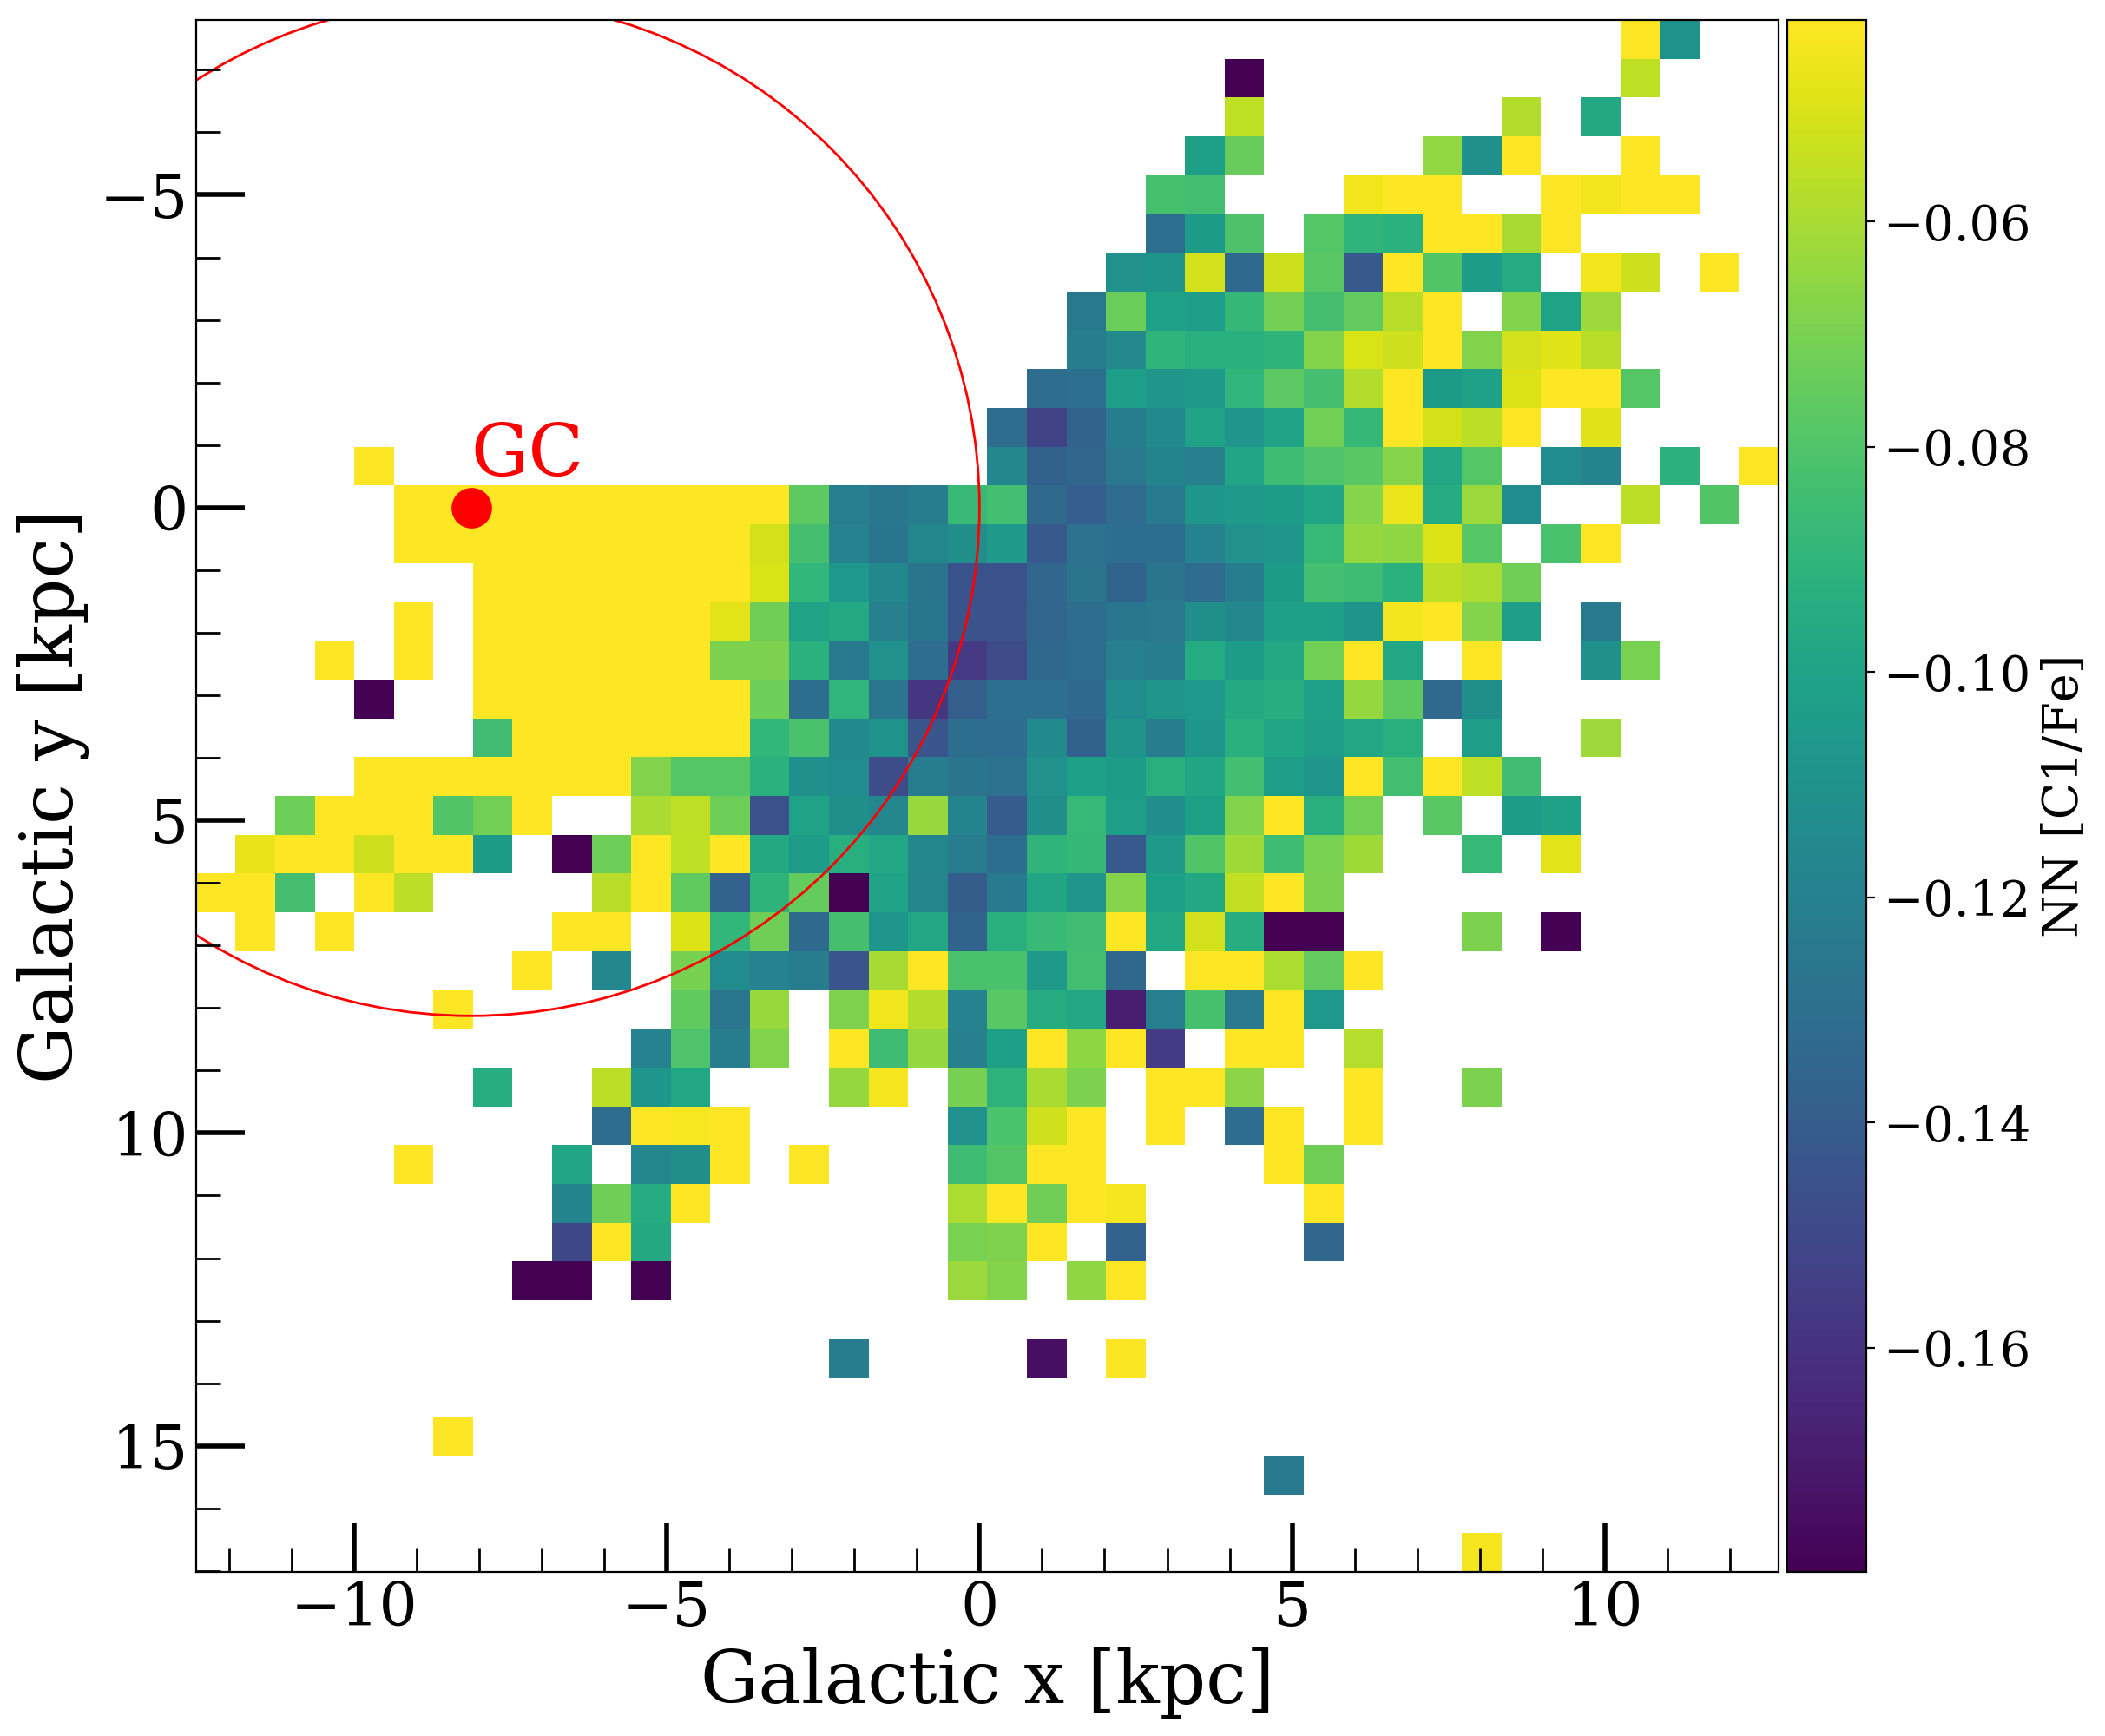

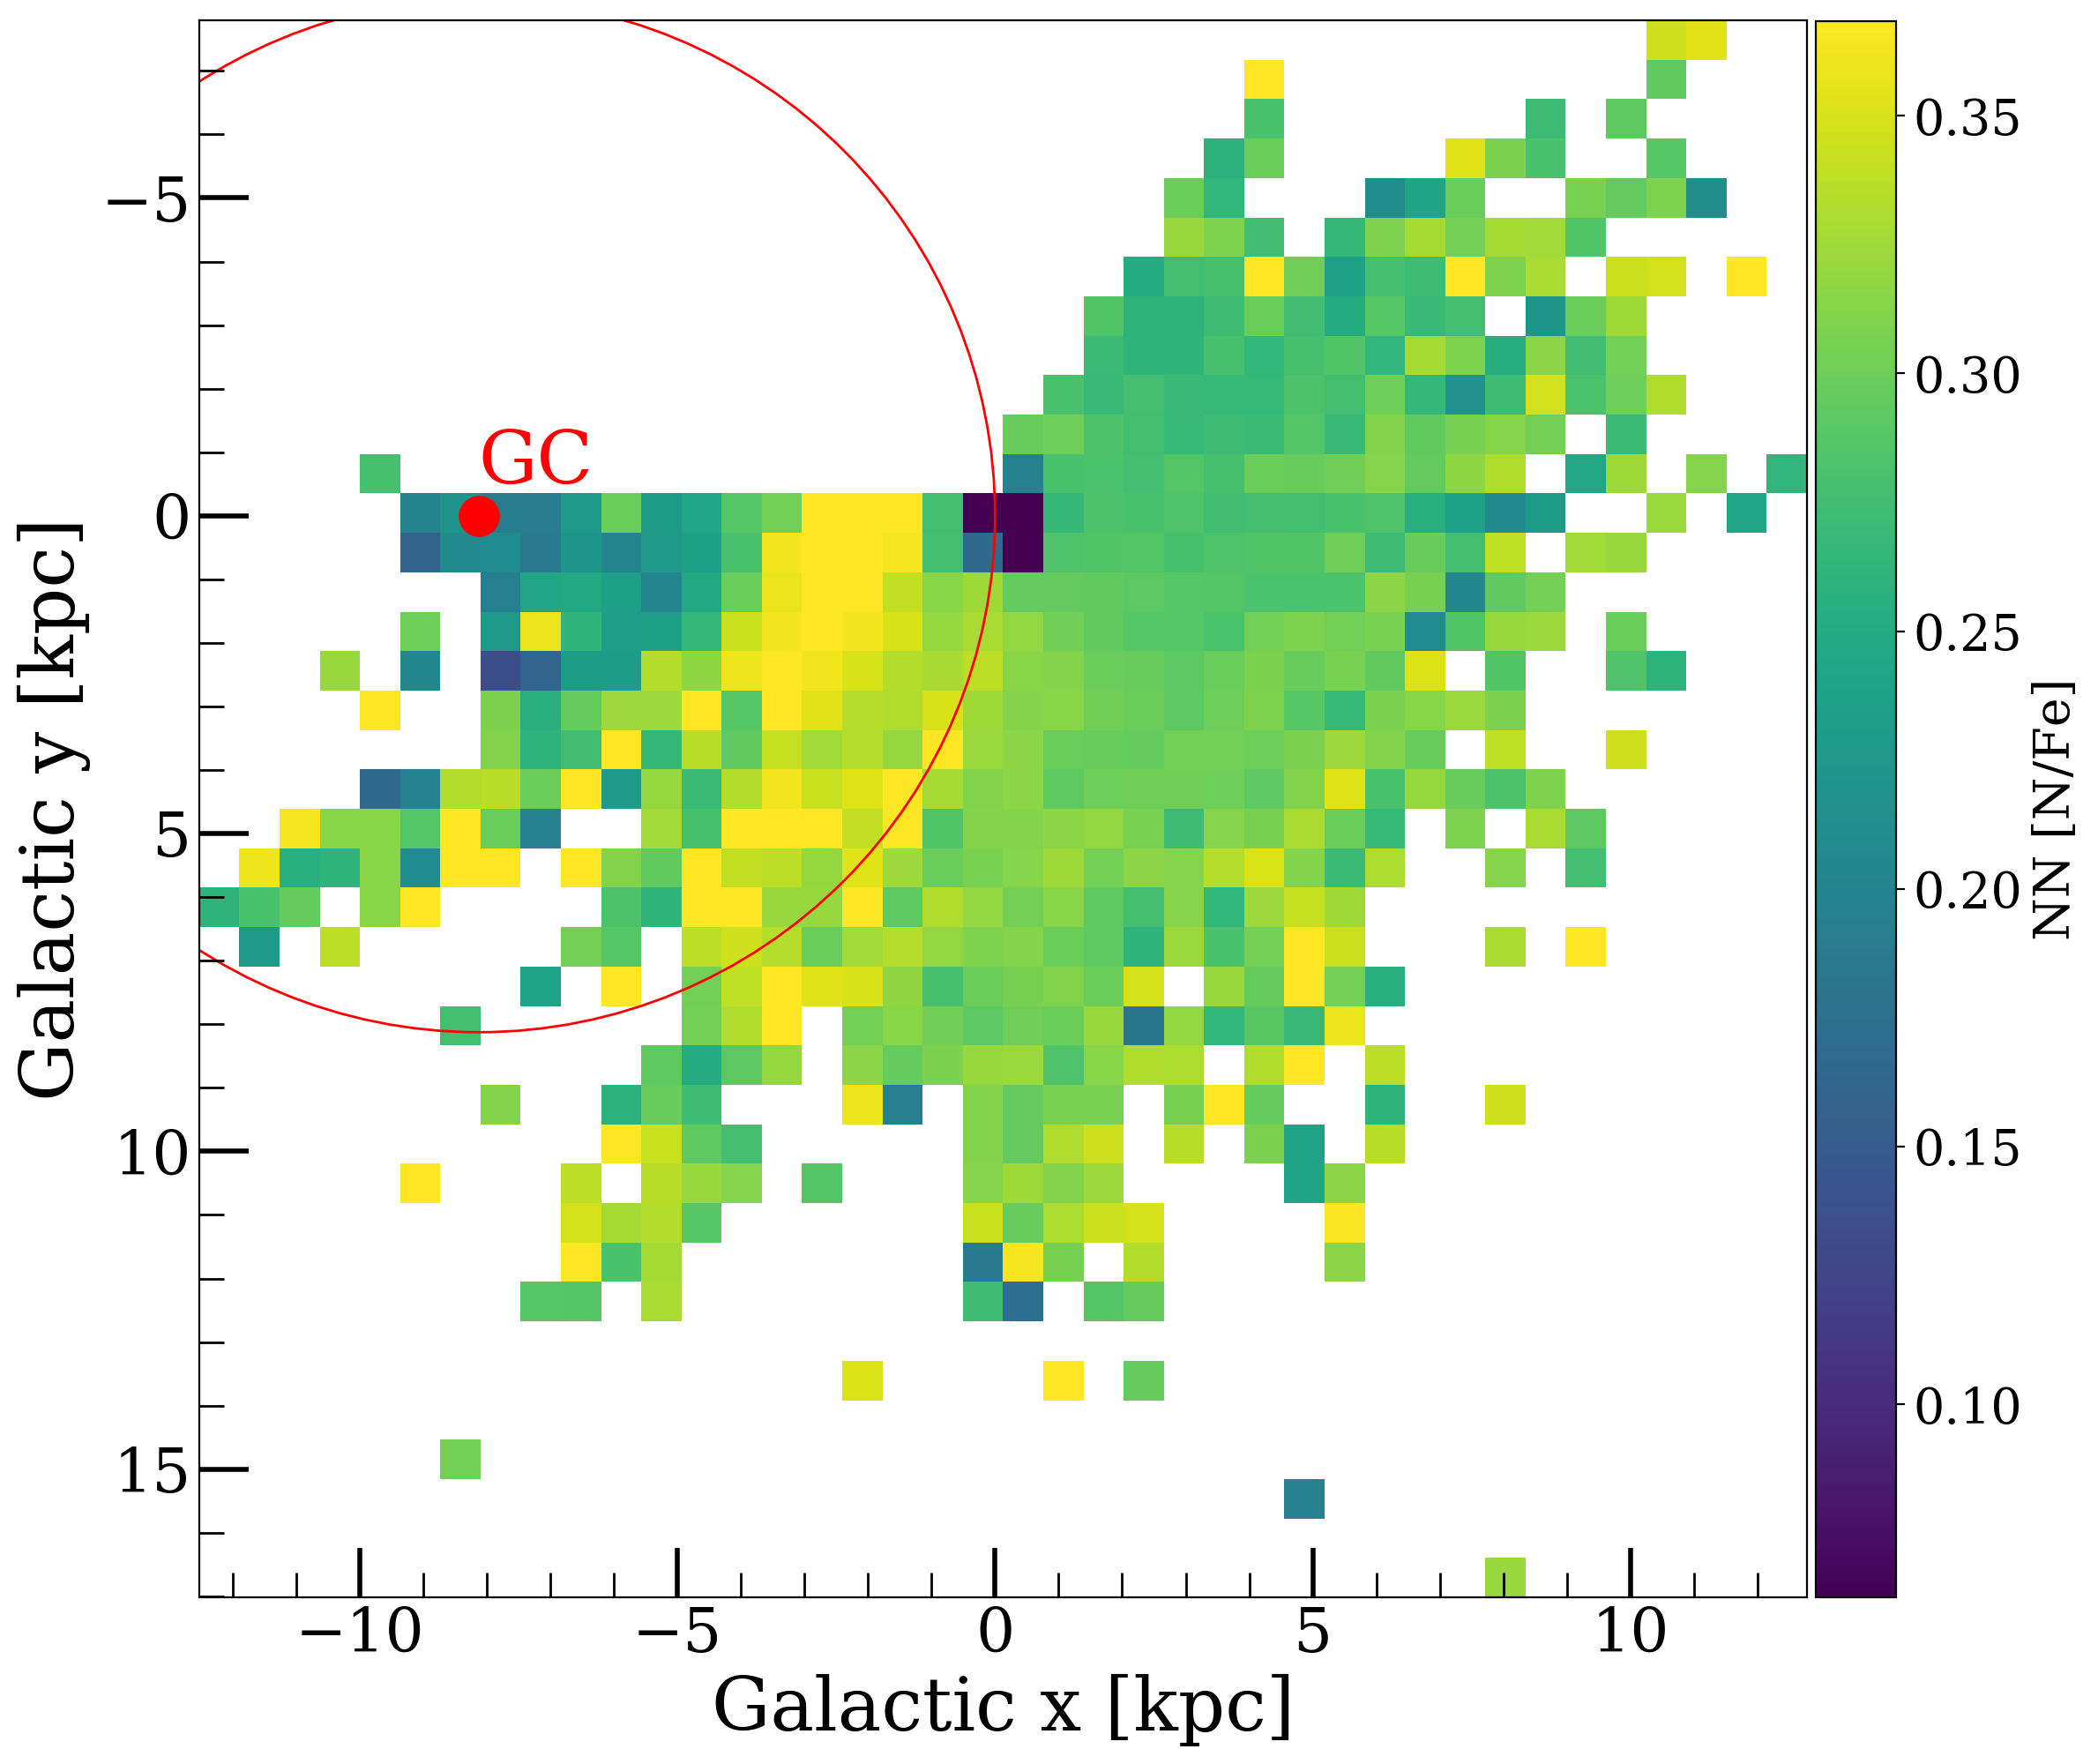

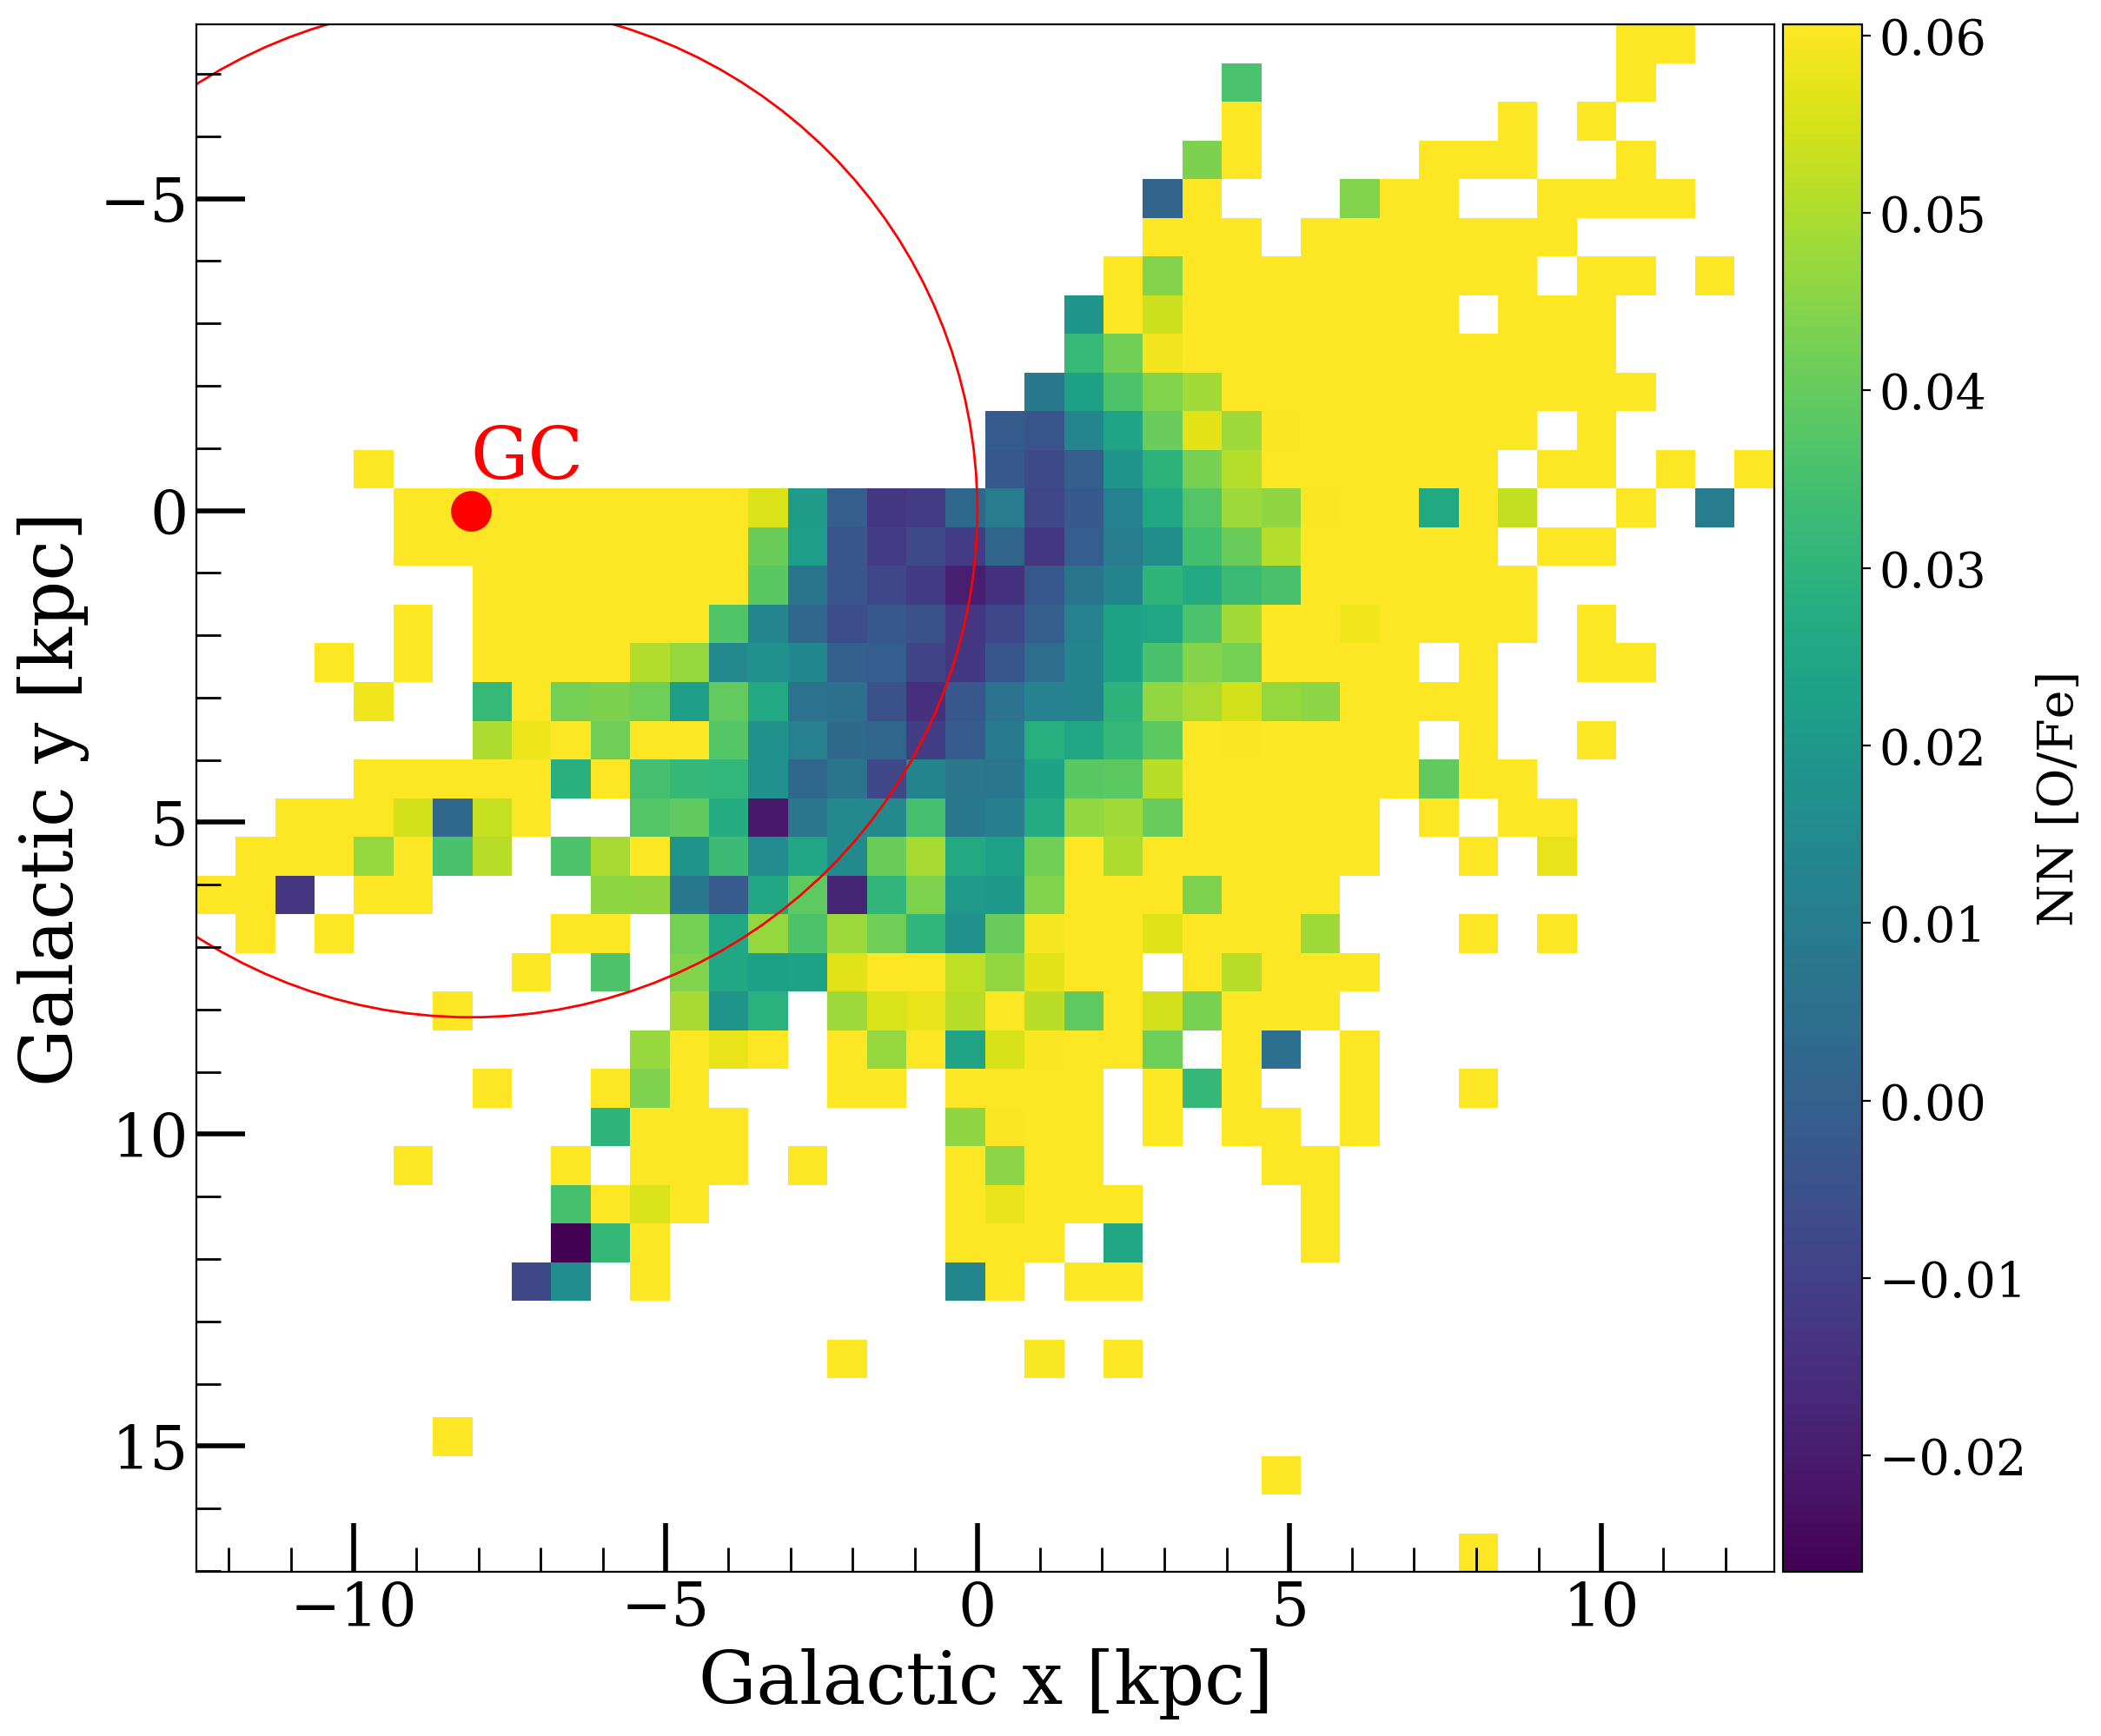

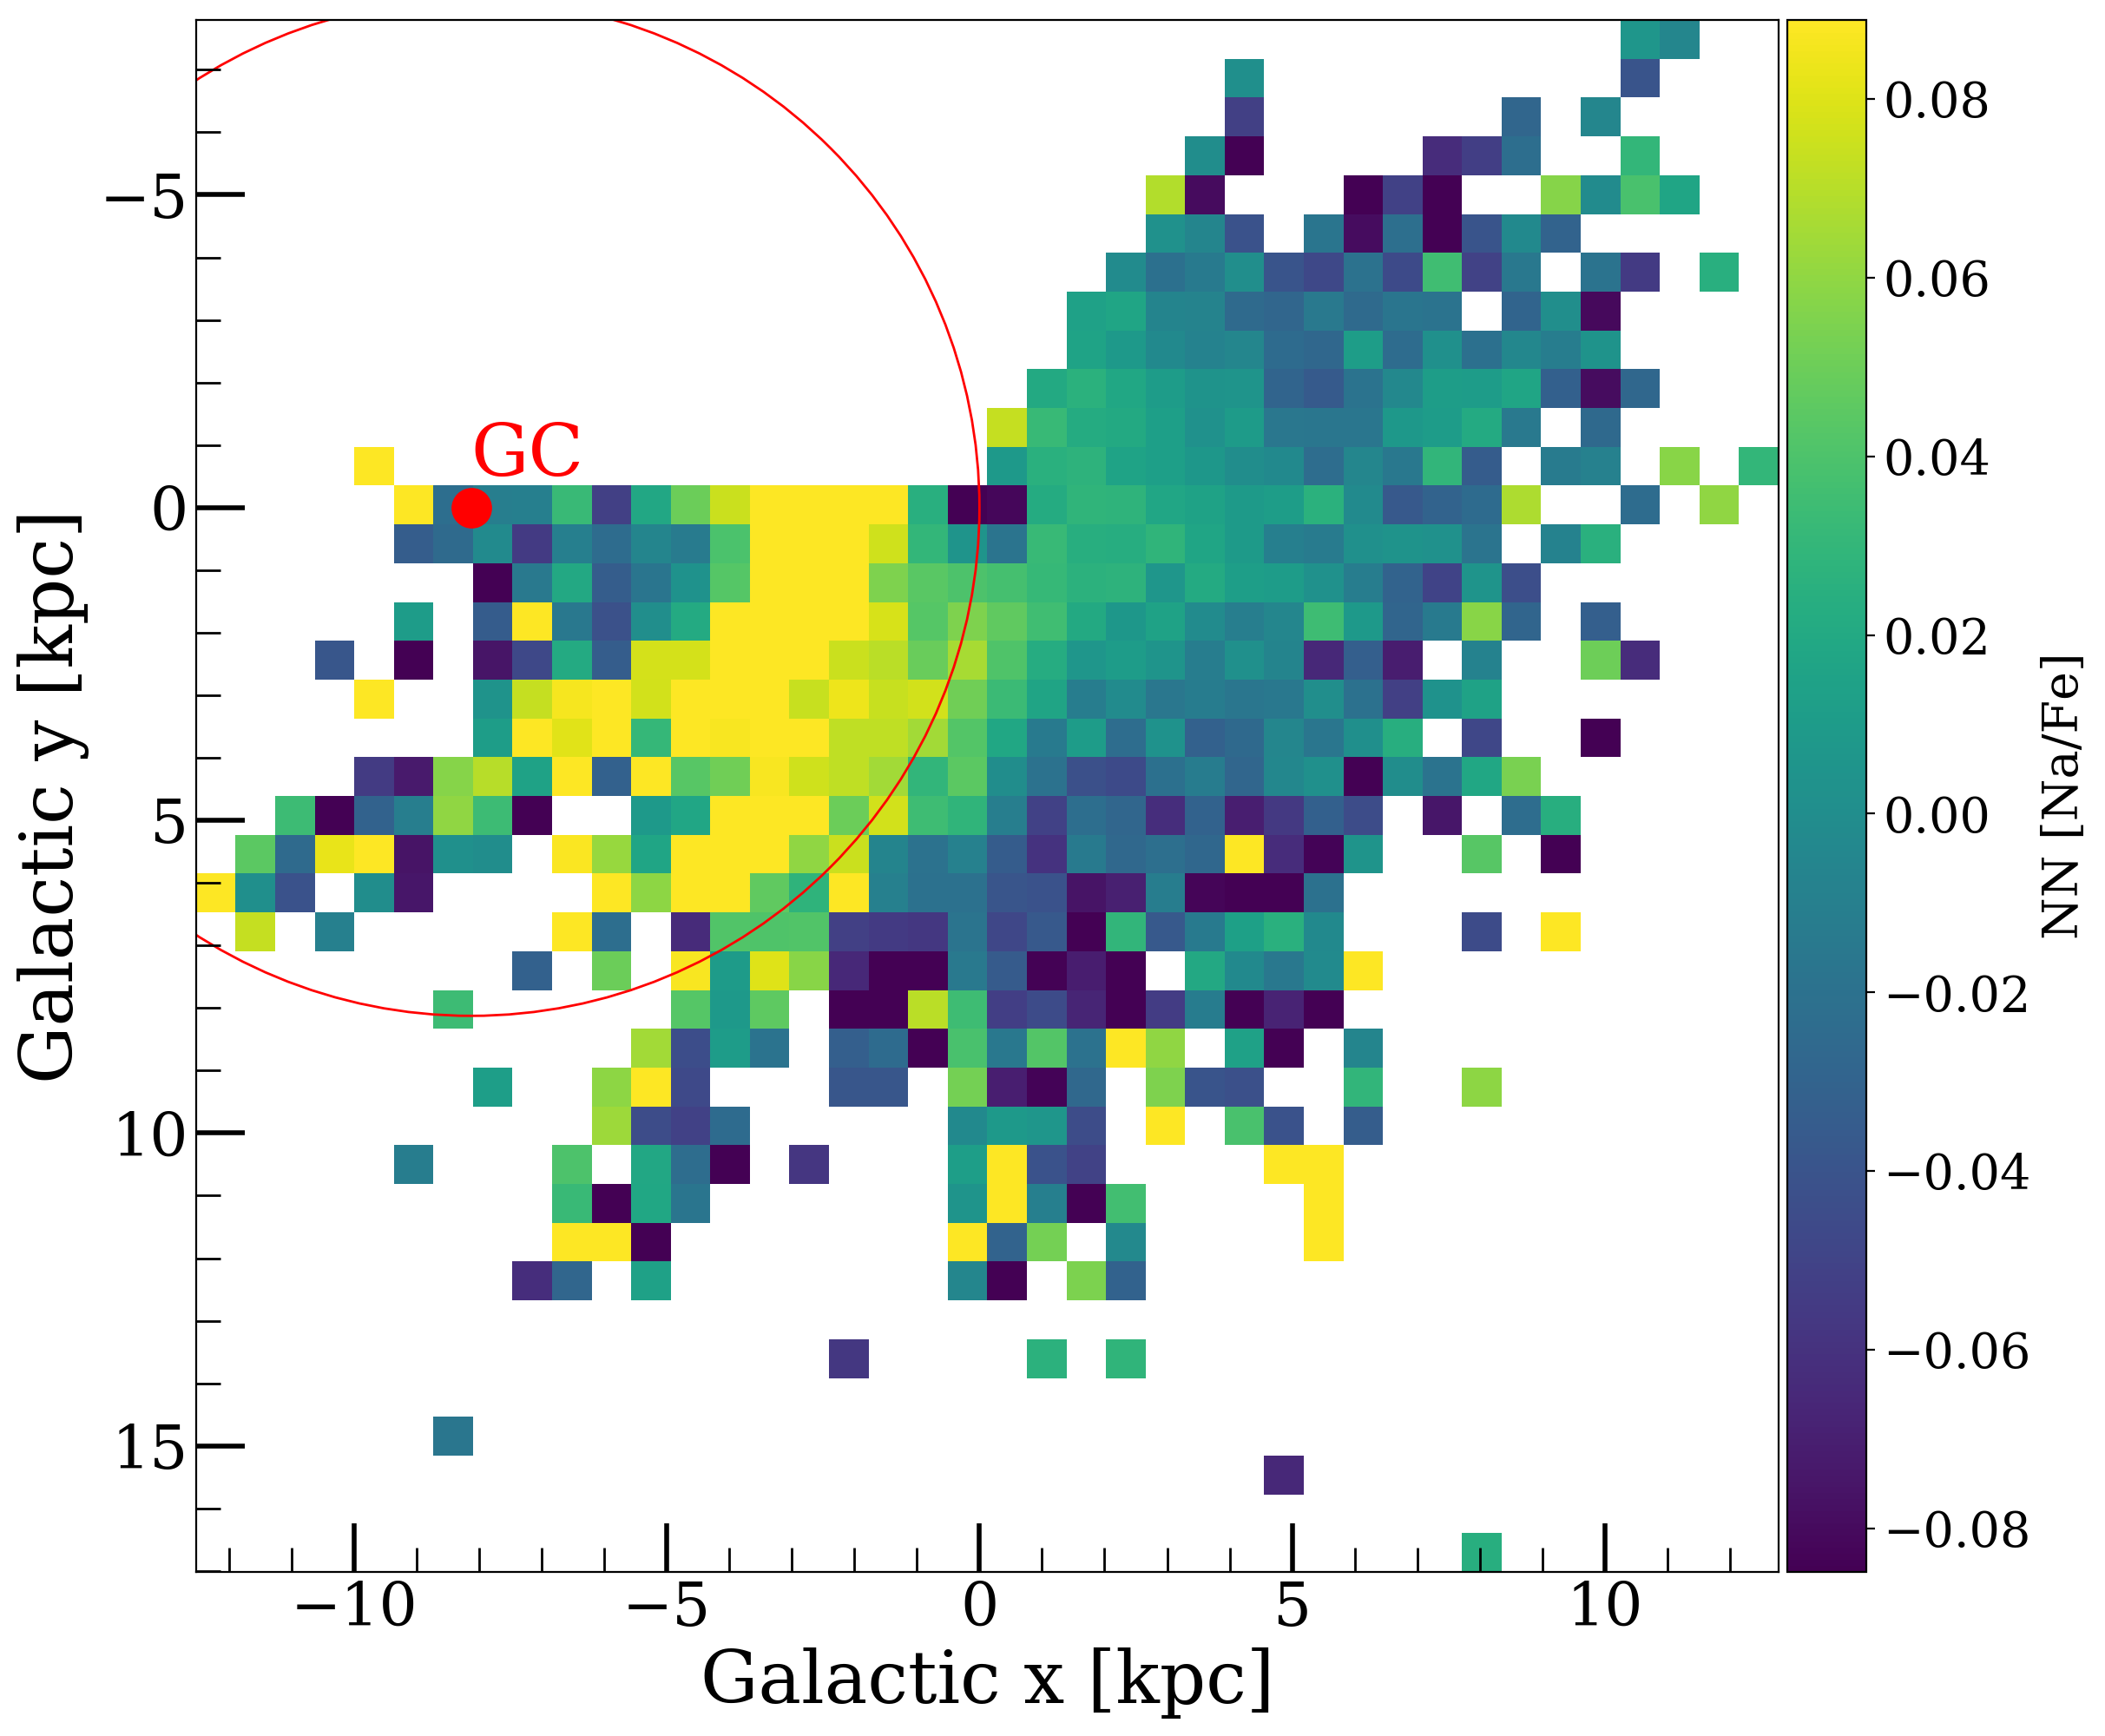

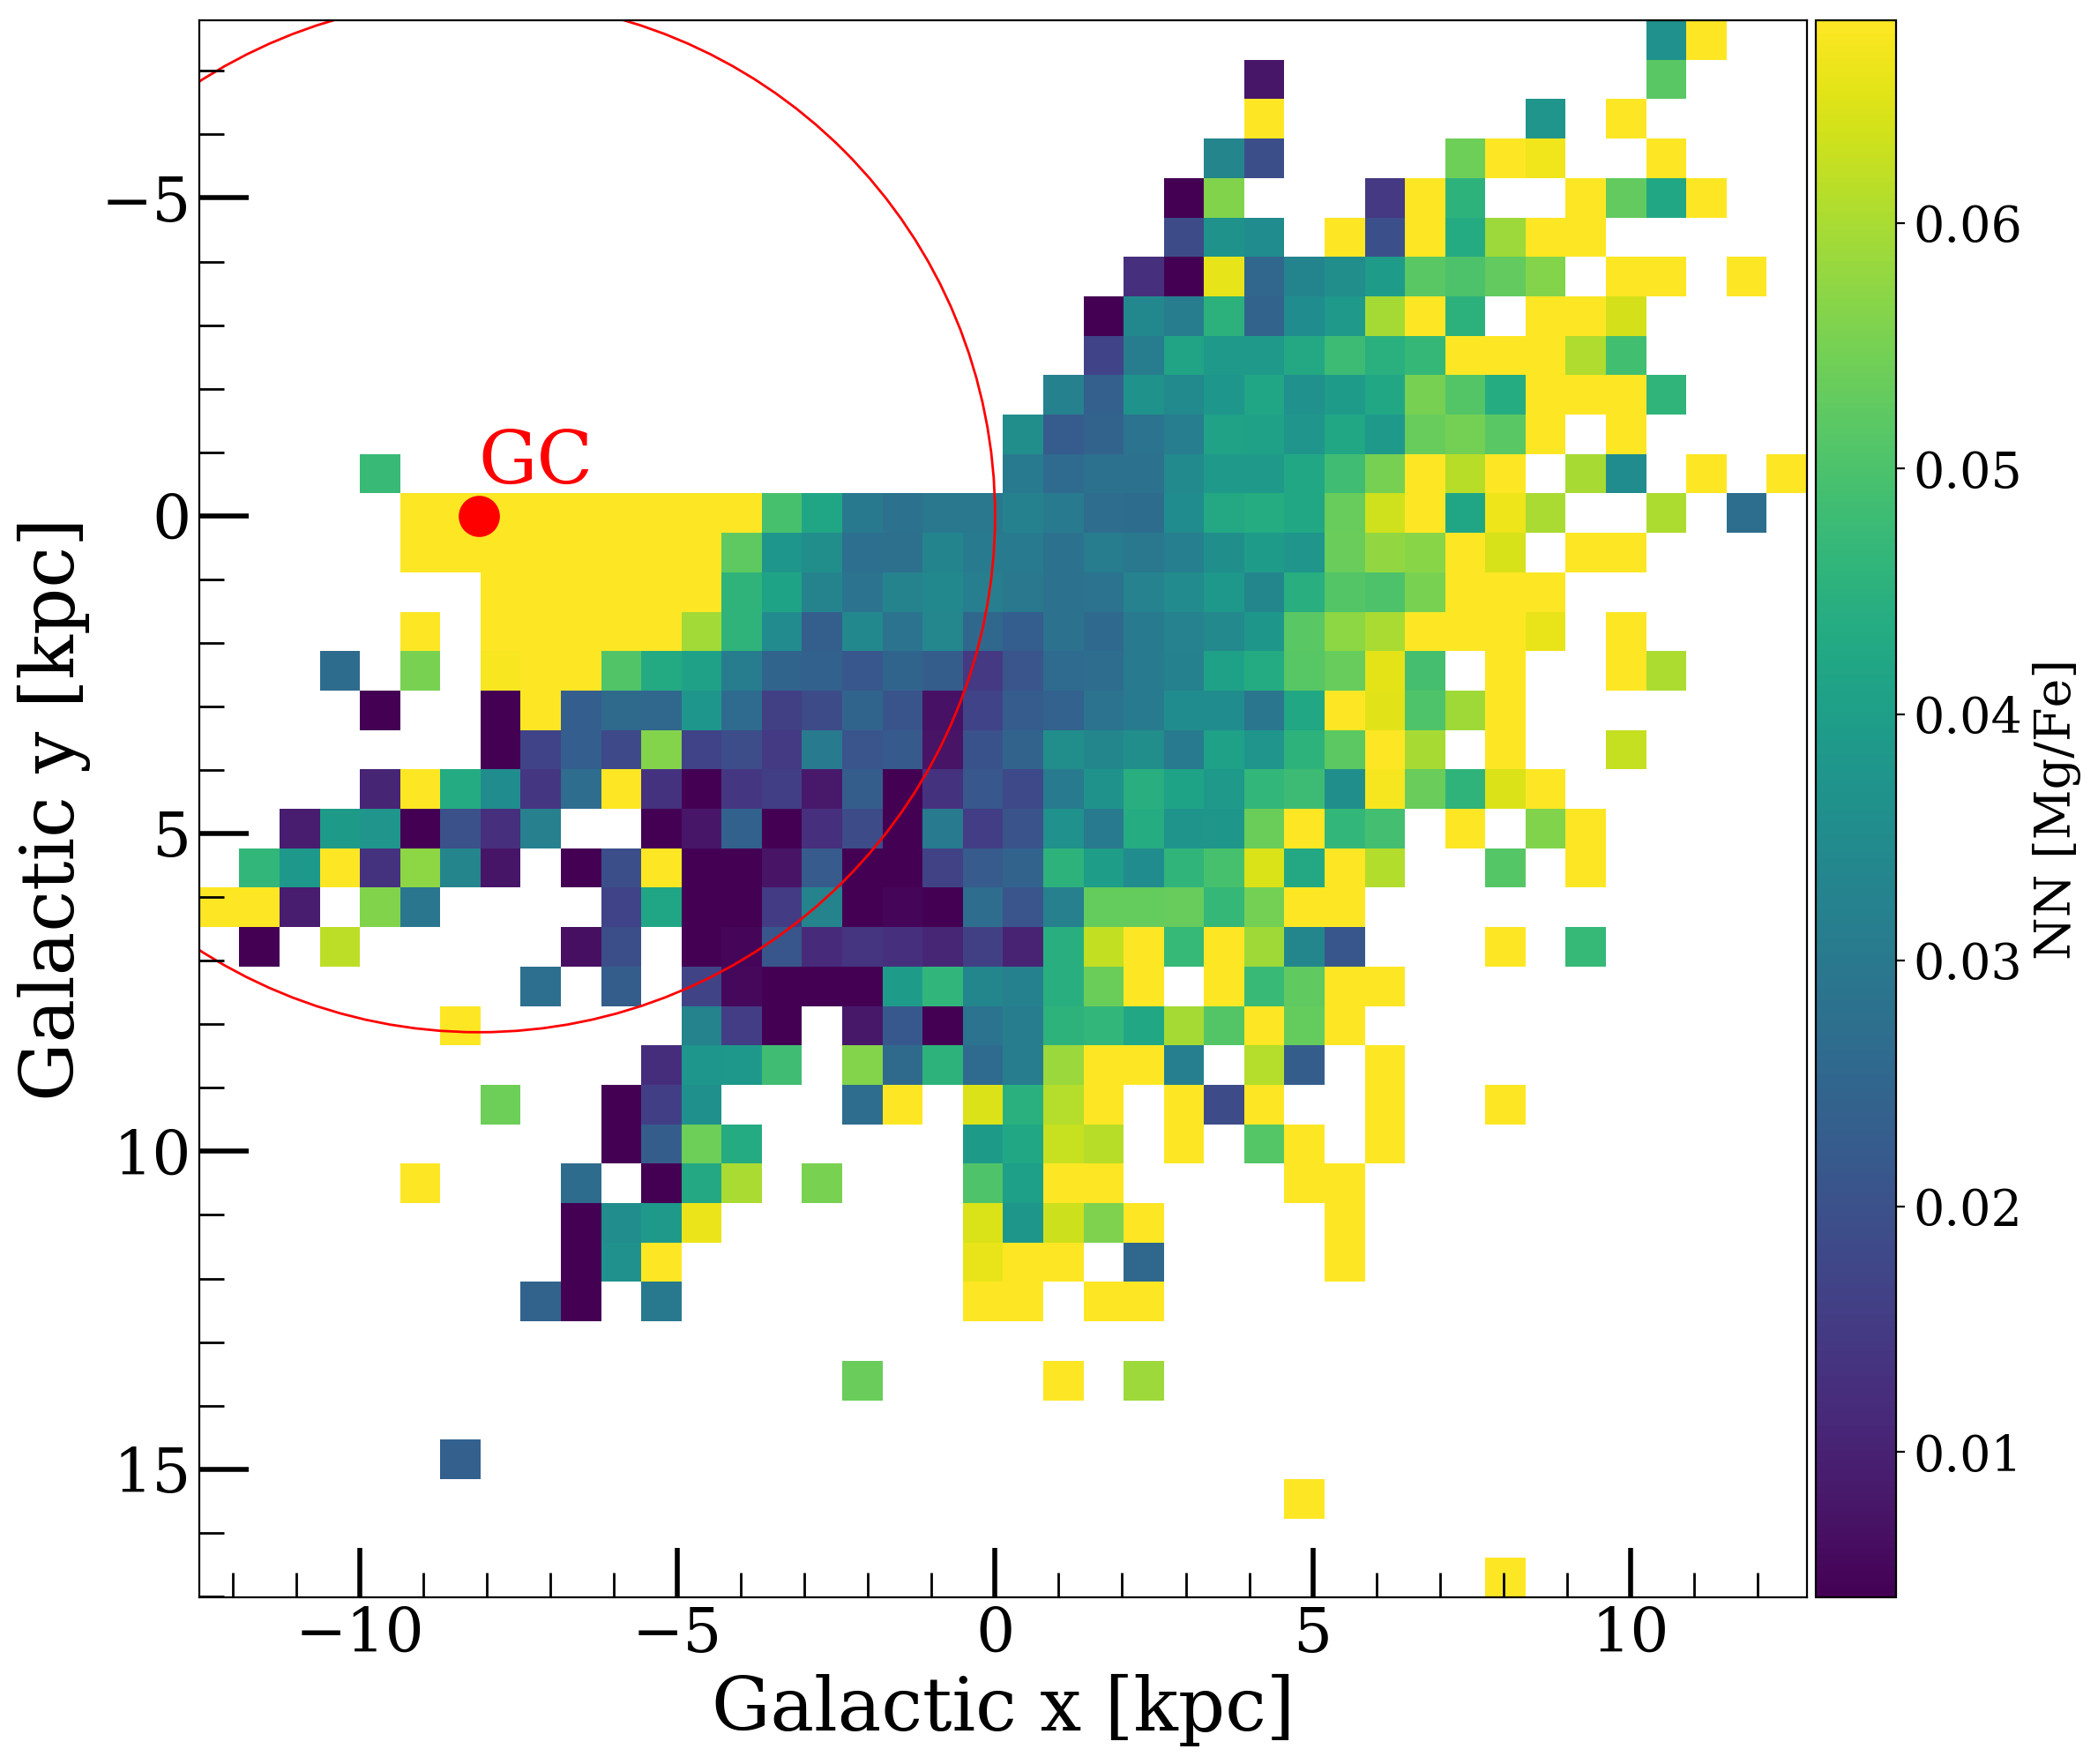

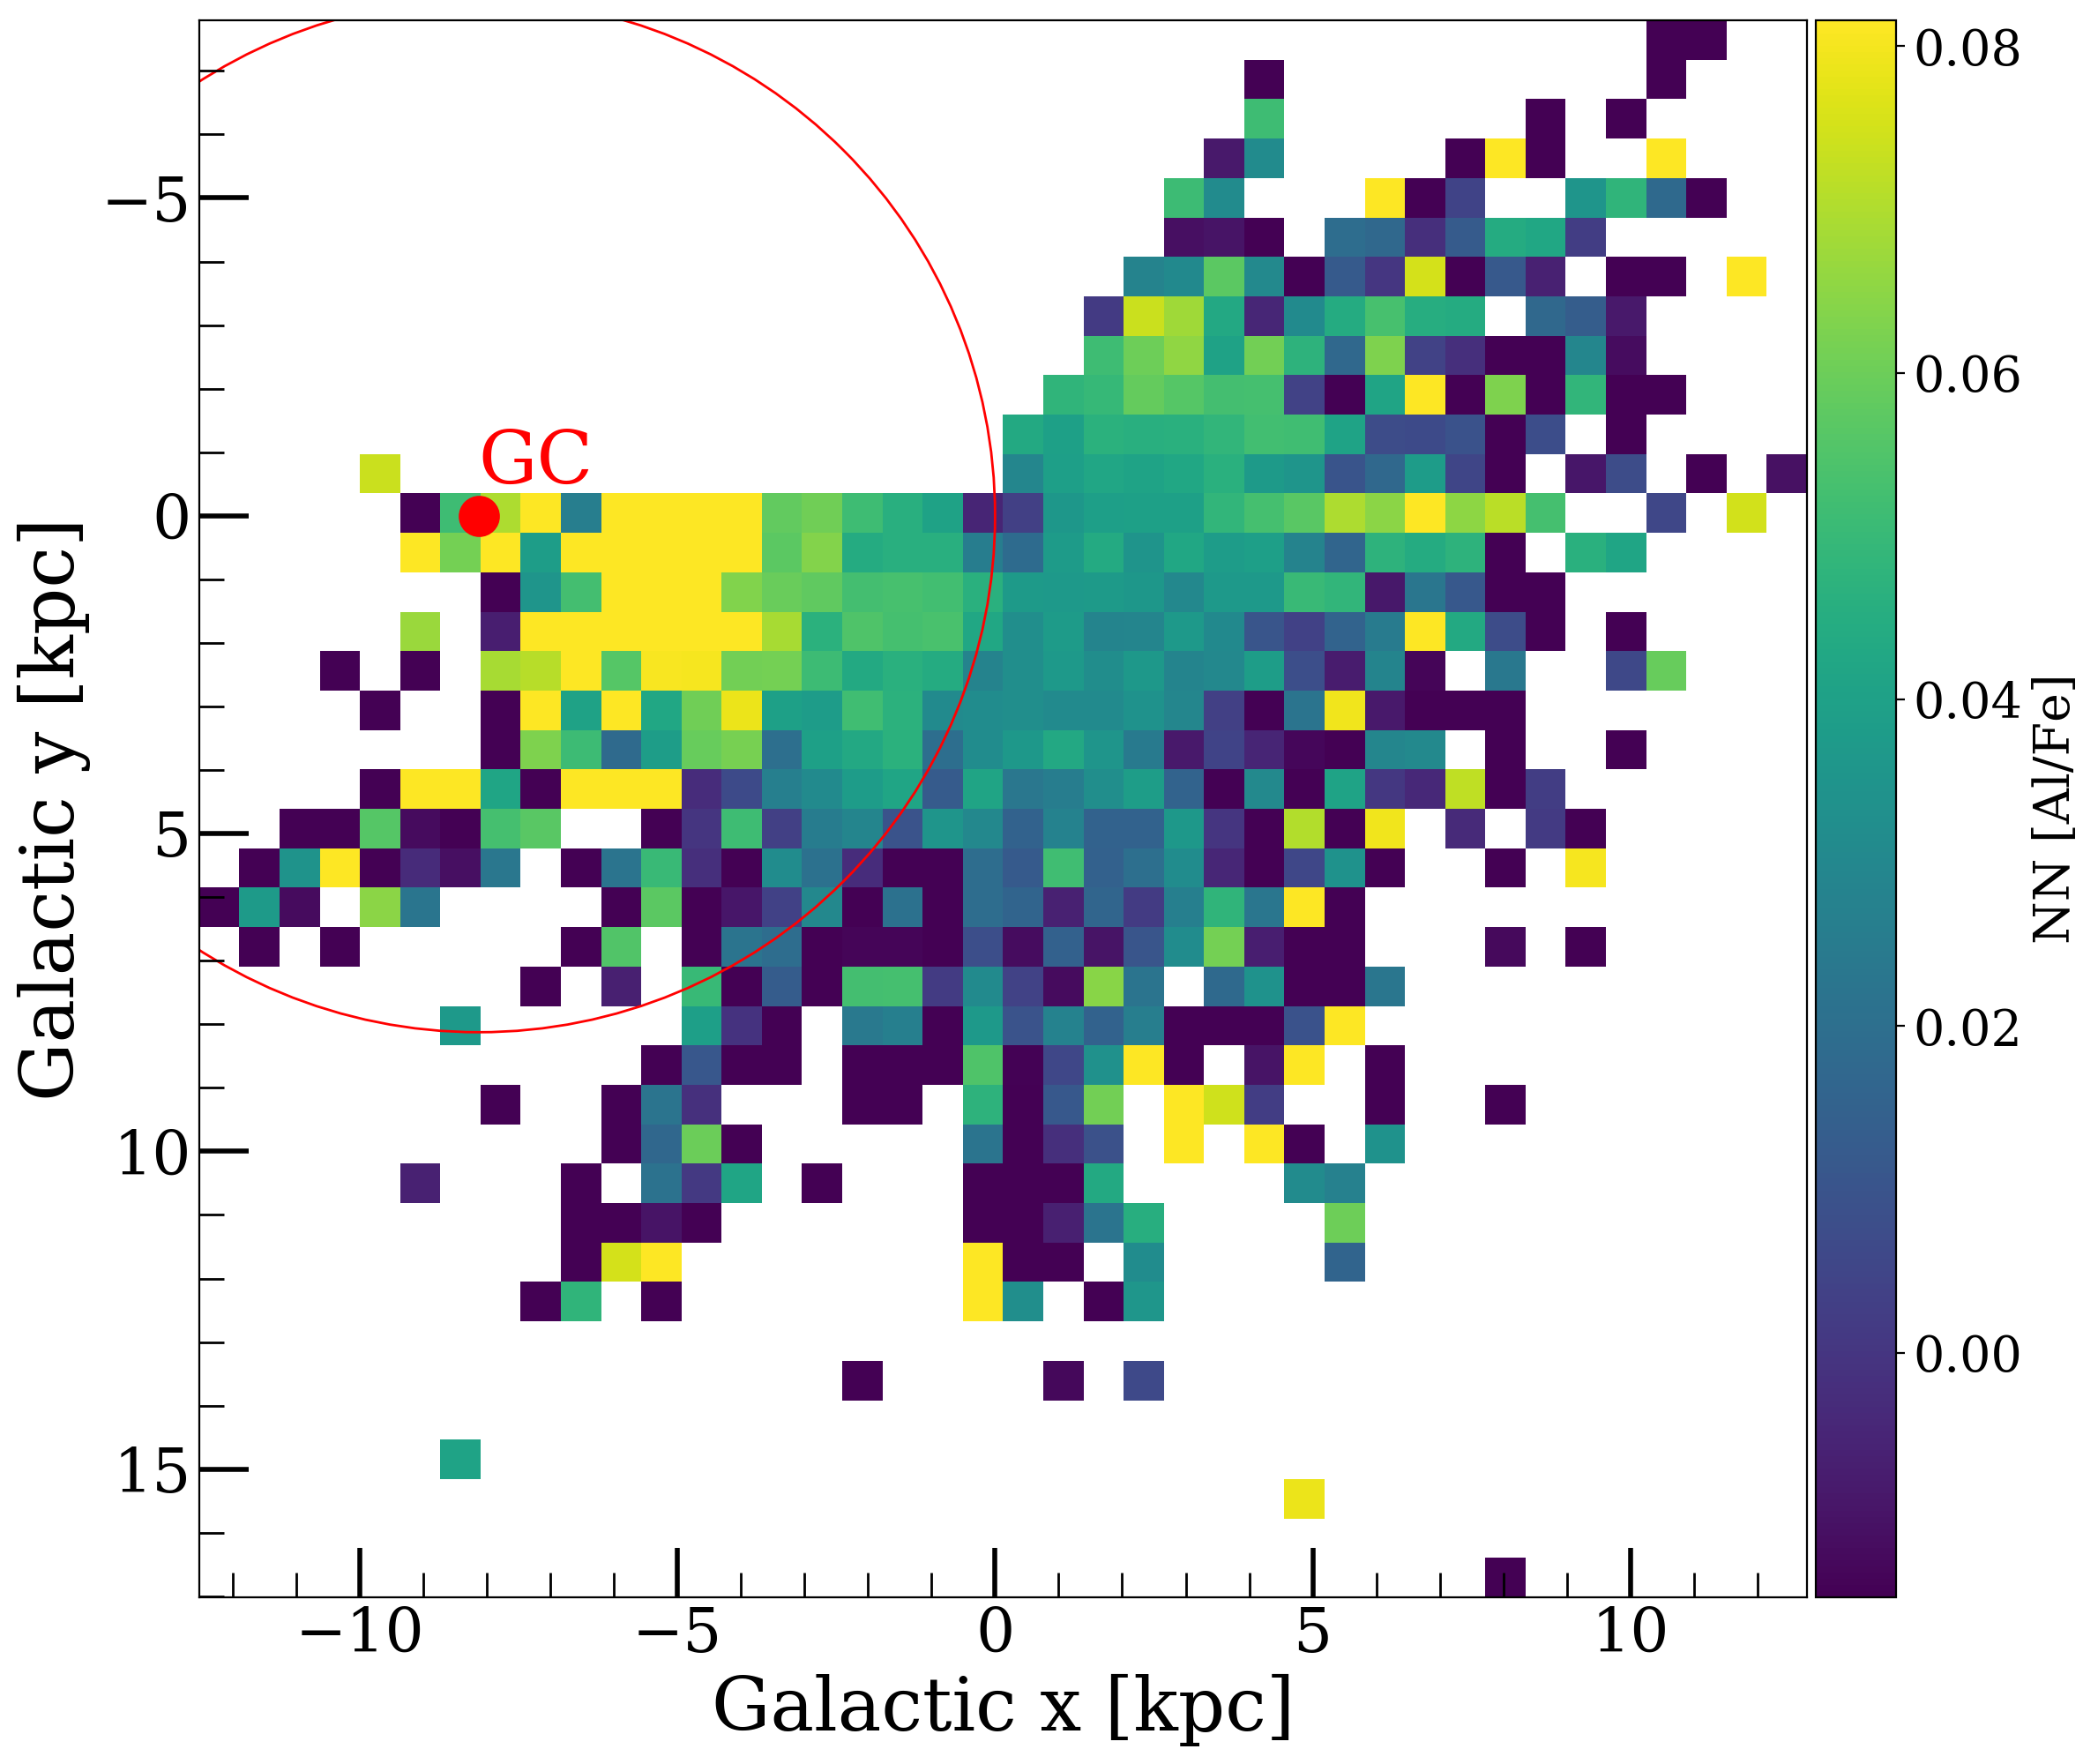

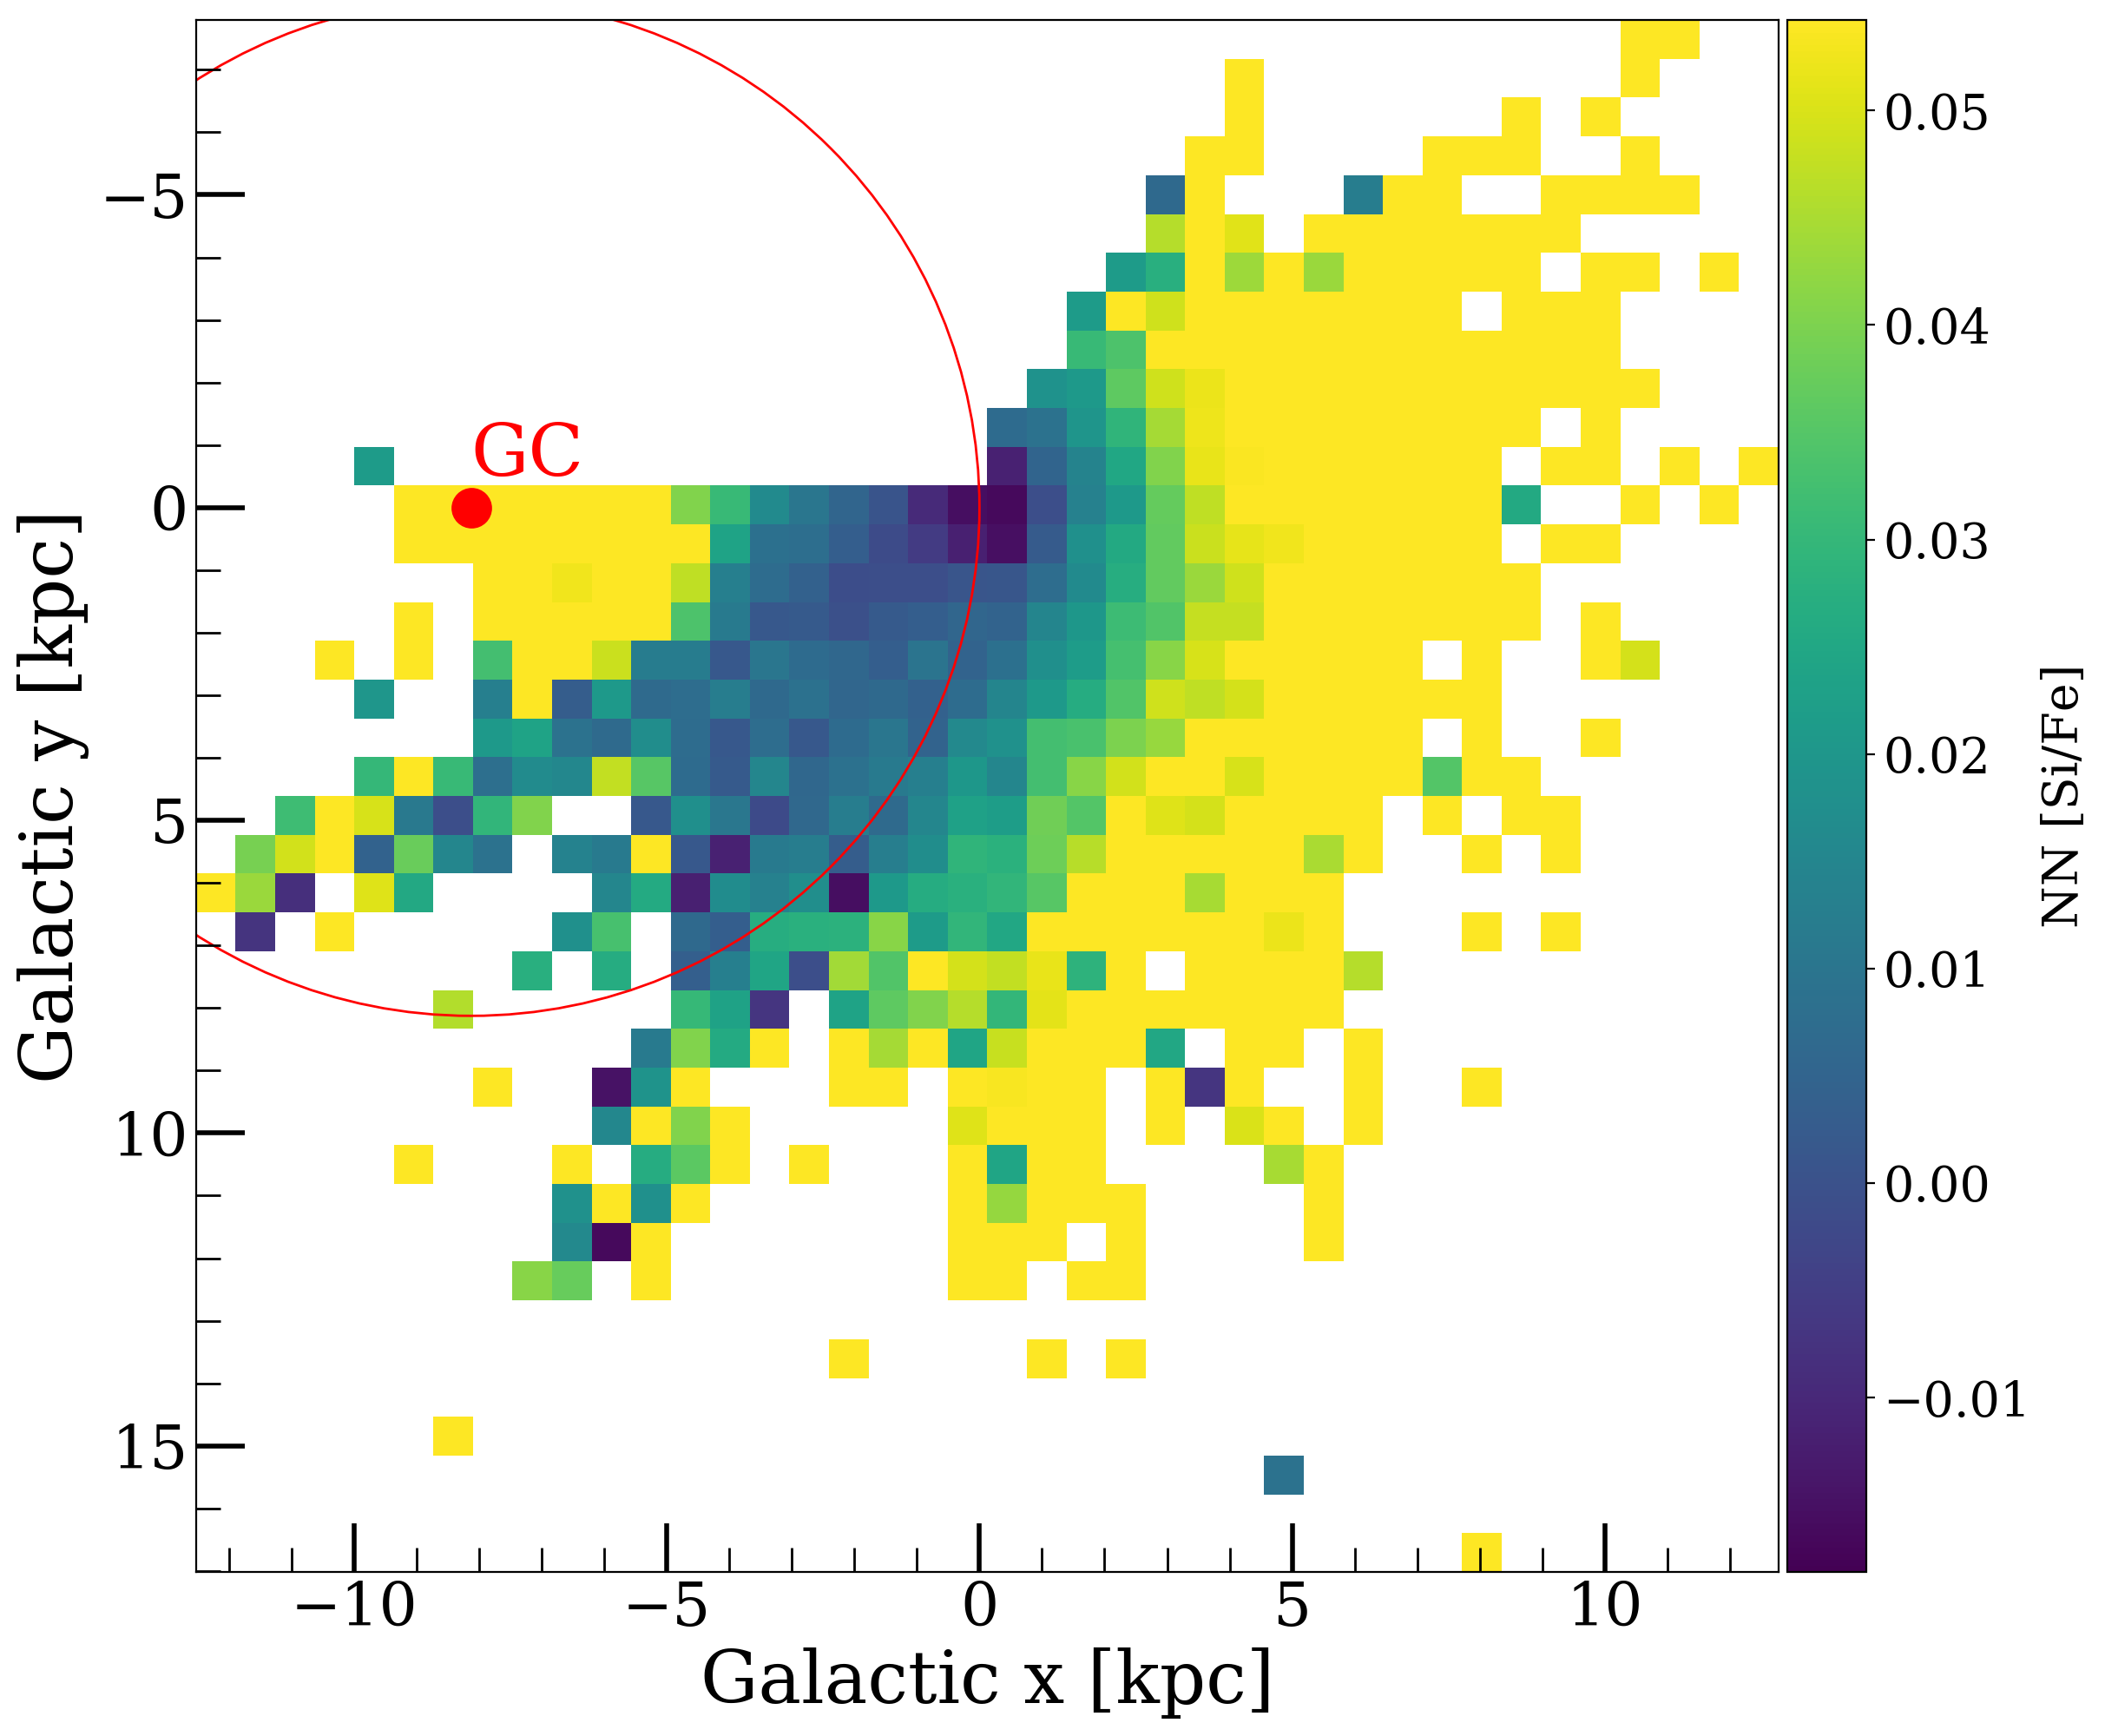

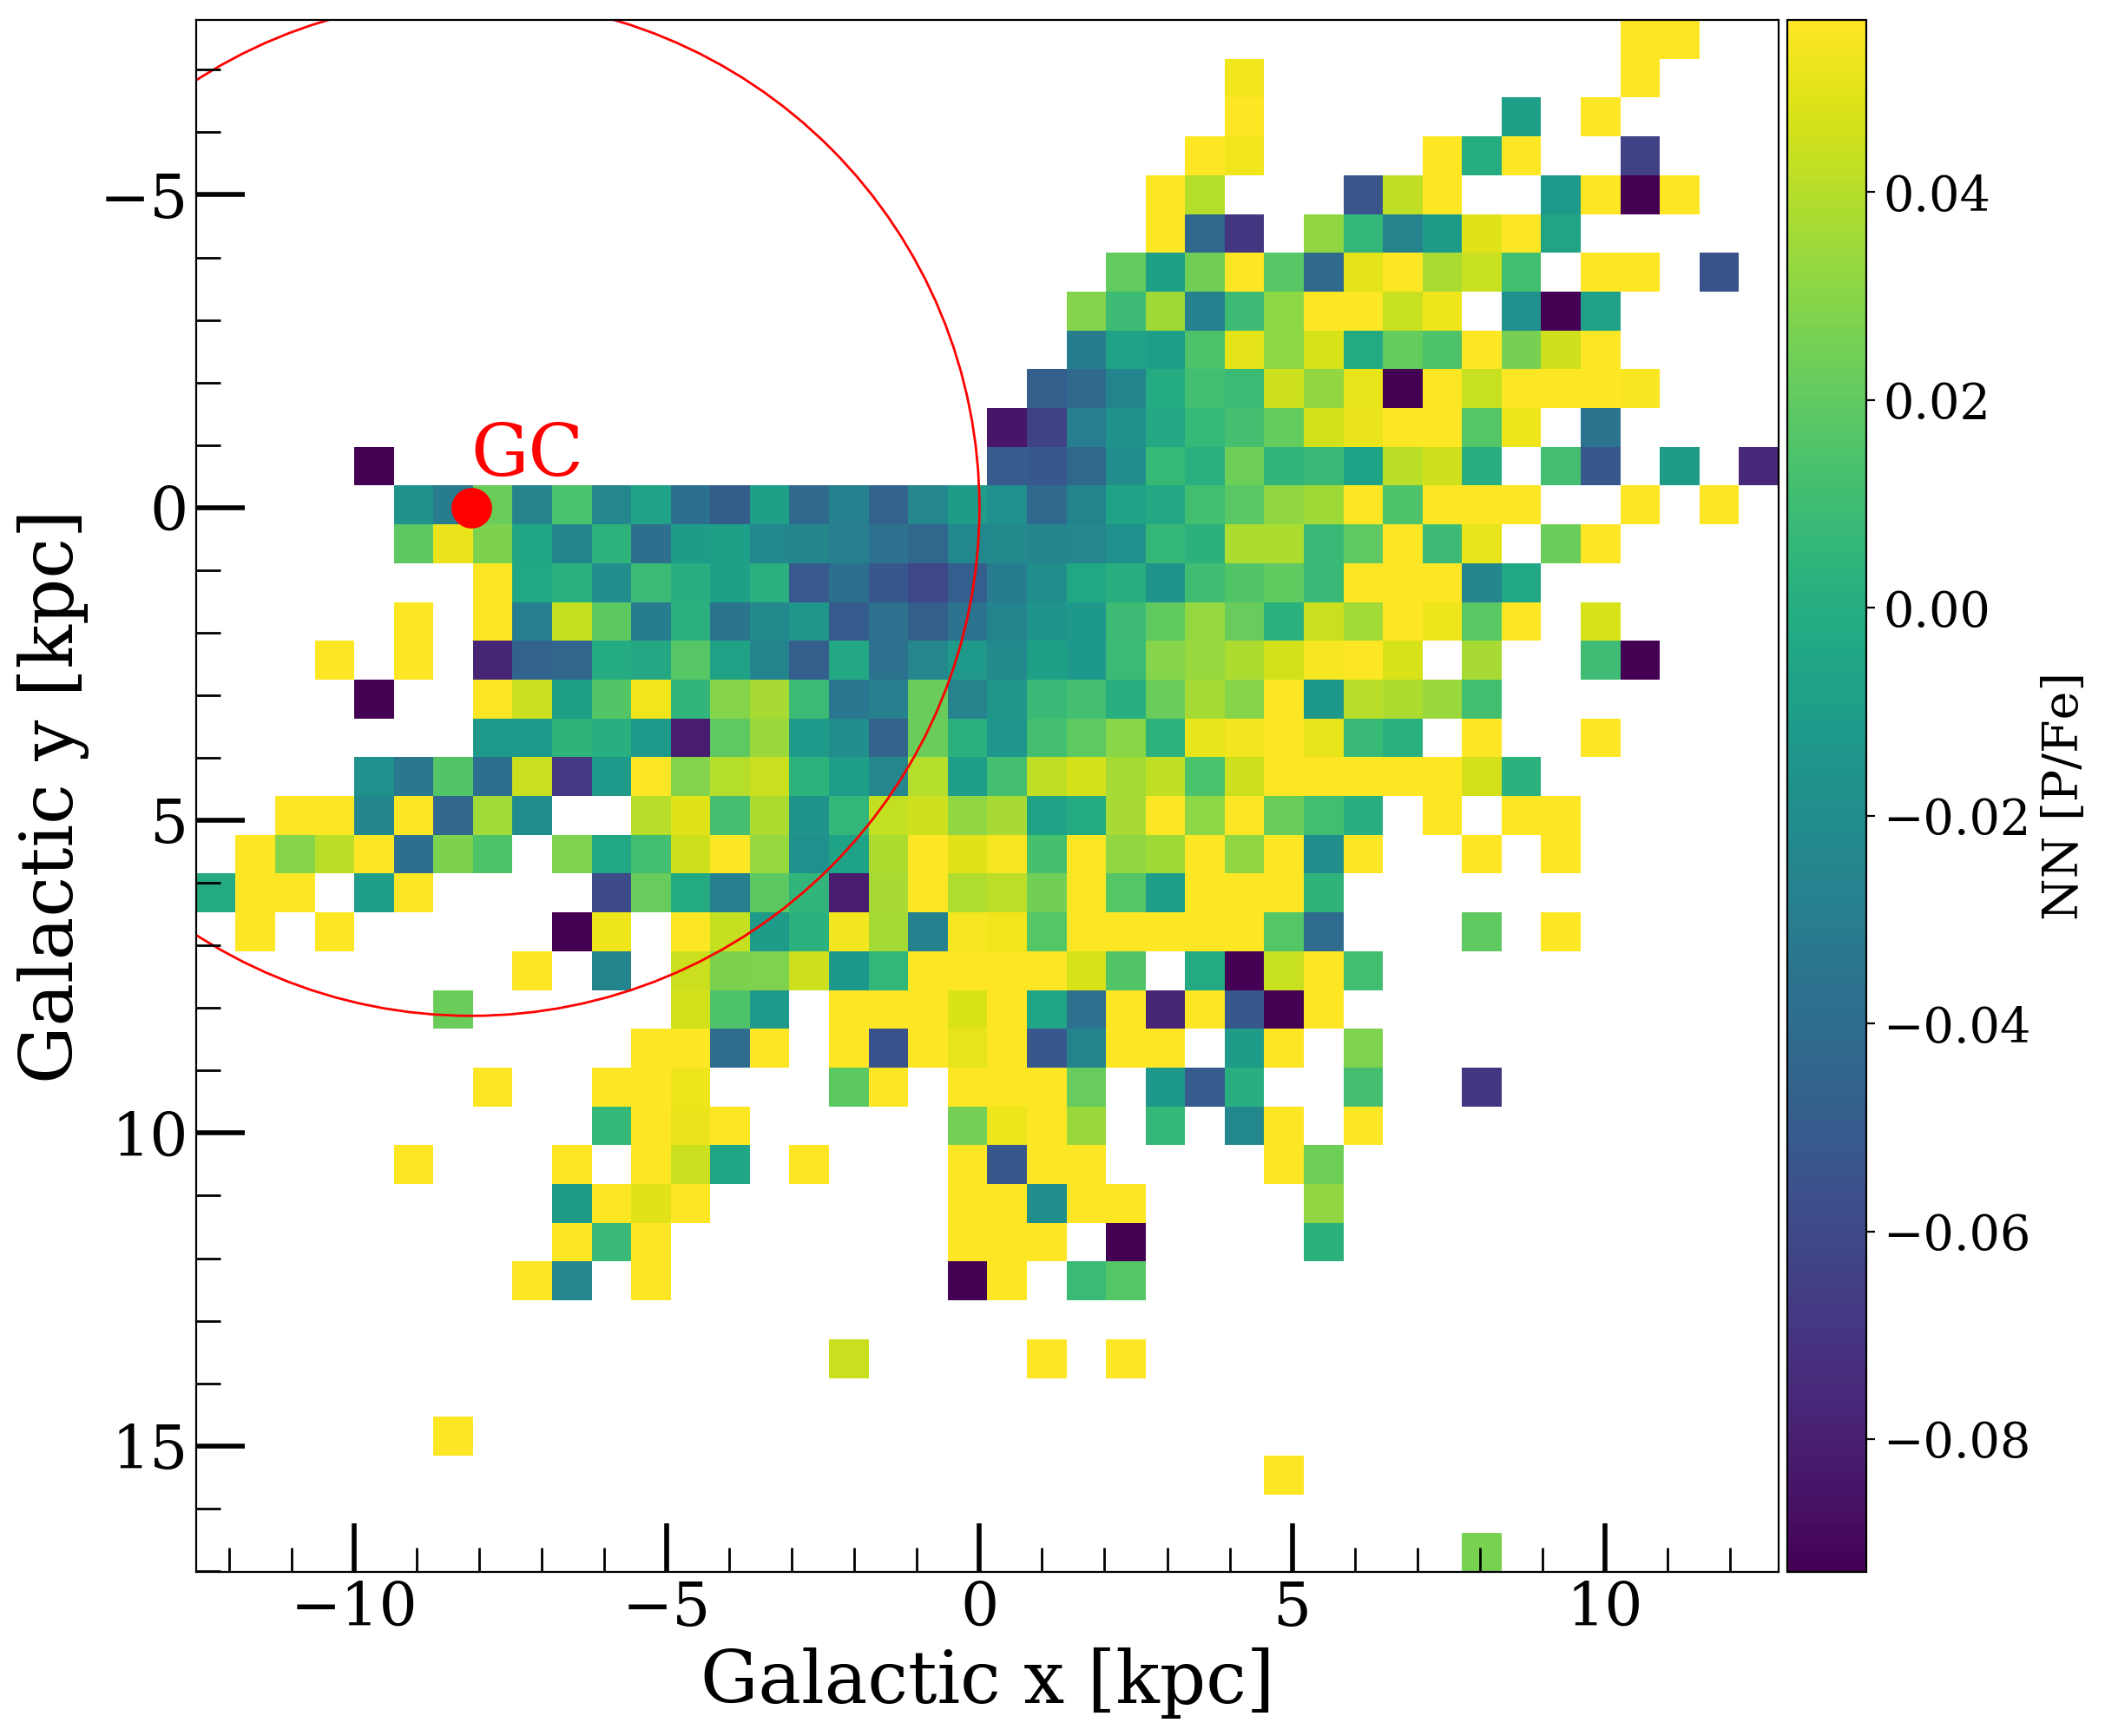

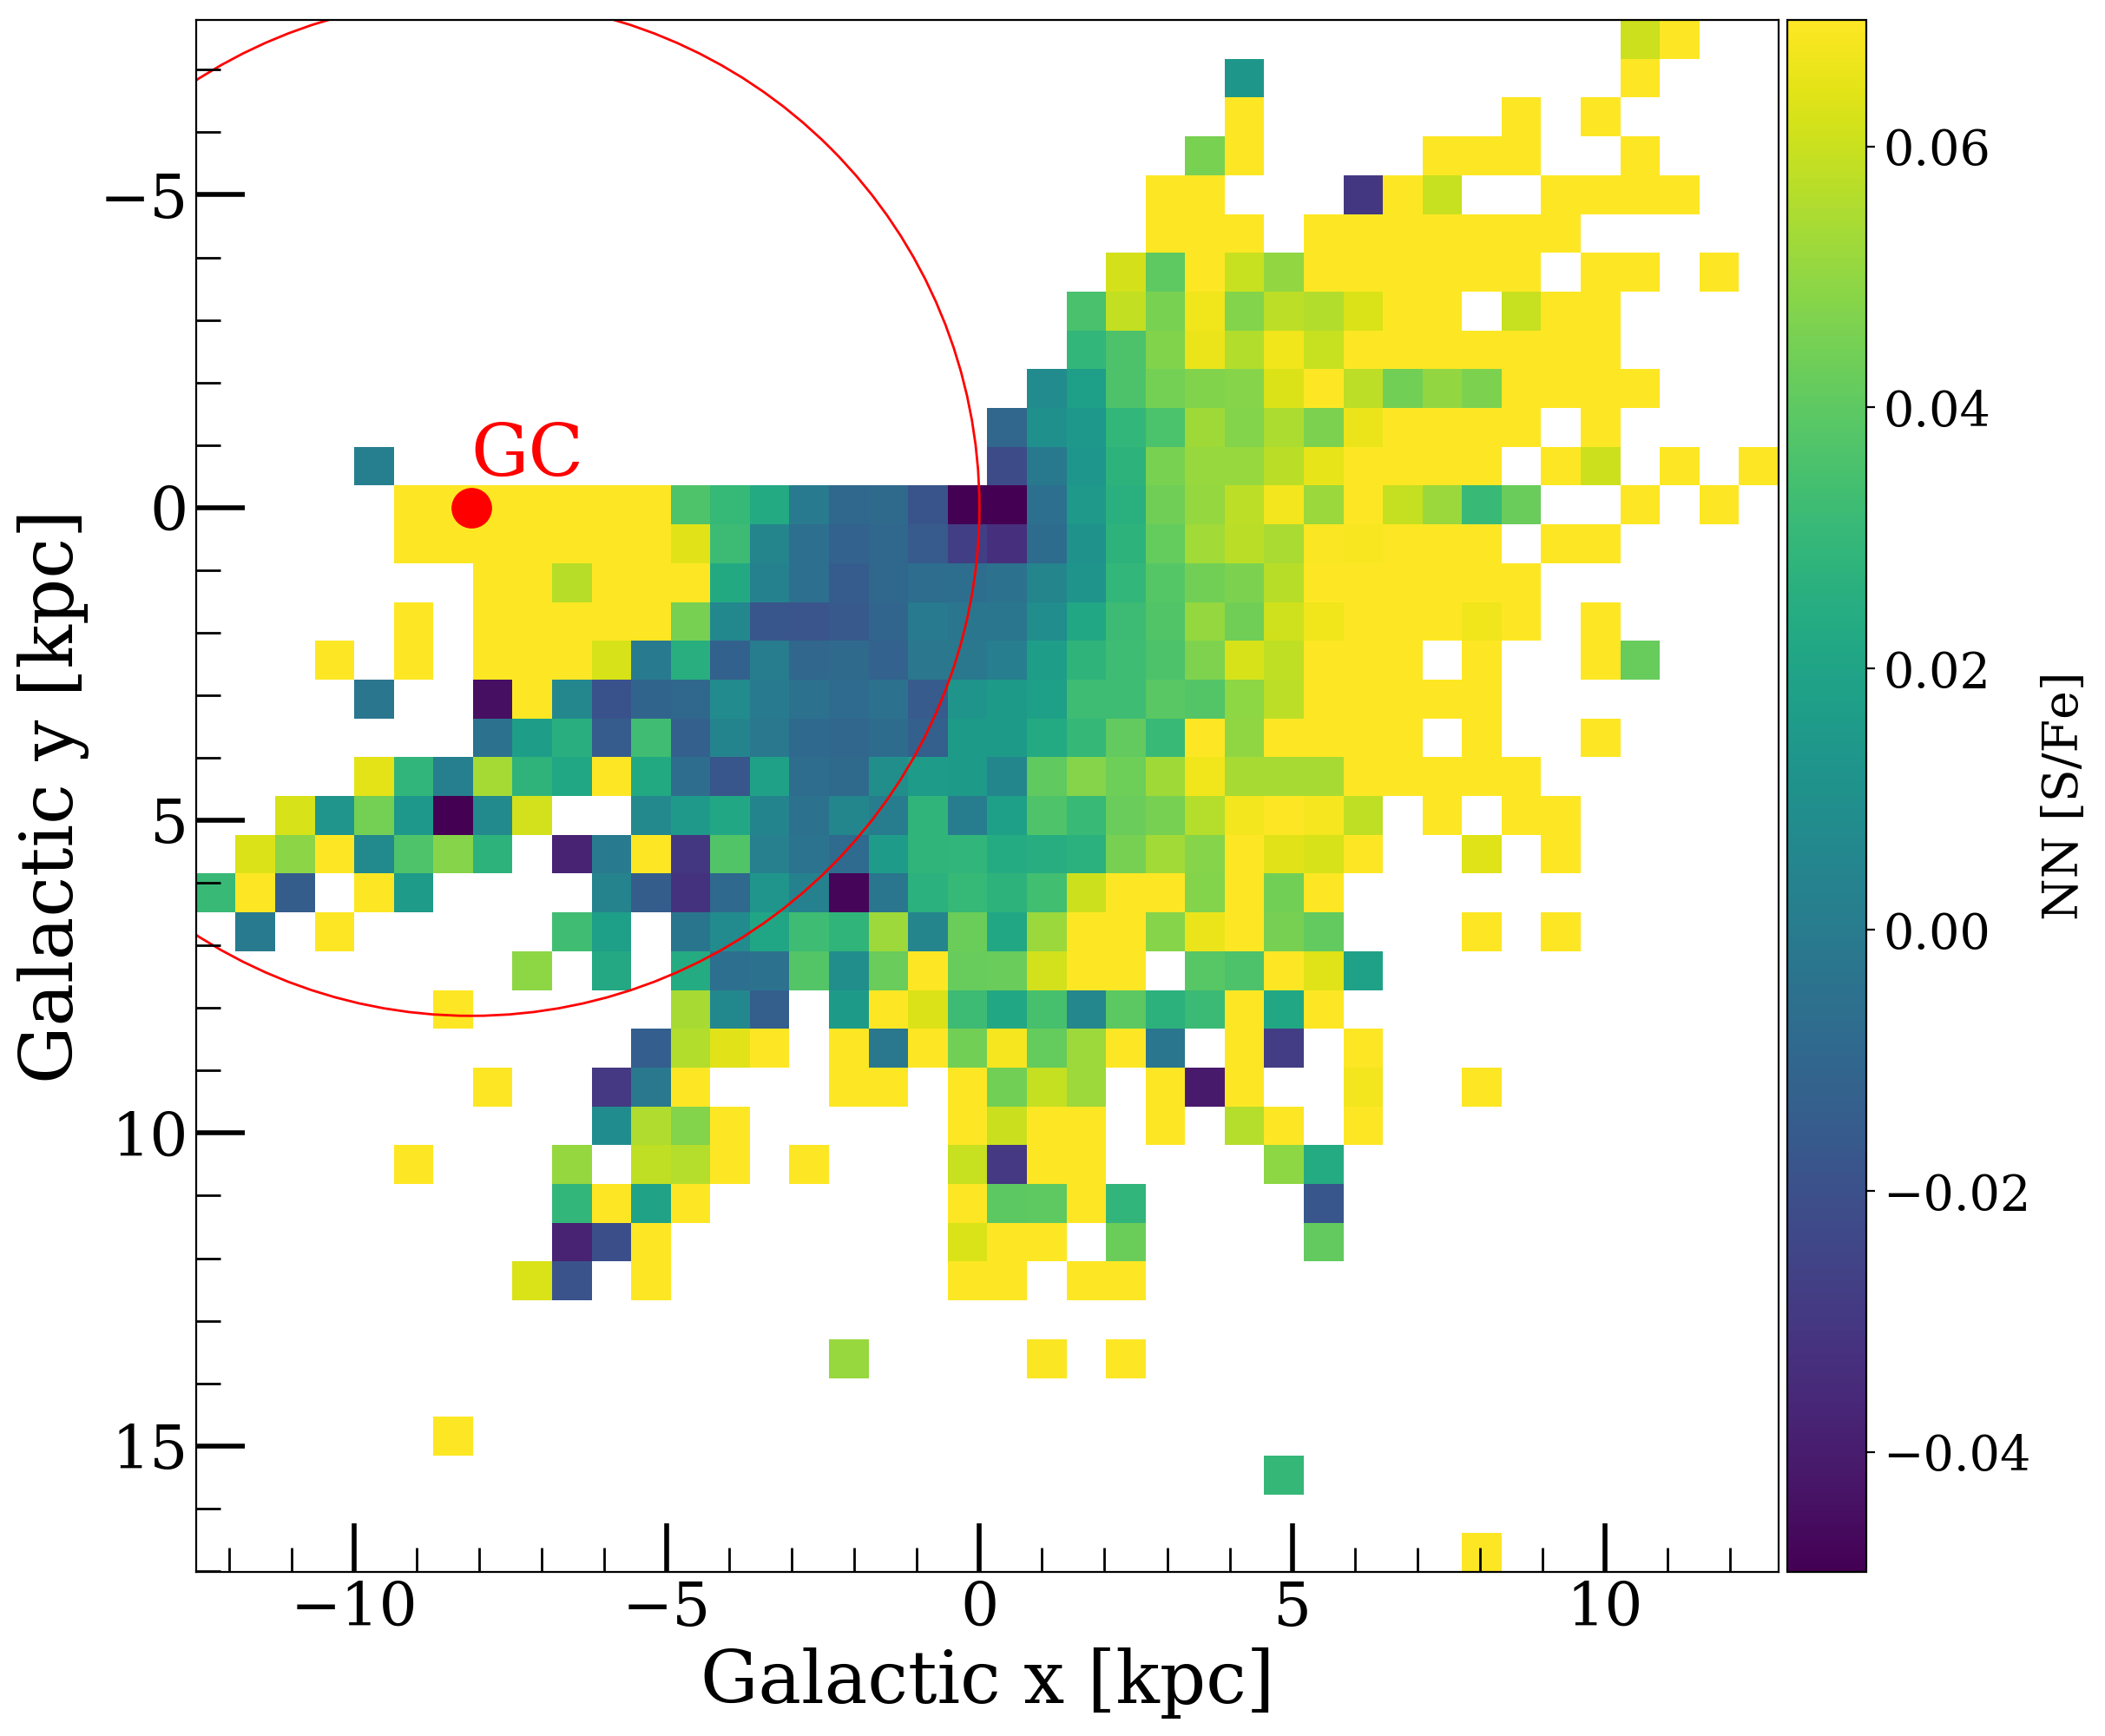

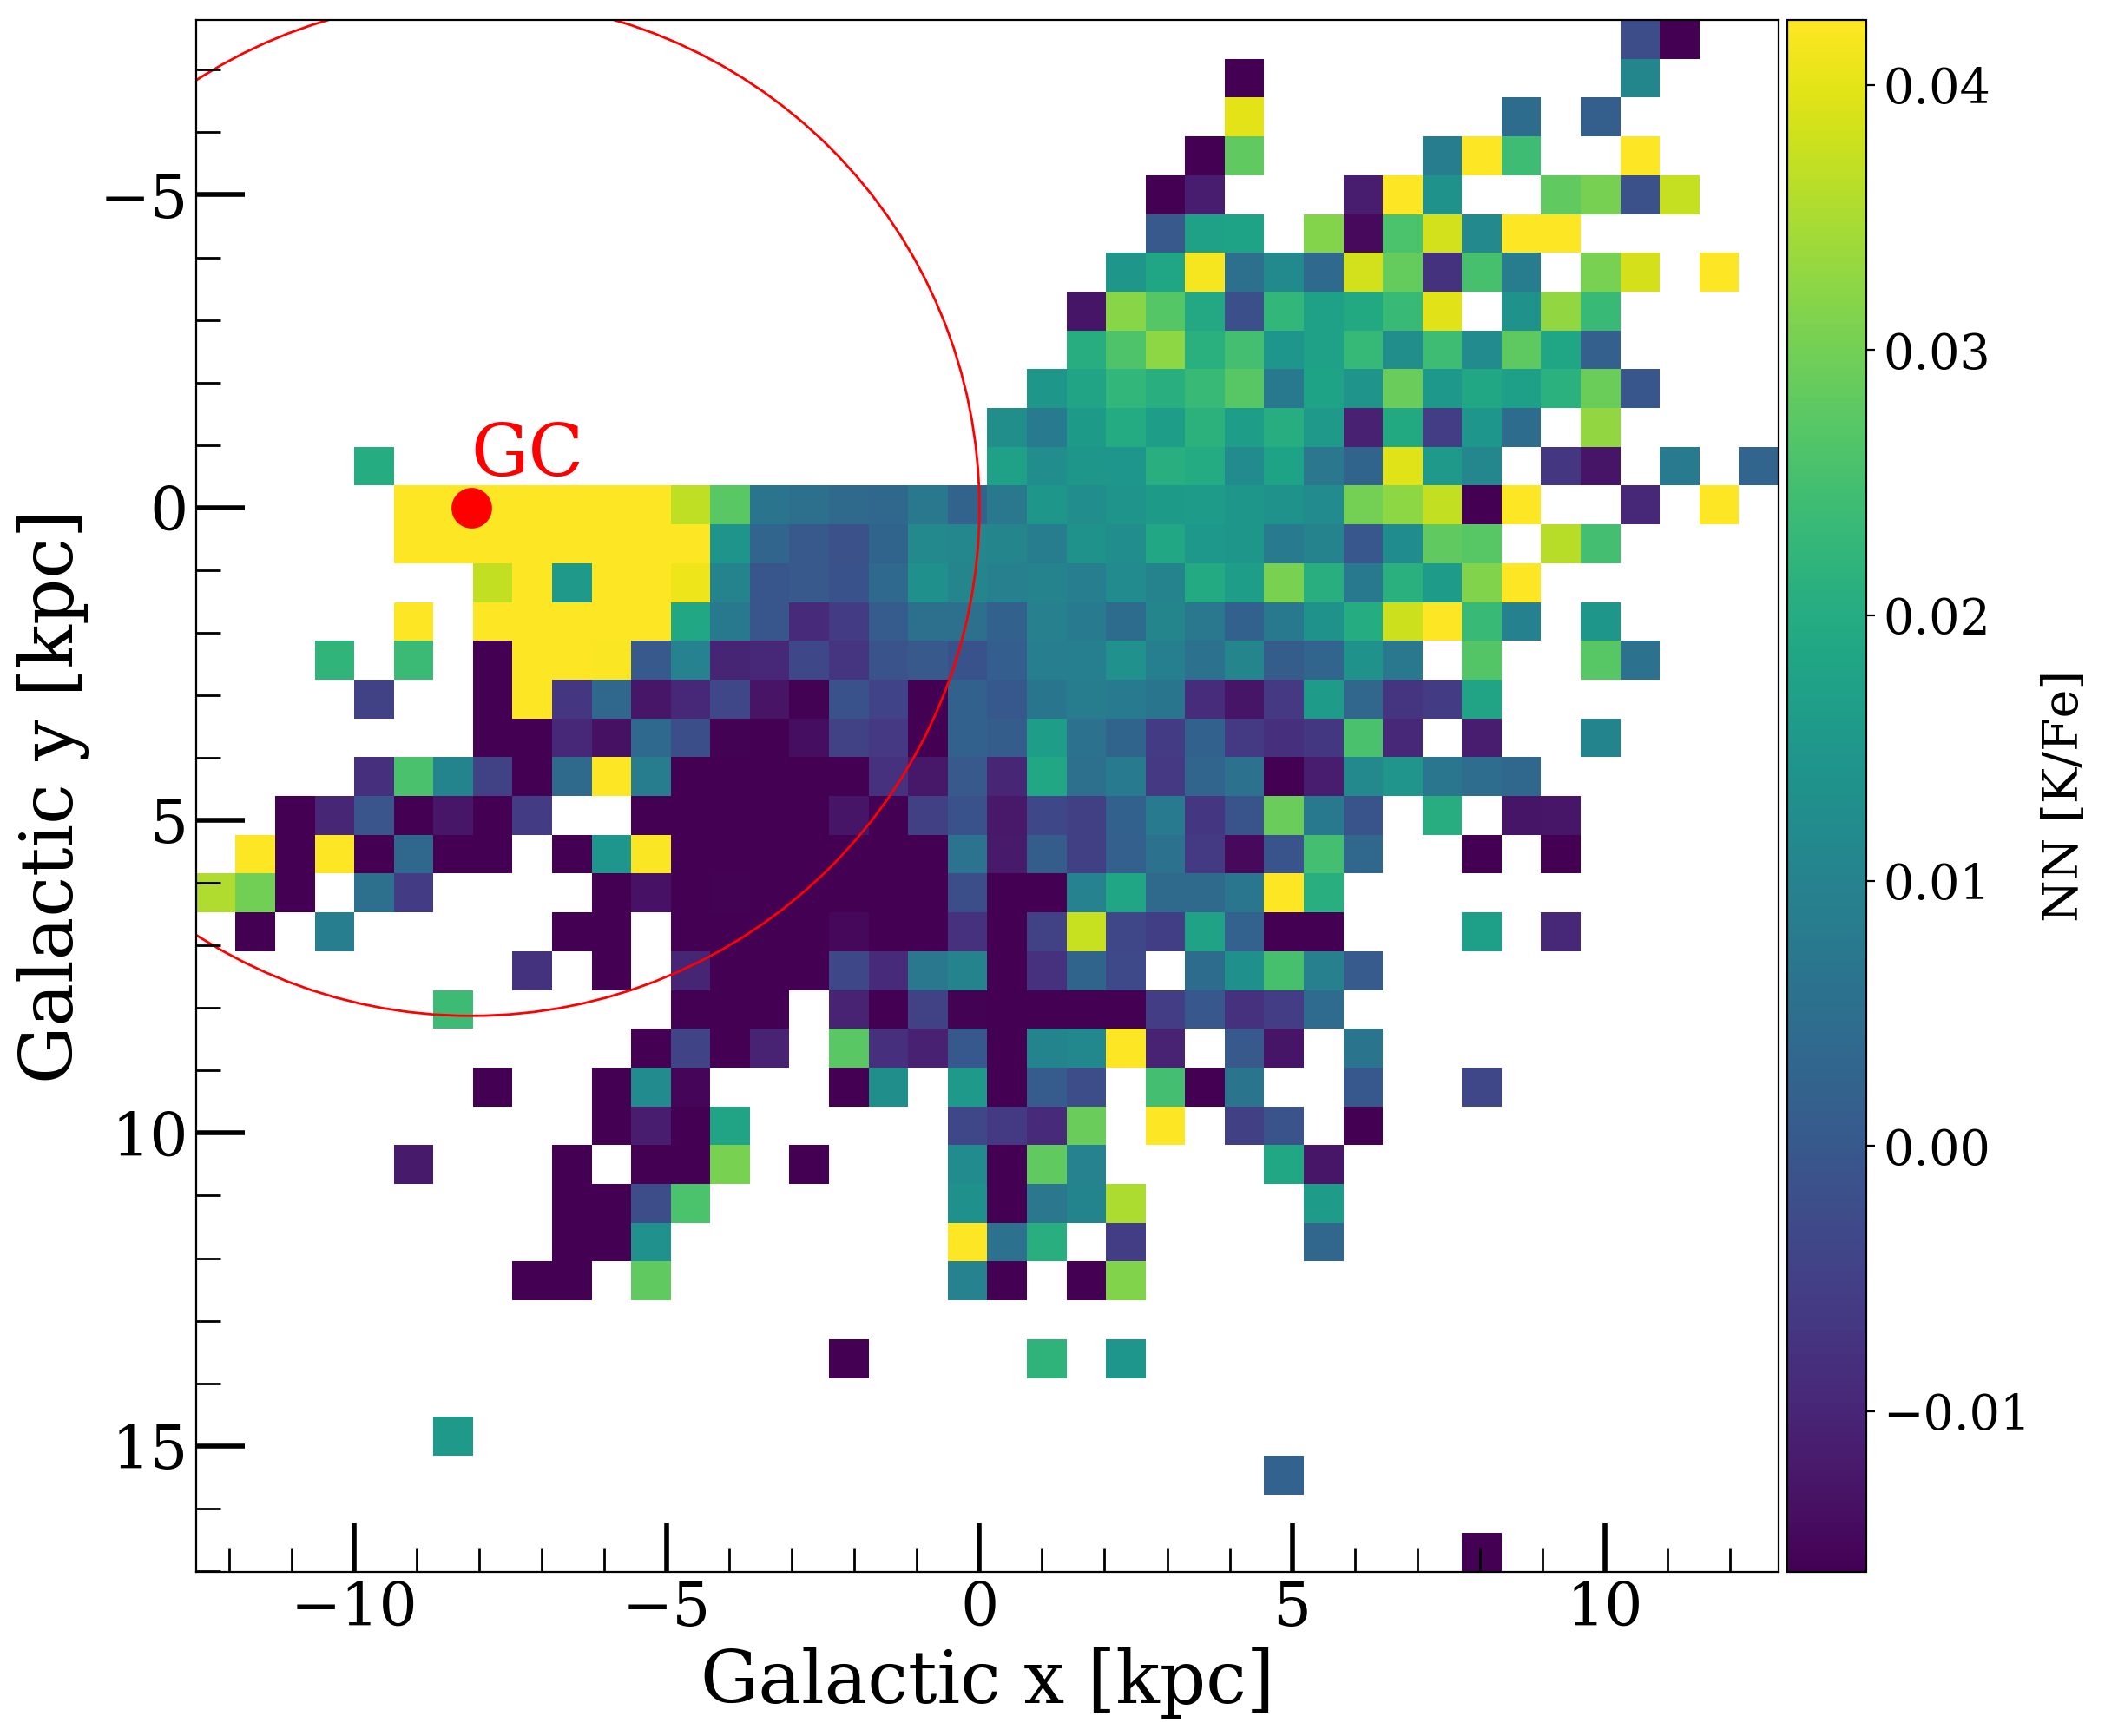

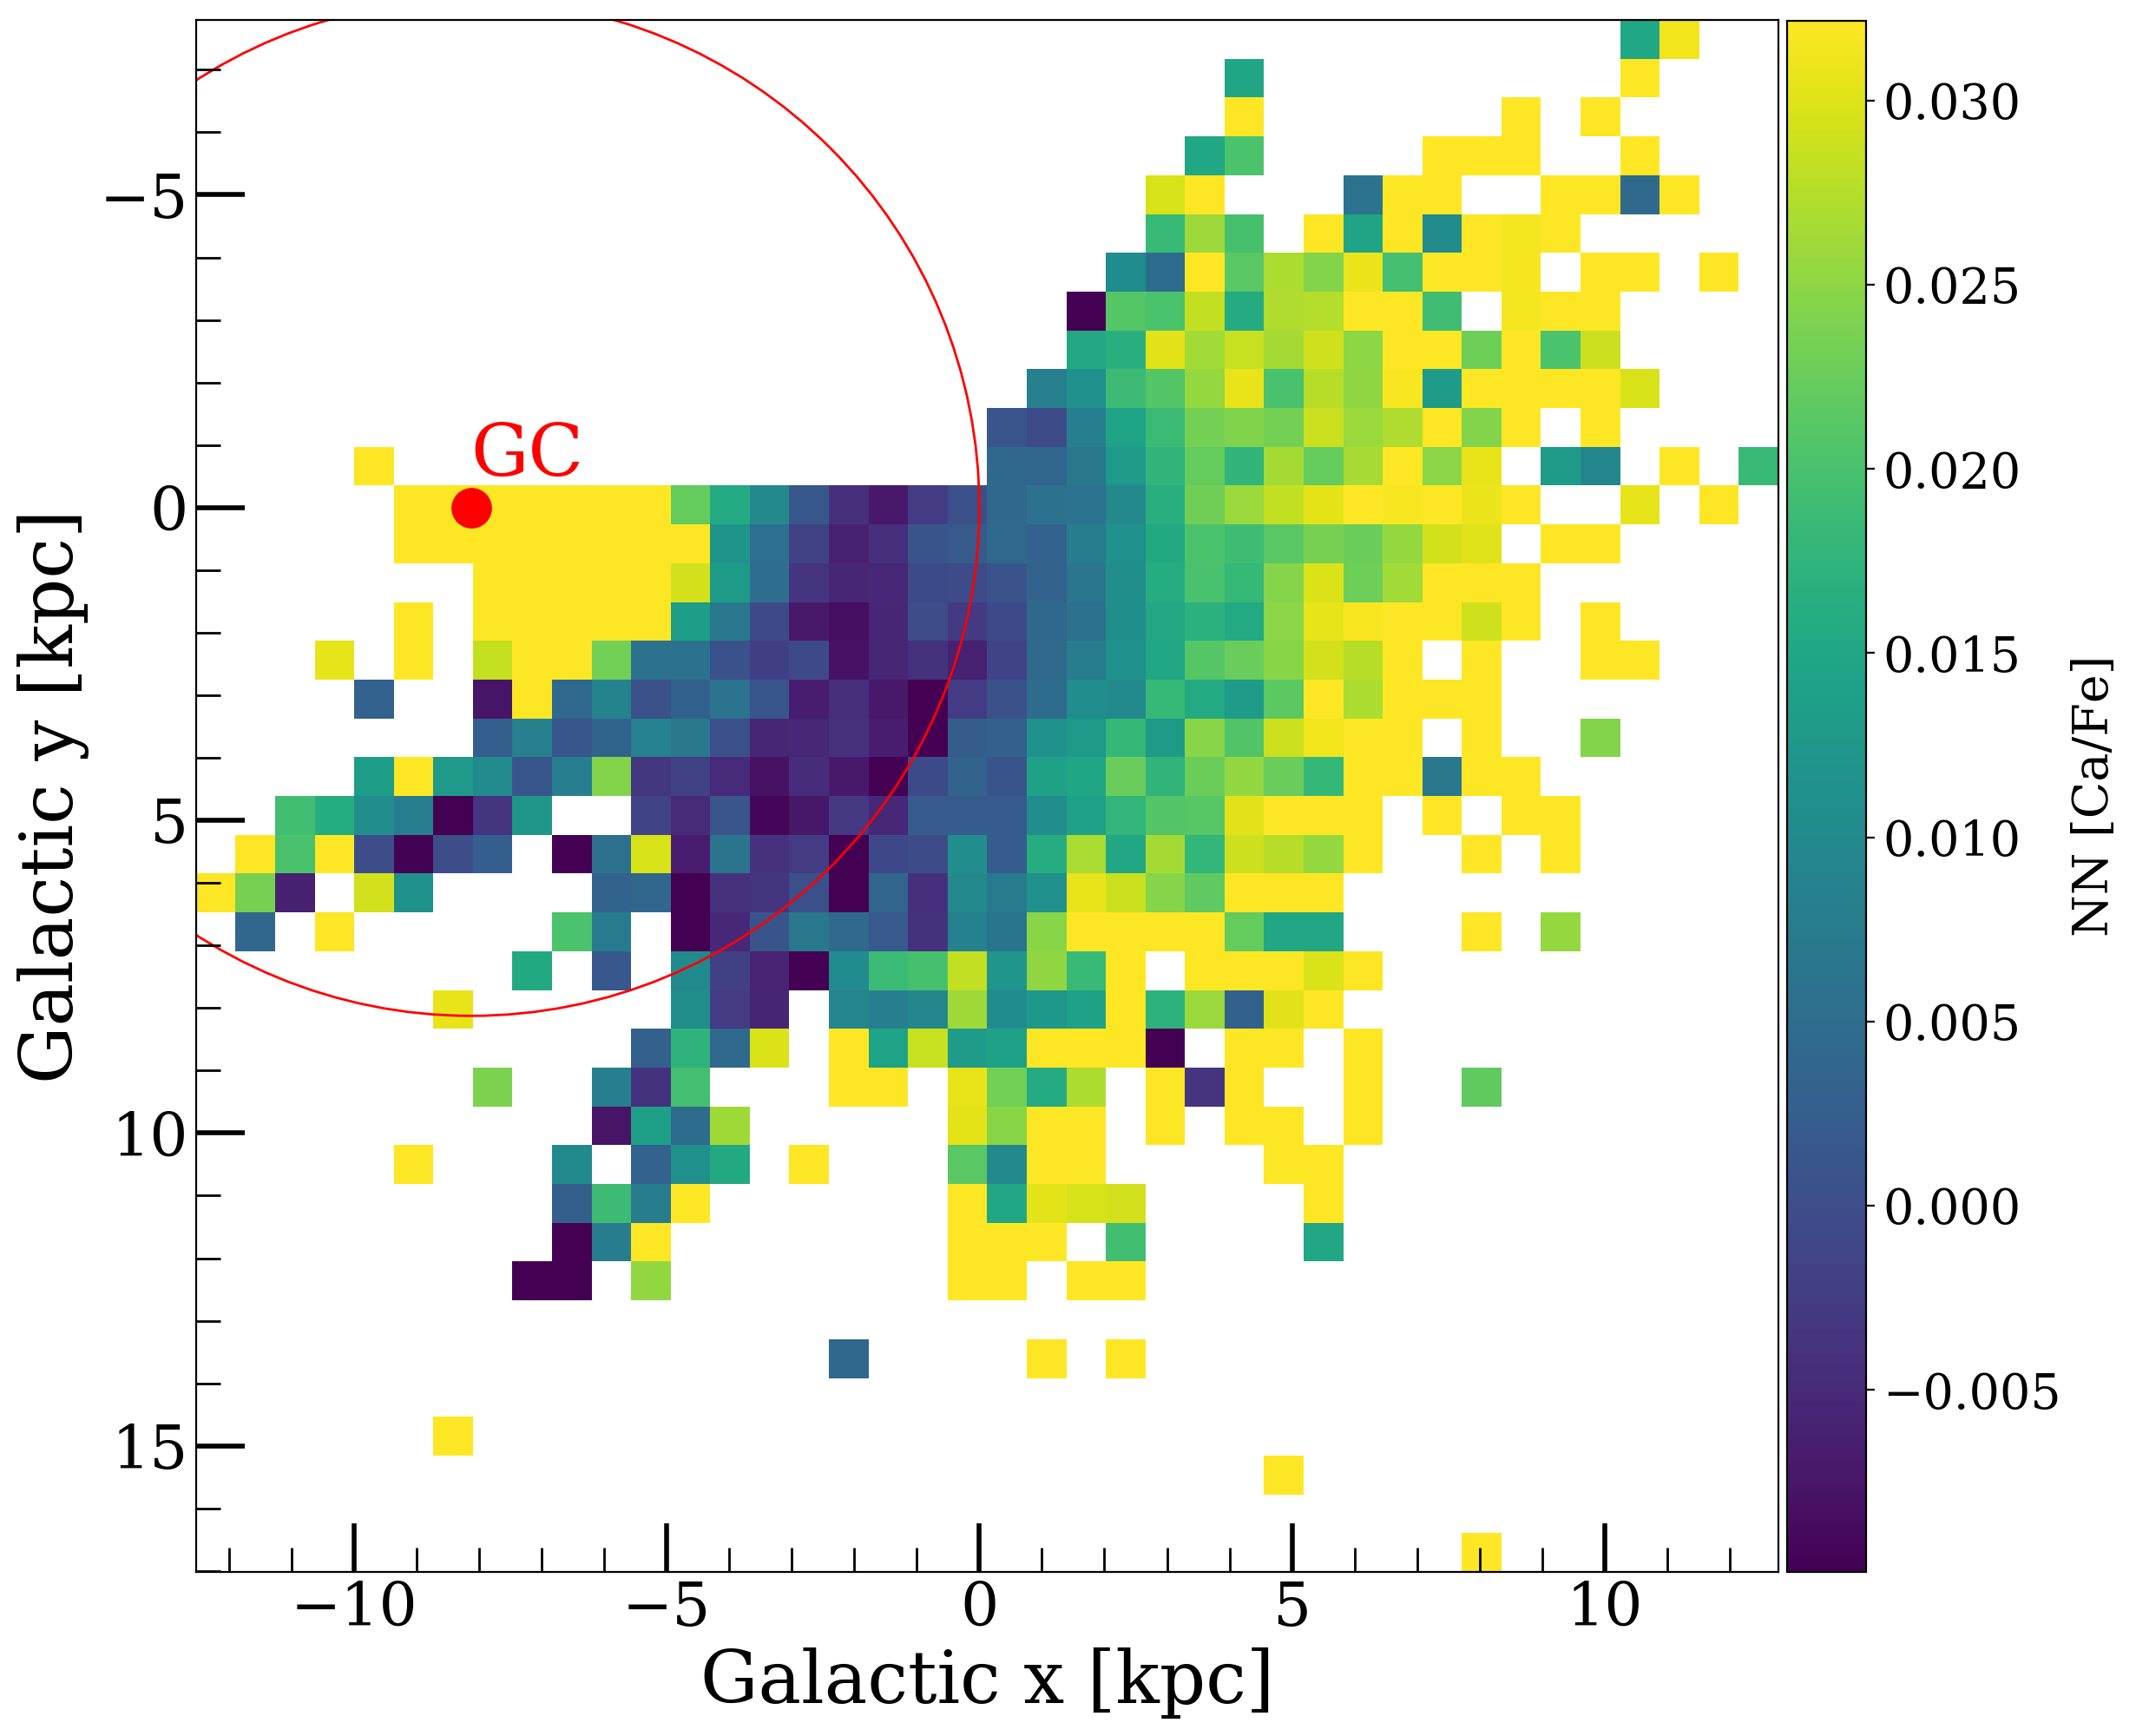

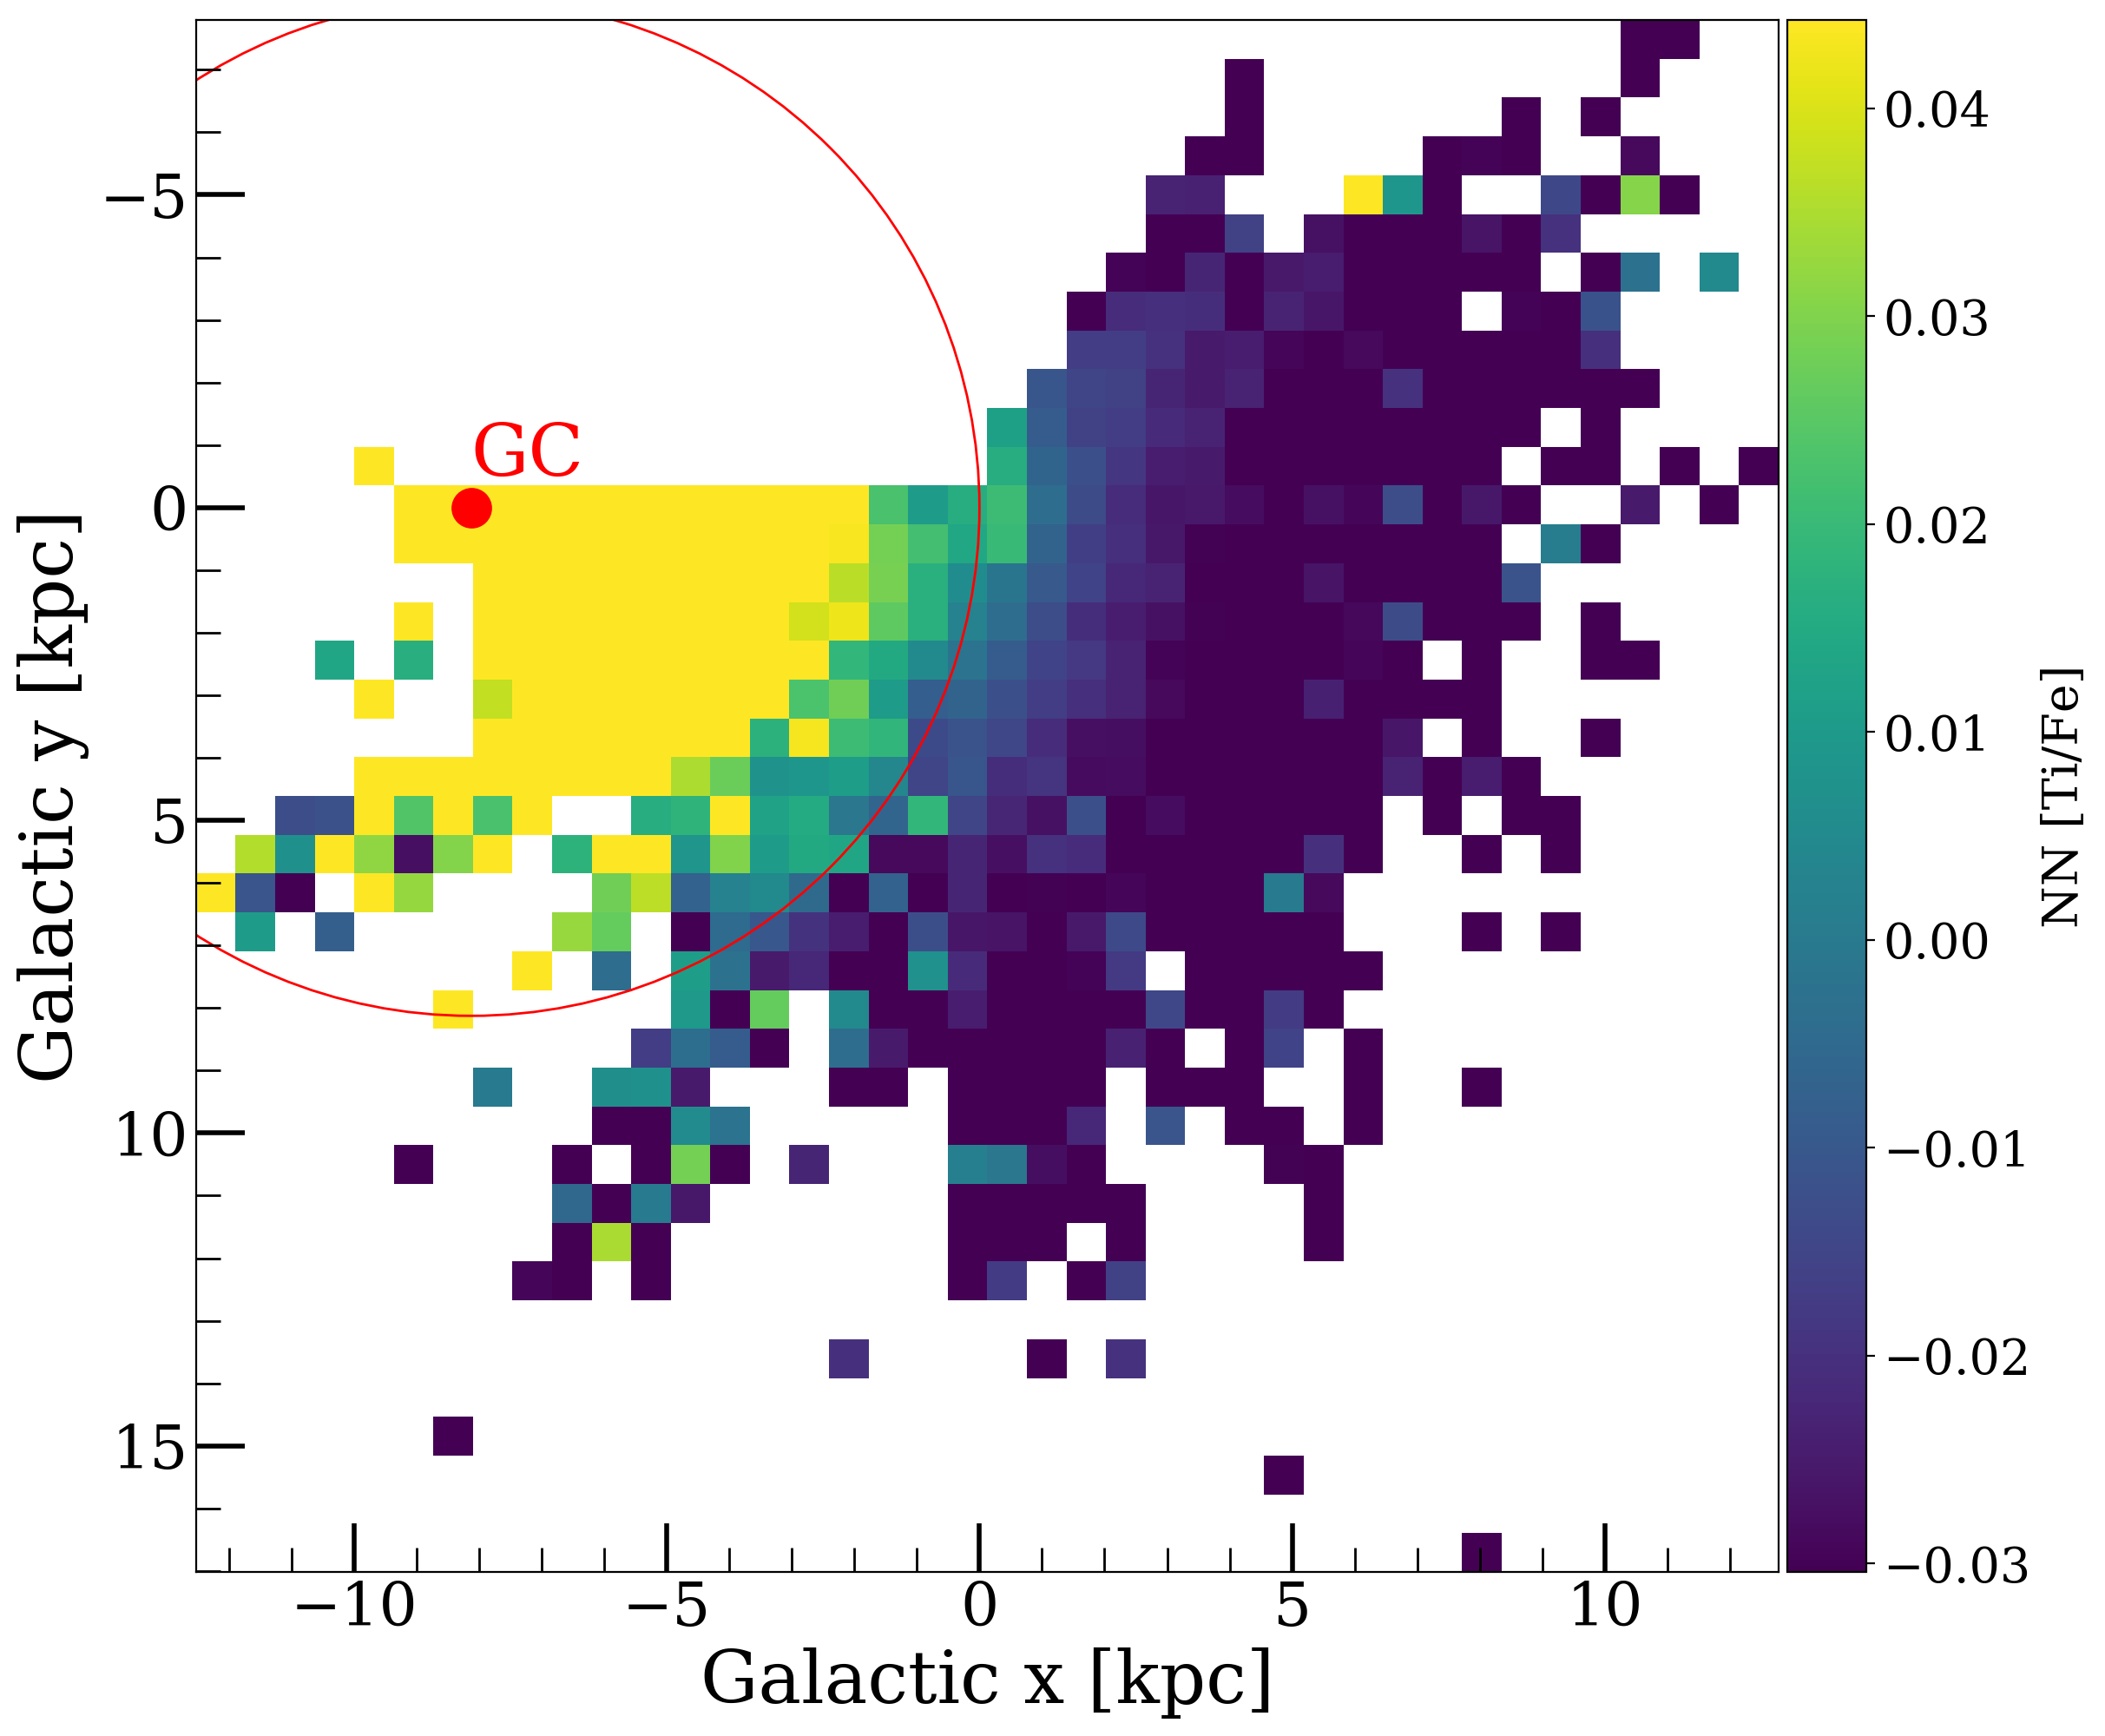

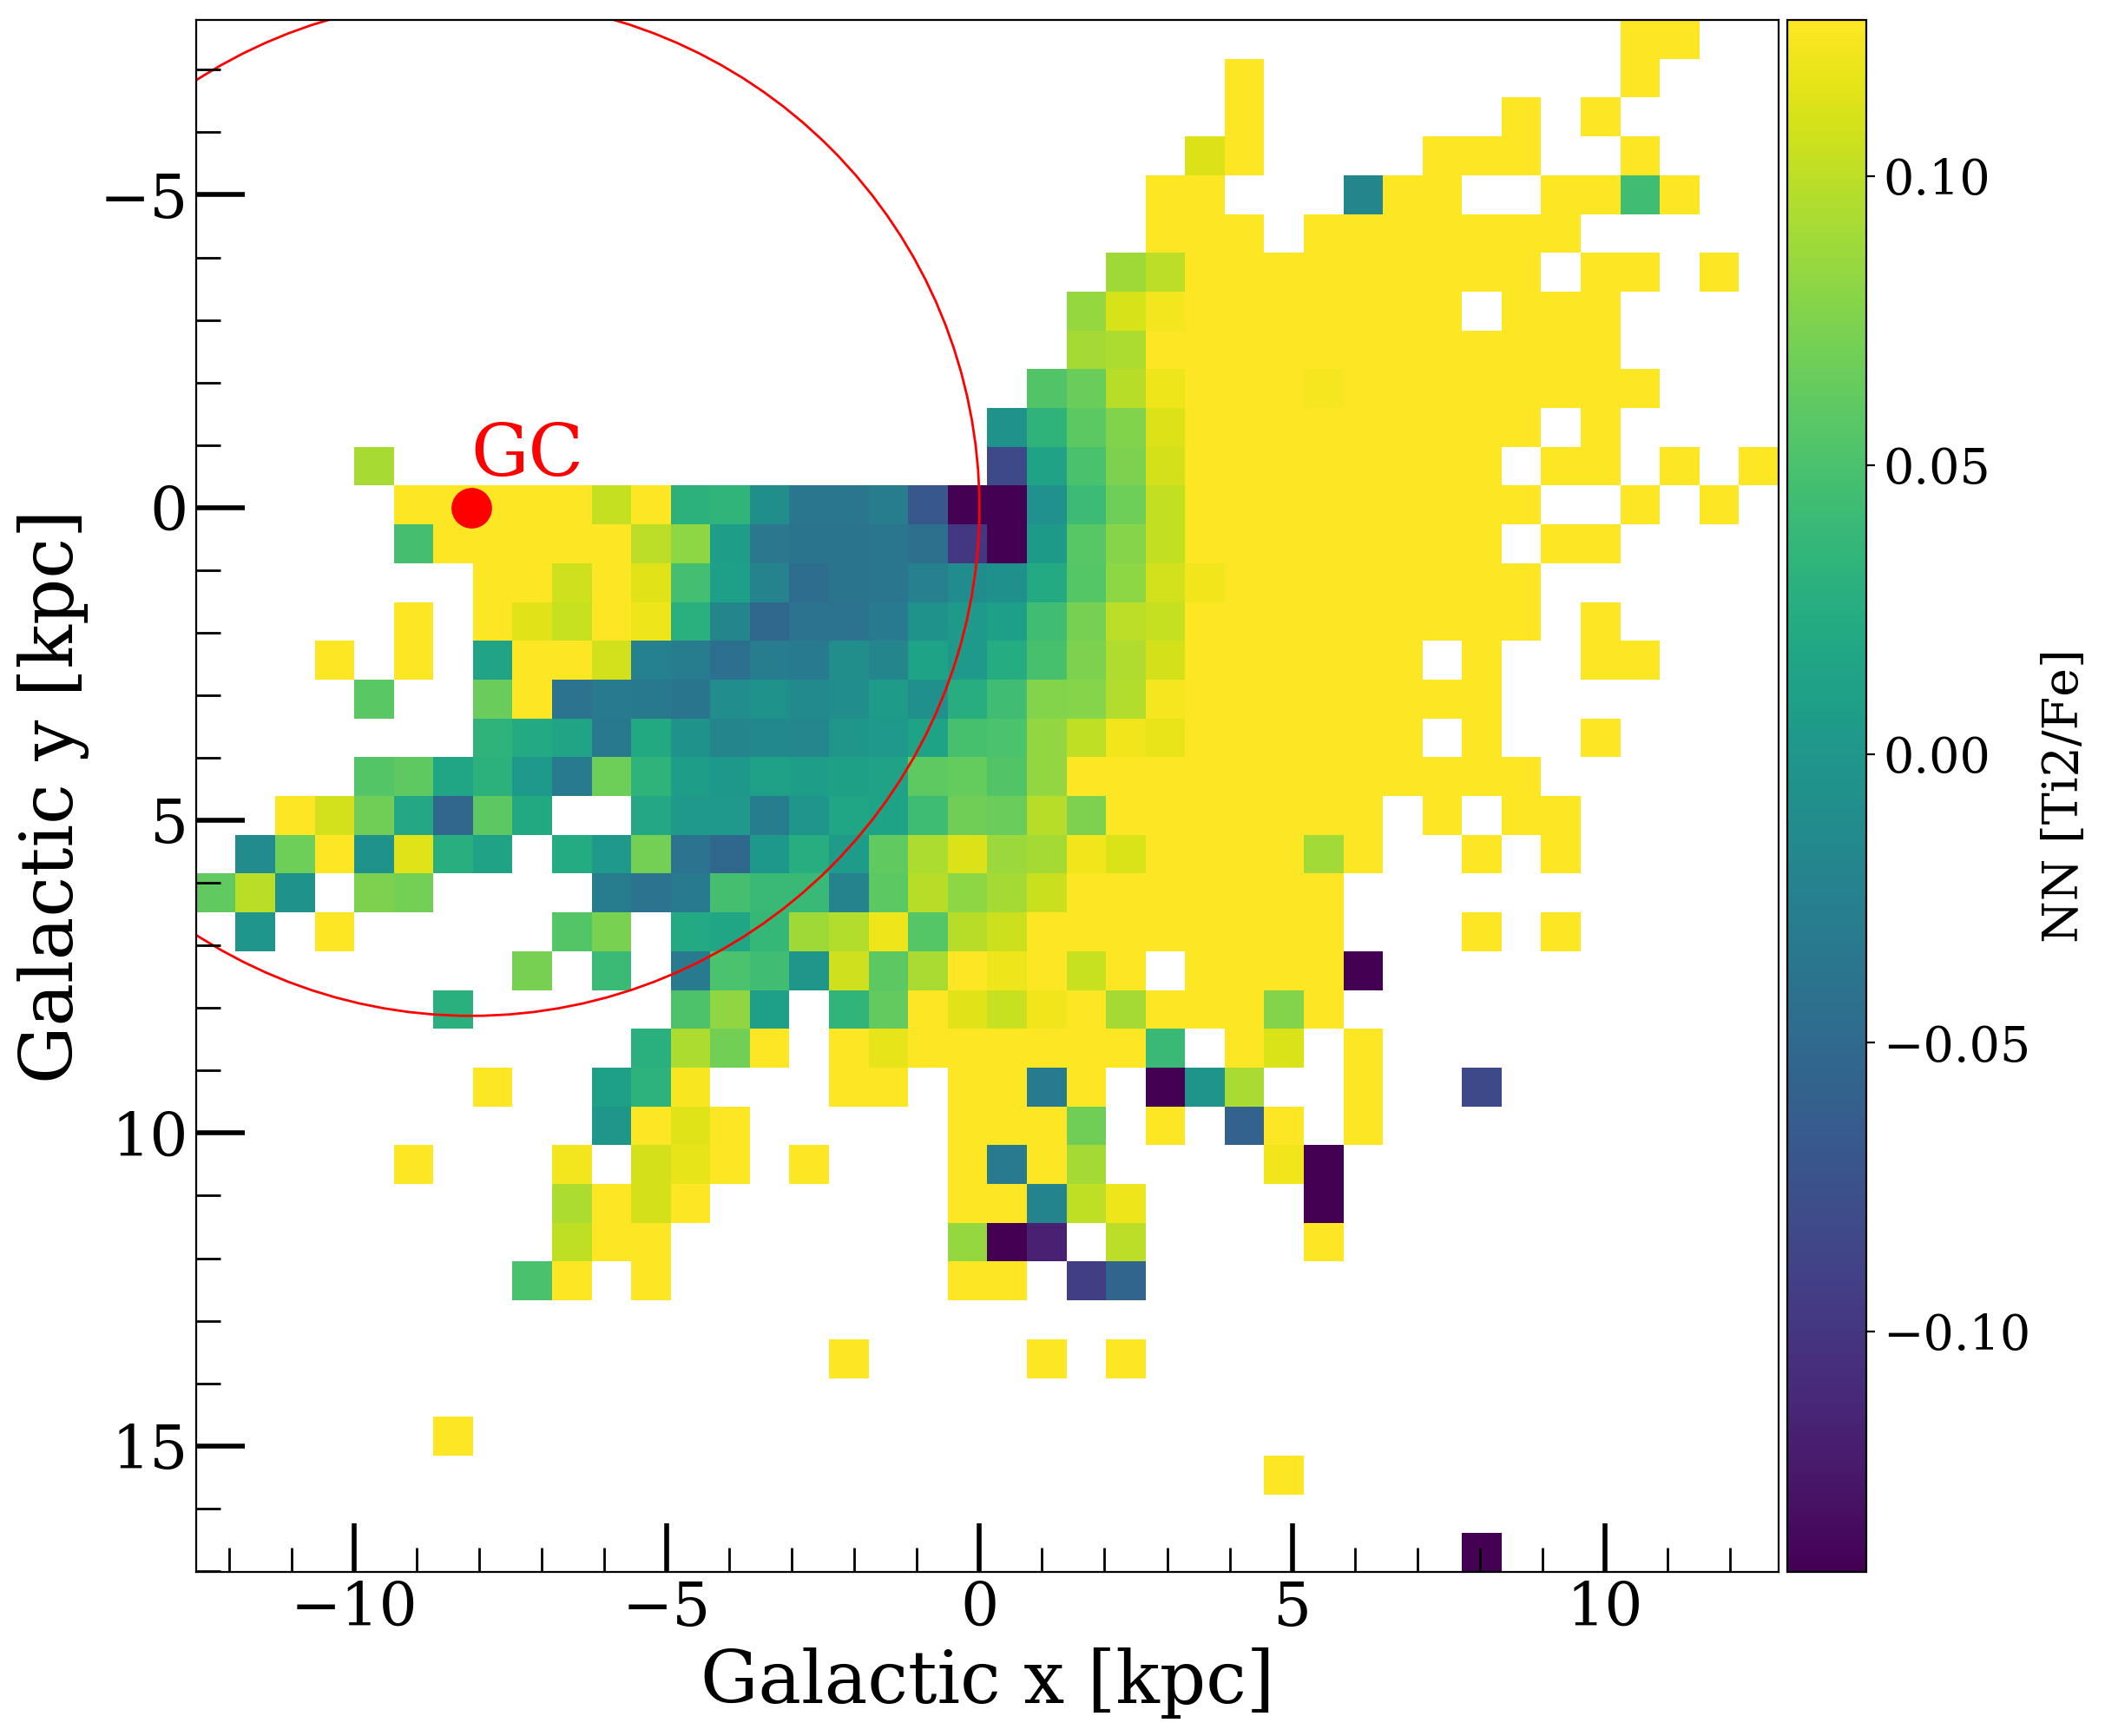

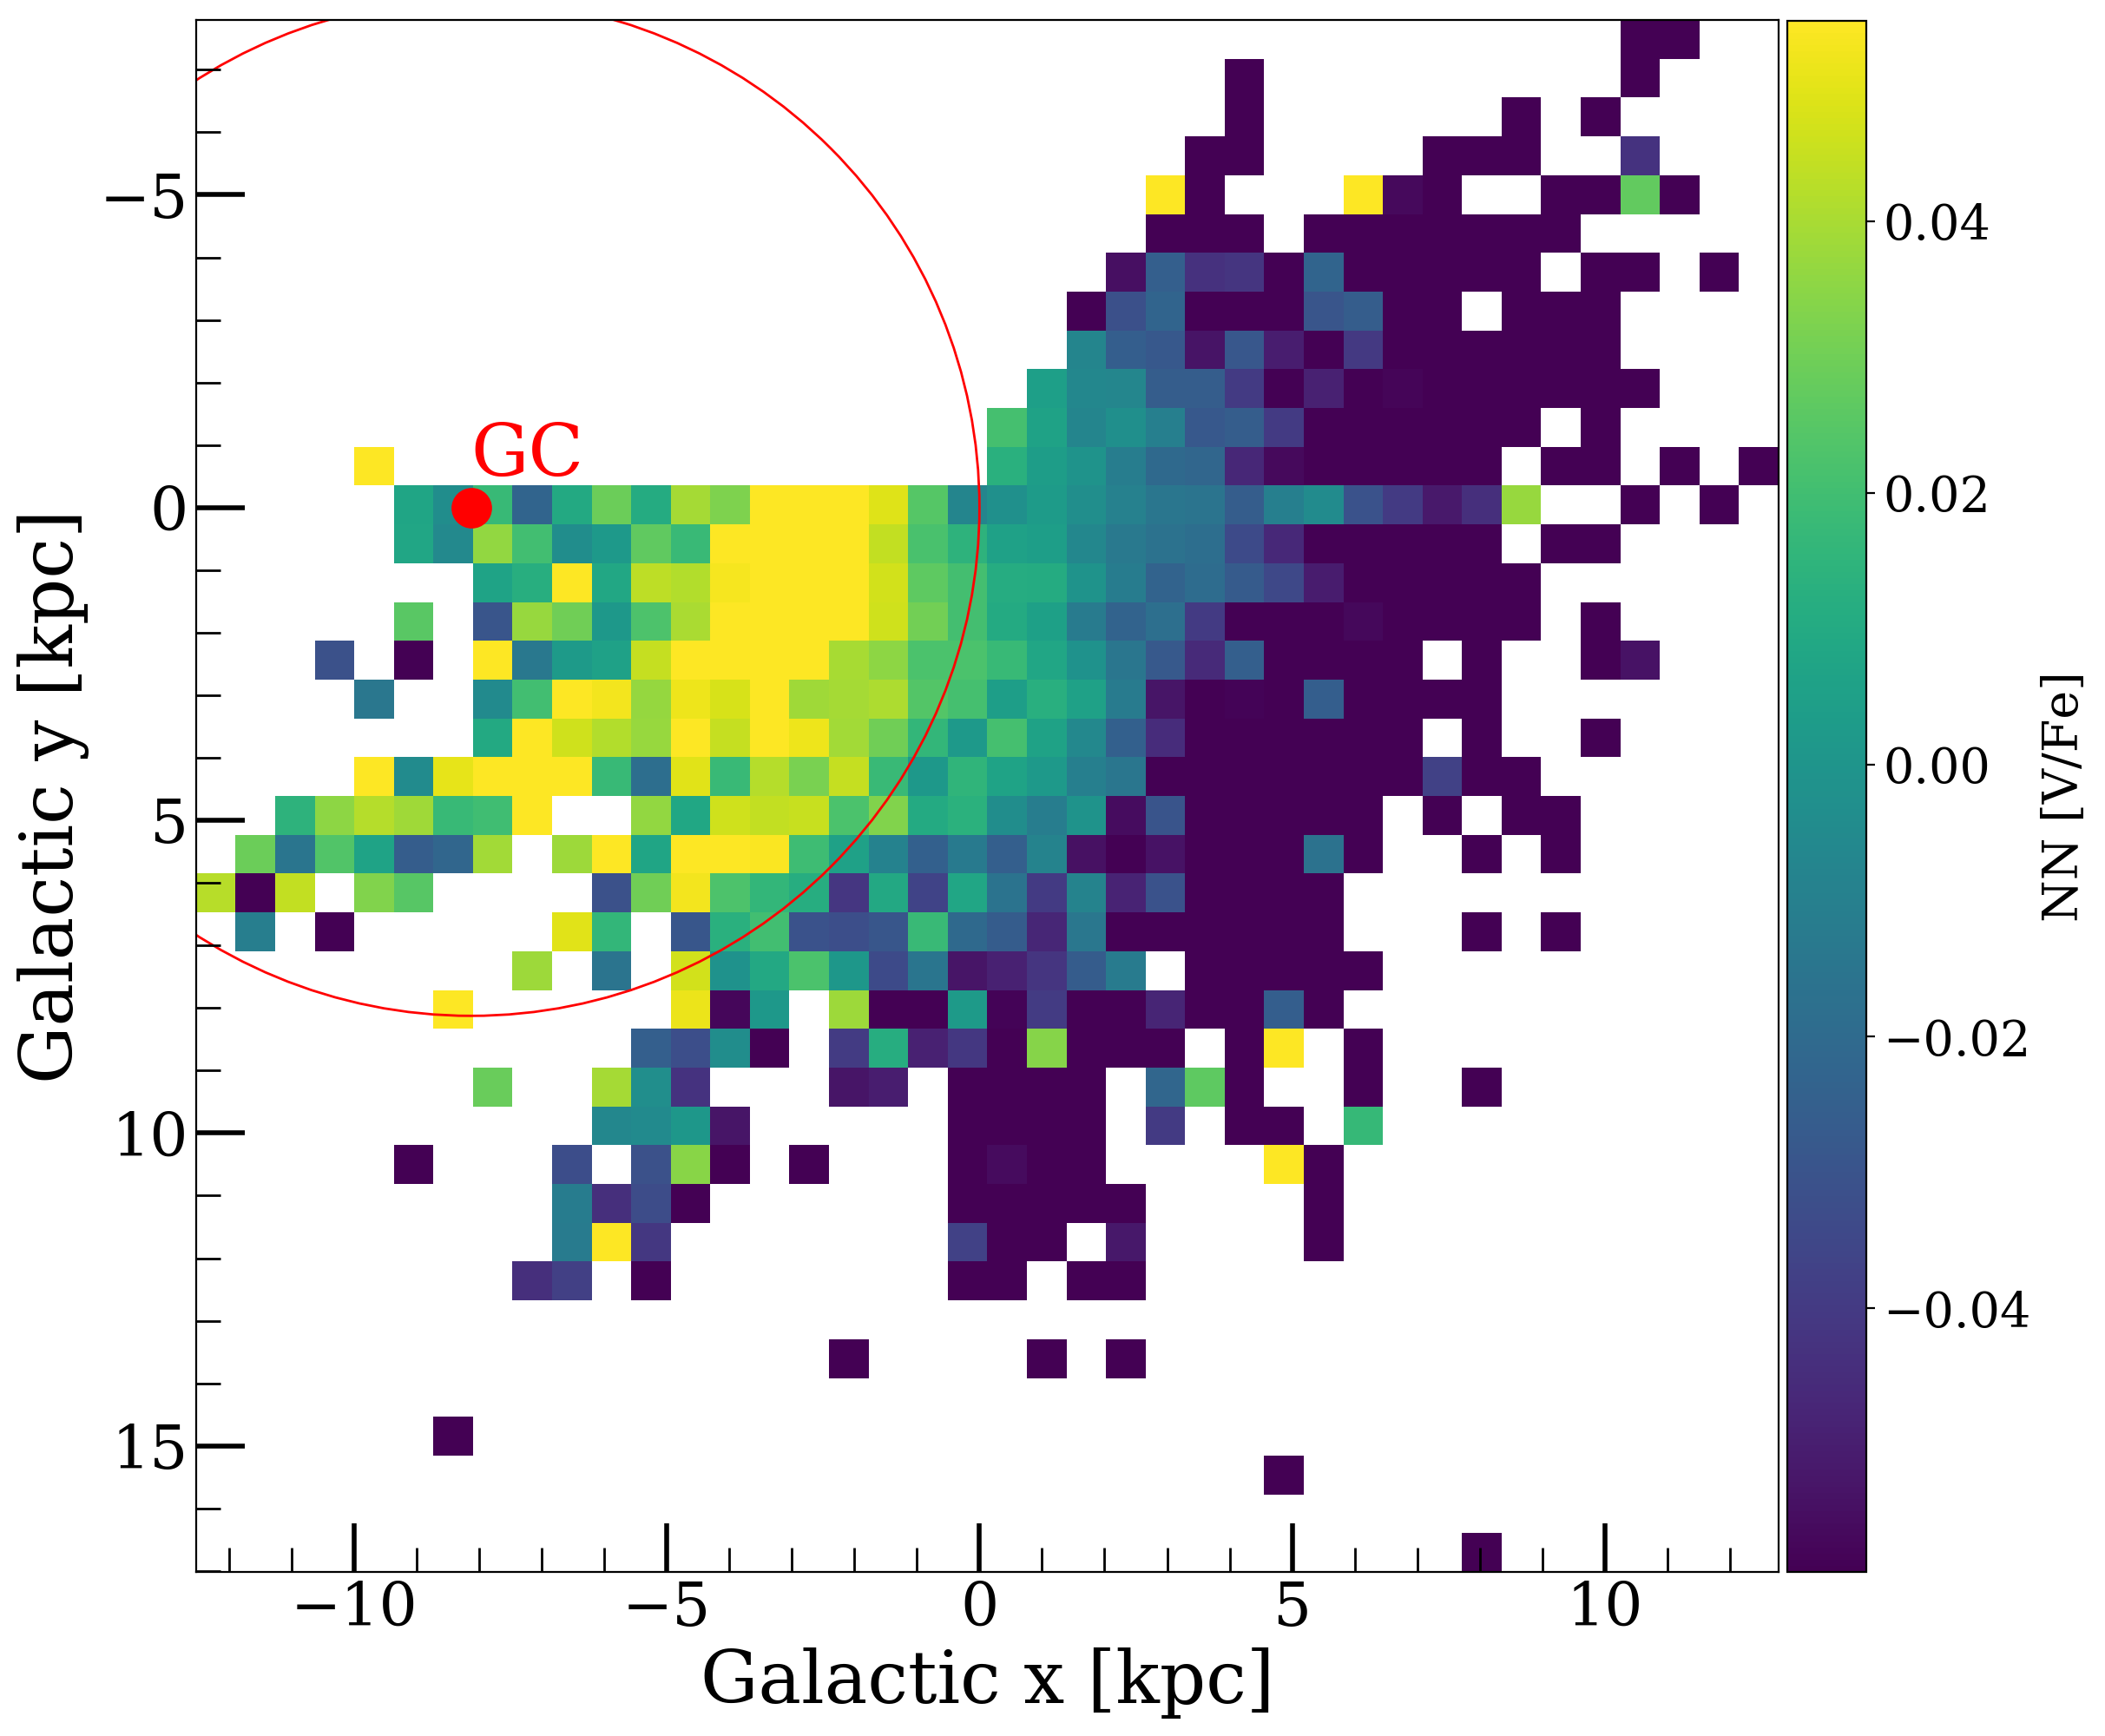

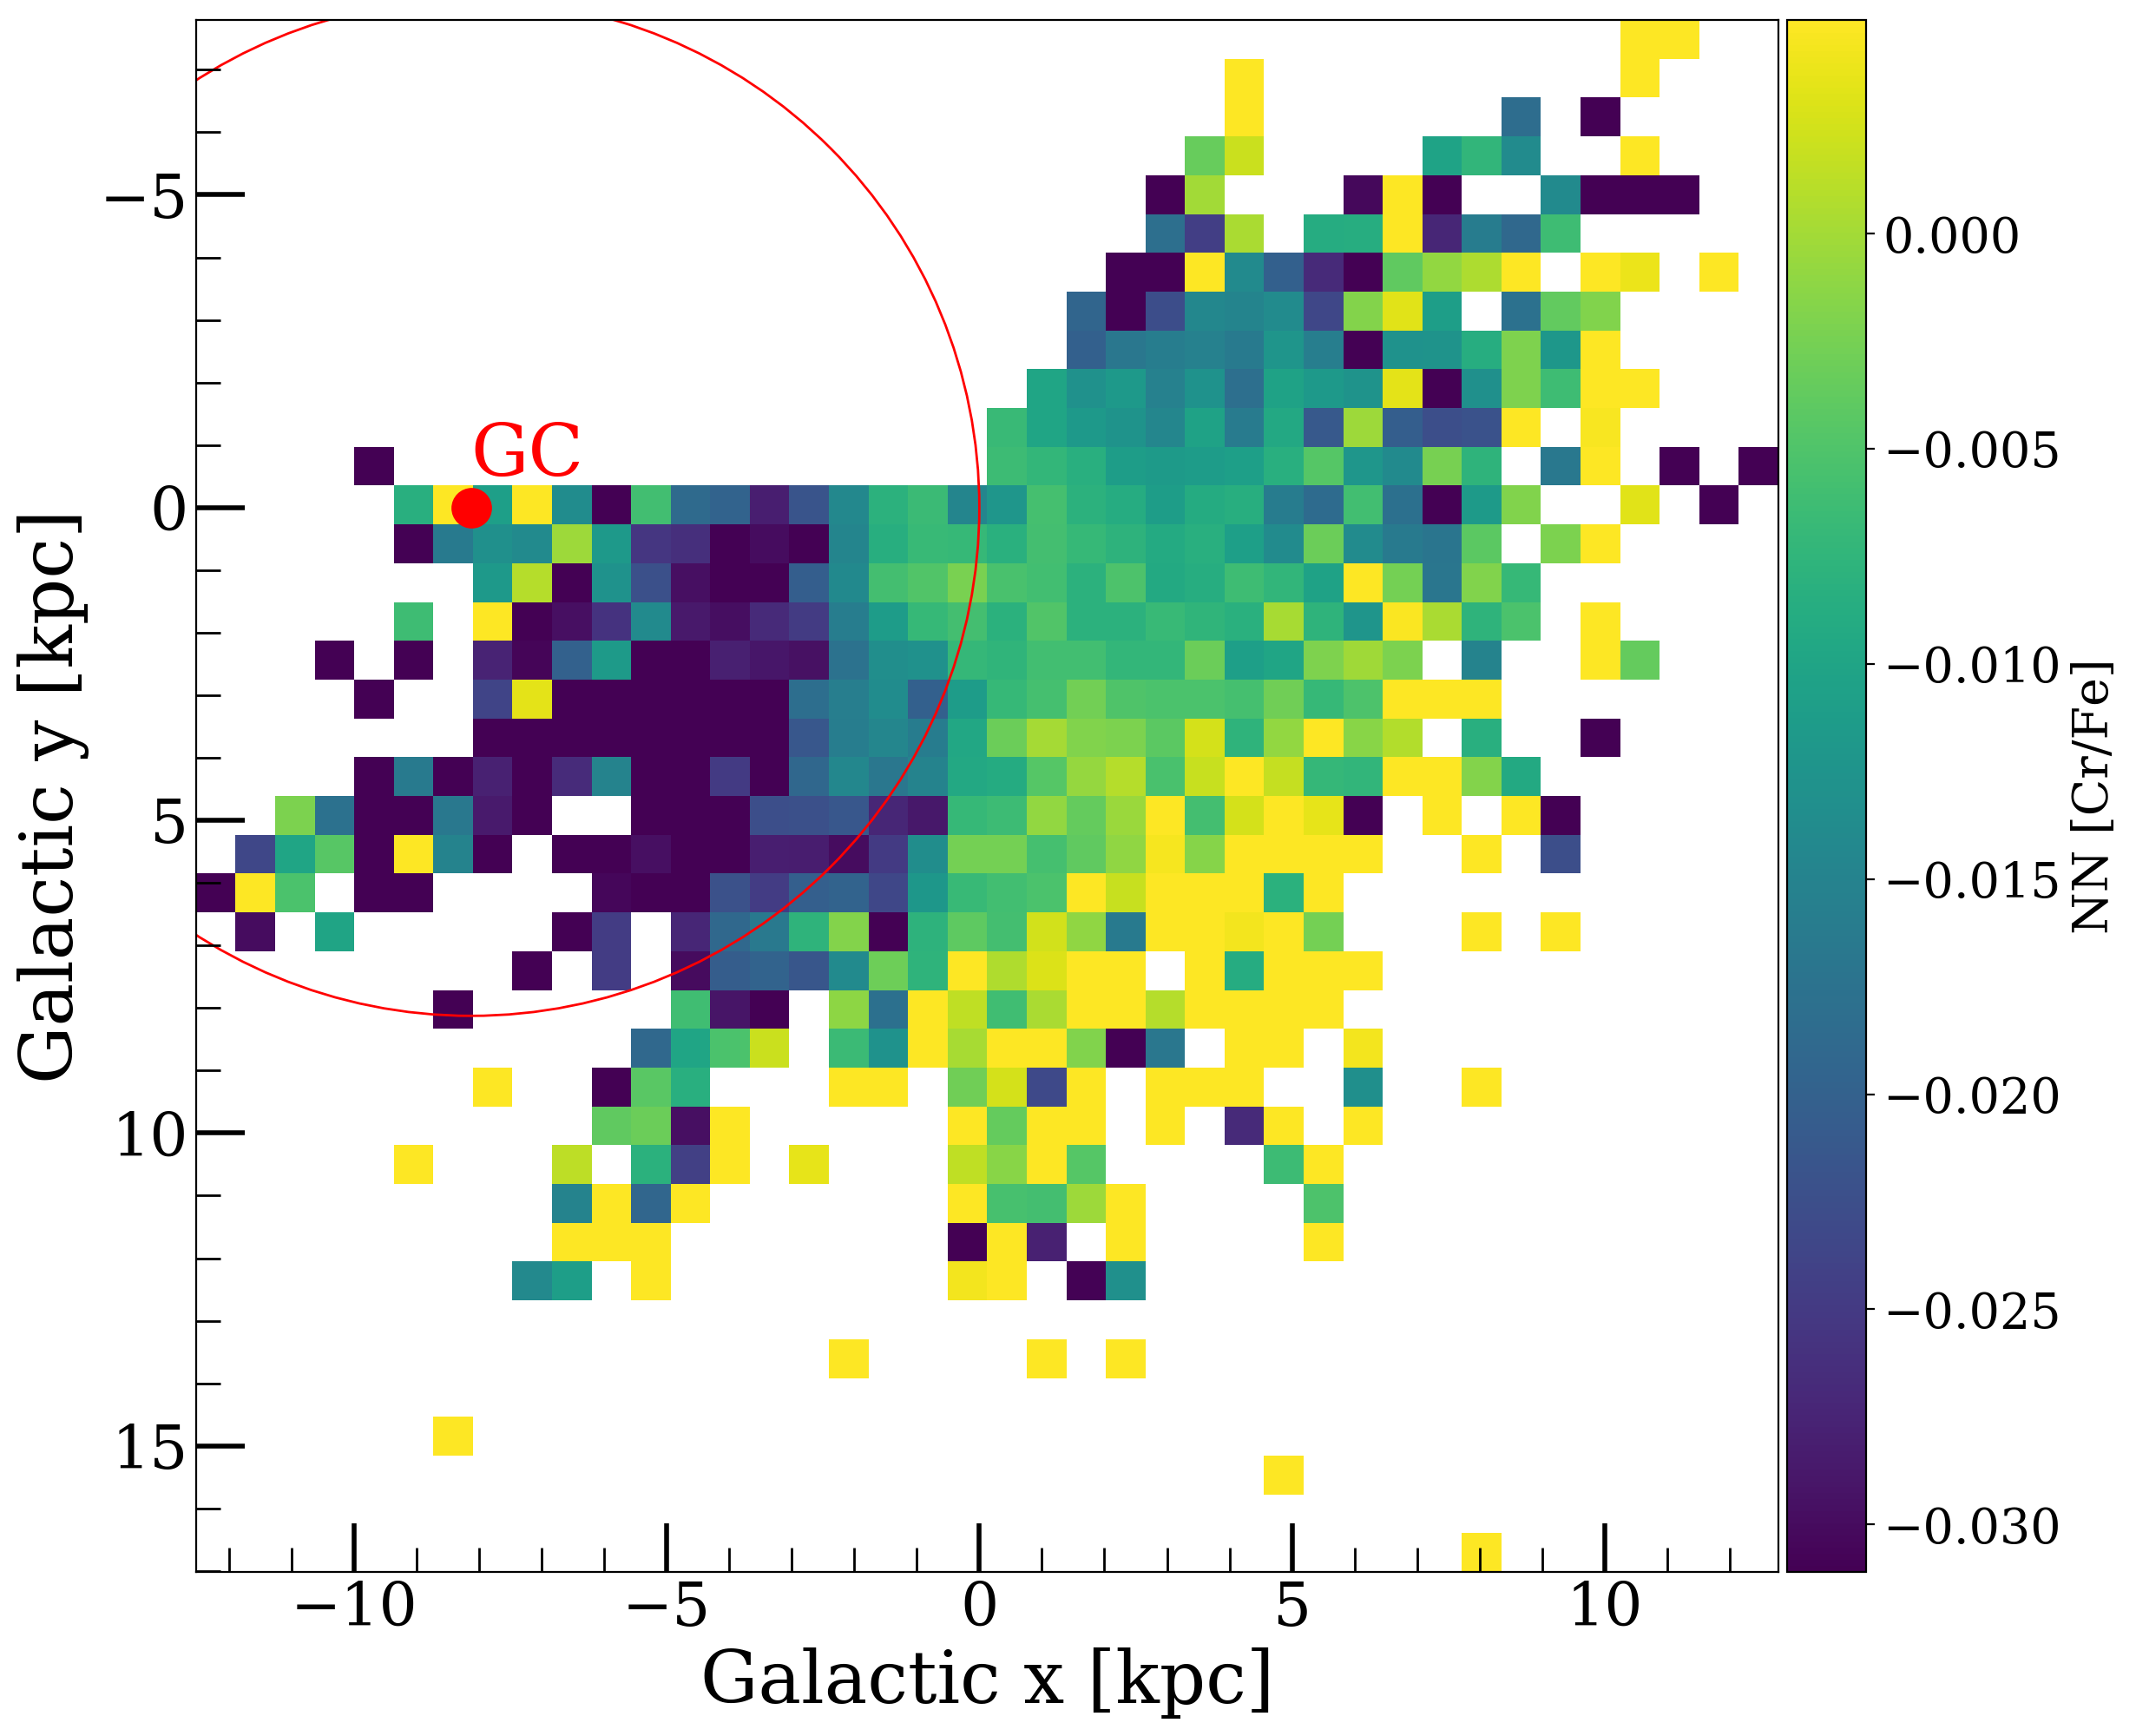

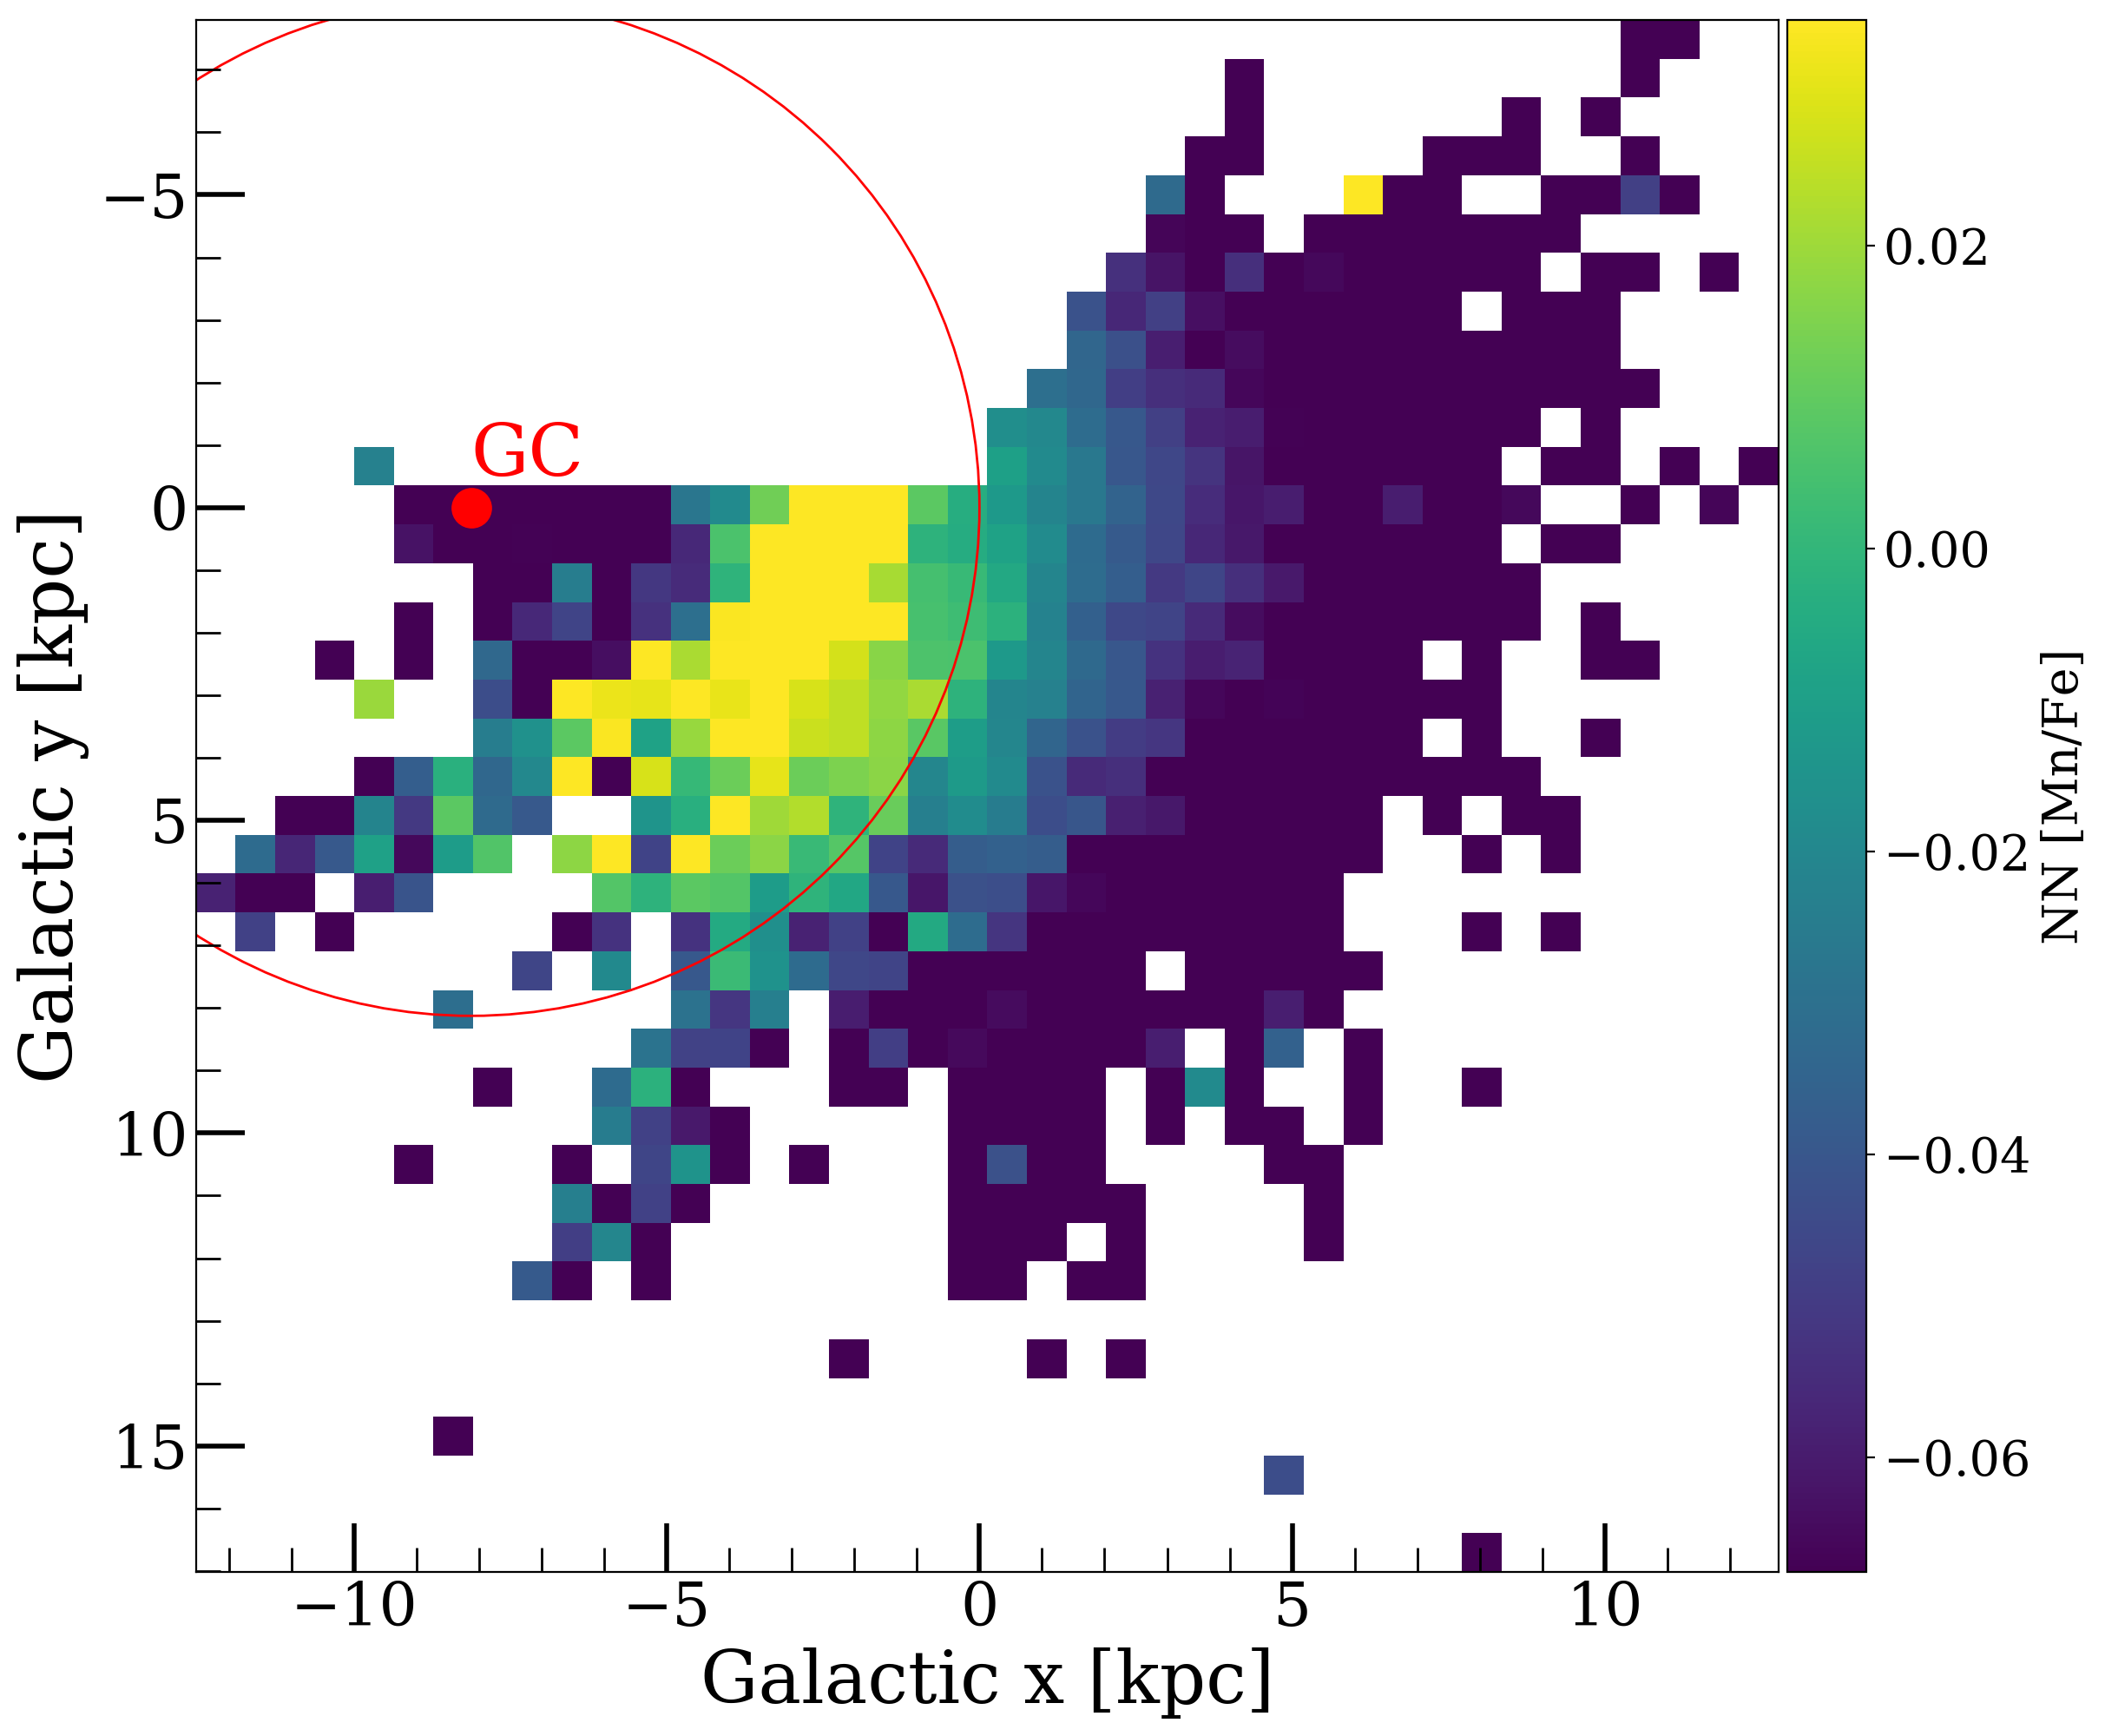

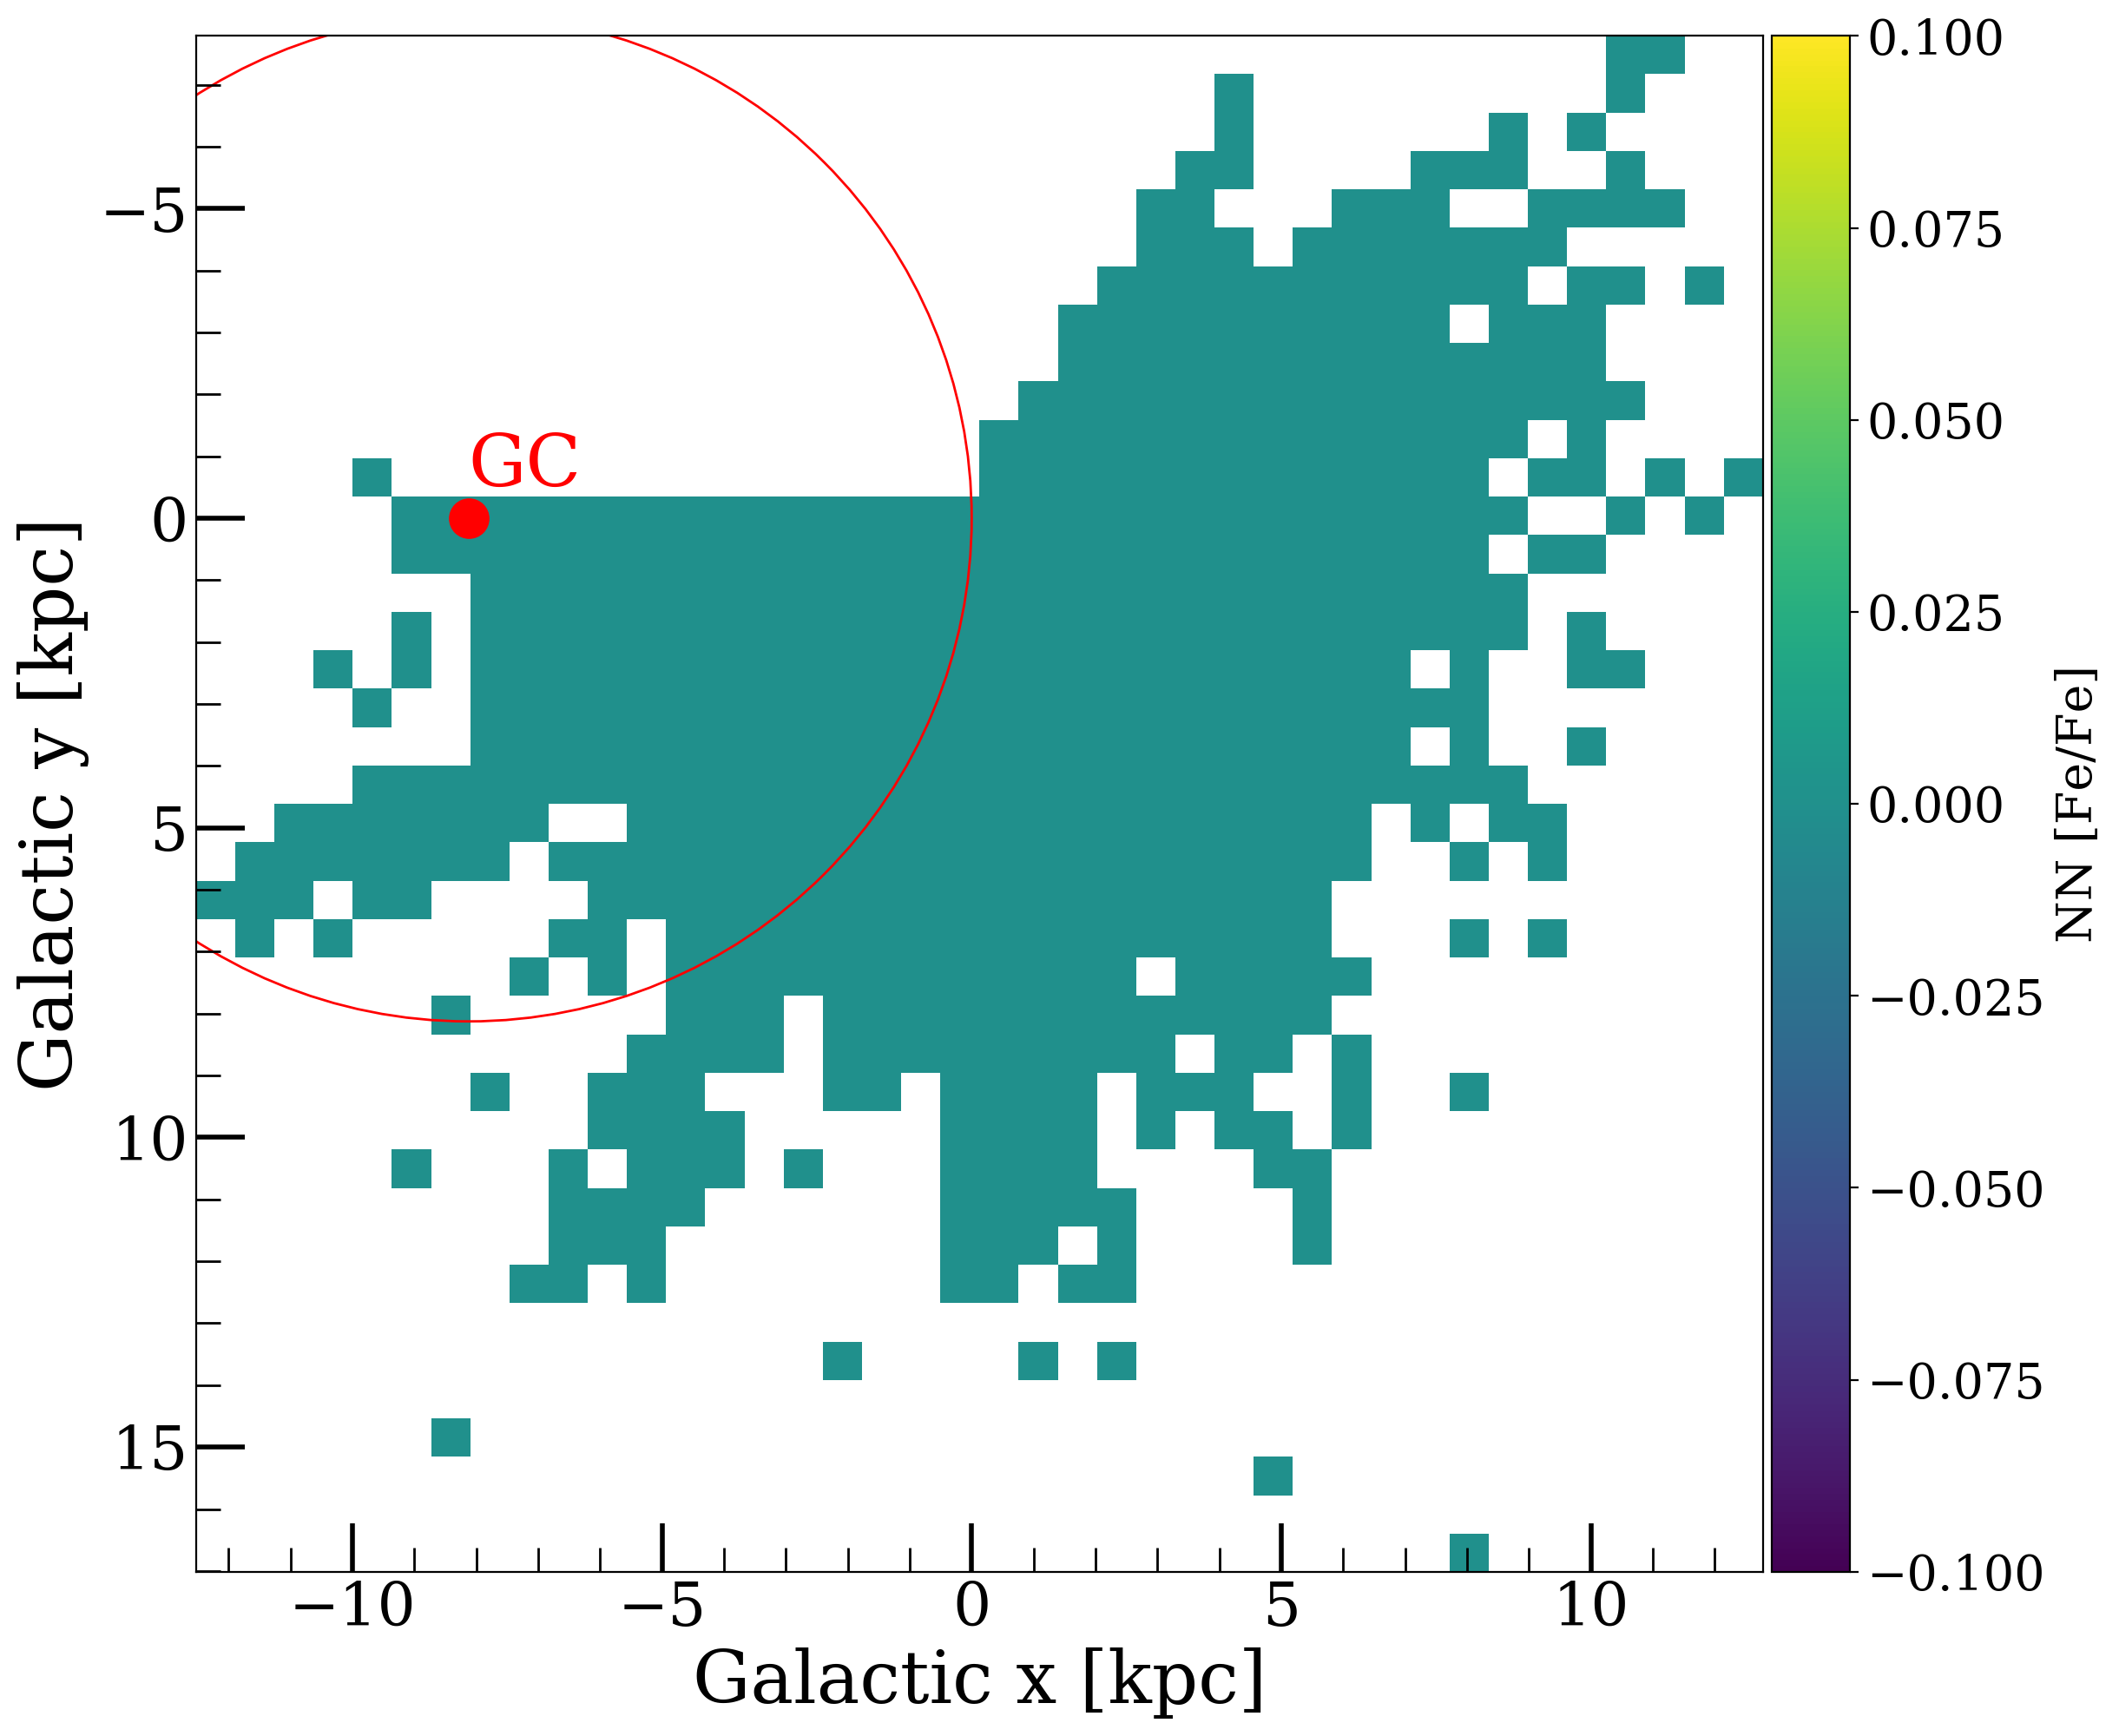

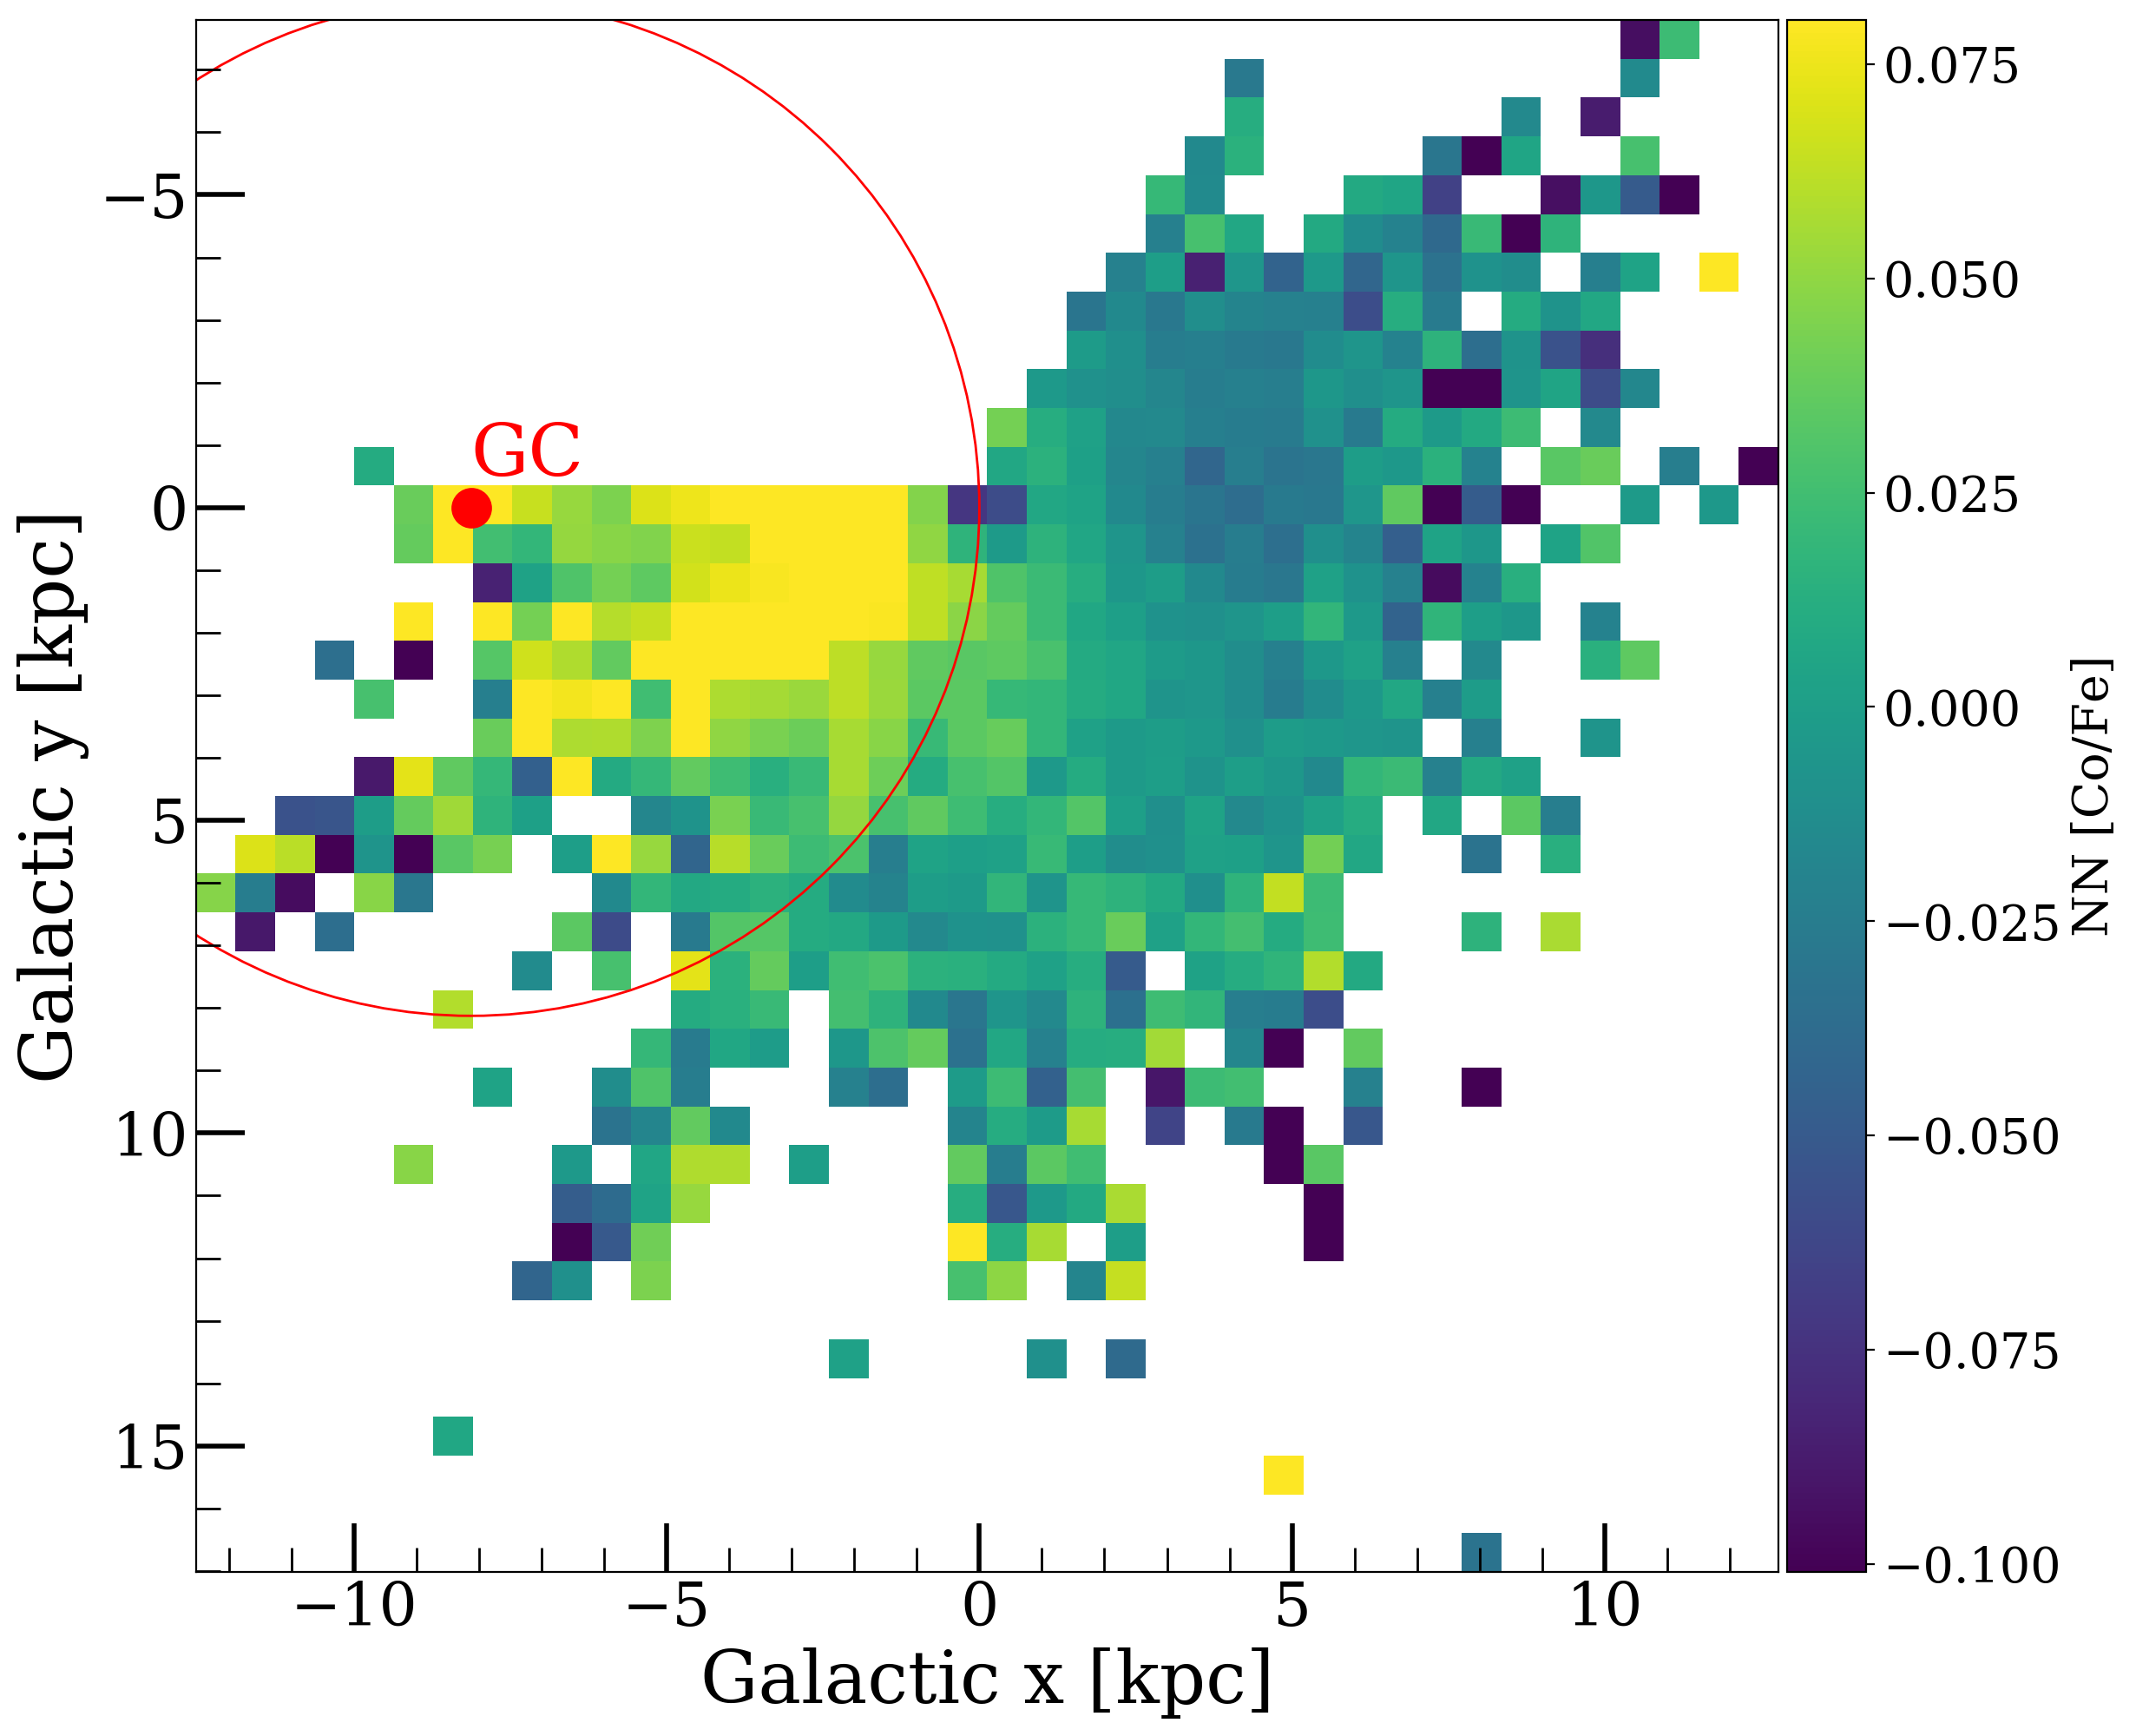

In [2]:
%matplotlib inline
from astropy.io import fits
from astropy import units as  u
import astropy.coordinates as coords
from astropy.coordinates import CartesianDifferential
import numpy as np
import pylab as plt
from scipy.stats import binned_statistic_2d

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

plt.rc('font', **{'family': 'serif', 'weight': 'medium', 'size': 20})

targetname = [
        "teff",
        "logg",
        "C",
        "C1",
        "N",
        "O",
        "Na",
        "Mg",
        "Al",
        "Si",
        "P",
        "S",
        "K",
        "Ca",
        "Ti",
        "Ti2",
        "V",
        "Cr",
        "Mn",
        "Fe",
        "Co",
        "Ni"]

f = fits.getdata("apogee_dr14_nn_dist.fits")
nn_distance = f['pc']
nn_distance_error = f['pc_model_error']
ra_j2015_5 = f['RA_J2015.5']  # RA J2015.5
dec_j2015_5 = f['DEC_J2015.5']  # DEC J2015.5

non_n9999_idx = ((nn_distance !=-9999.) & 
                 (ra_j2015_5 !=-9999.) &
                 (dec_j2015_5 !=-9999.))

c = coords.SkyCoord(ra=ra_j2015_5[non_n9999_idx]*u.degree,
                    dec=dec_j2015_5[non_n9999_idx]*u.degree,
                    distance=nn_distance[non_n9999_idx]*u.pc,
                    galcen_distance=8.125*u.kpc, # https://arxiv.org/abs/1807.09409 (GRAVITY Collaboration 2018)
                    z_sun=20.8*u.pc, # https://arxiv.org/abs/1809.03507 (Bennett & Bovy 2018)
                    galcen_v_sun=CartesianDifferential([11.1, 245.7, 7.25]*u.km/u.s))

f = fits.getdata("astroNN_apogee_dr14_catalog.fits")
fe_h = f["astroNN"][:, 19]
fe_h_err = f["astroNN_error"][:, 19]

for i in range(2, 21):
    chem_elem = f["astroNN"][:, i] - fe_h
    chem_elem_uncertainty = f["astroNN_error"][:, 7]

    good_idx = ((nn_distance[non_n9999_idx] / nn_distance_error[non_n9999_idx] > 5) & 
                (chem_elem[non_n9999_idx] != -9999.) & 
                (chem_elem_uncertainty[non_n9999_idx] < 0.05) & 
                (fe_h_err[non_n9999_idx] < 0.05) & 
                (np.abs(c.galactic.cartesian.z.value) < 300))

    c2 = c[good_idx]

    hist, xedges, yedges, binid = binned_statistic_2d(-c2.galactic.cartesian.x/1000, c2.galactic.cartesian.y/1000, 
                                                      chem_elem[non_n9999_idx][good_idx], np.median, bins=40)

    vmin, vmax = np.percentile(chem_elem[non_n9999_idx][good_idx], 20), np.percentile(chem_elem[non_n9999_idx][good_idx], 80)
    fig, ax = plt.subplots(figsize=(13, 10.4), dpi=200)
    img = ax.imshow(np.rot90(hist),
                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                    vmin=vmin, vmax=vmax)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(cax=cax, mappable=img)
    cbar.set_label(f"NN [{targetname[i]}/Fe]", fontsize=20)
    ax.set_xlabel('Galactic x [kpc]', fontsize=30)
    ax.set_ylabel('Galactic y [kpc]', fontsize=30)
    ax.scatter(-8.125, 0, s=250, c="red")
    ax.annotate("GC", (-8.125, -0.5), color='r', fontsize=30)
    circle2 = plt.Circle((-8.125, 0), 8.125, color='r', fill=False)
    # circle3 = matplotlib.patches.Ellipse((0, 0), 10, 5, 25, fc='none', ls='solid', ec='g', lw='3.')
    ax.add_artist(circle2)
    ax.invert_yaxis()
    ax.minorticks_on()
    ax.tick_params(labelsize=25, width=2, length=20, which='major')
    ax.tick_params(width=1, length=10, which='minor')
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    fig.tight_layout()